In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [3]:
# pip install neuralforecast

In [4]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [5]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [6]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [7]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [8]:
# pip install neuralforecast

In [9]:
# Tiền xử lí dữ liệu

dxg_sorted = dxg_dataset.sort_values(by='ds', ascending=True)
qcg_sorted = qcg_dataset.sort_values(by='ds', ascending=True)
vhm_sorted = vhm_dataset.sort_values(by='ds', ascending=True)

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [10]:
# Apply function to DXG
dxg_sorted["Volume"] = dxg_sorted["Volume"].apply(convert_volume_to_number)
dxg_sorted["Change %"] = dxg_sorted["Change %"].apply(convert_change_to_number)
dxg_sorted['y'] = dxg_sorted['y'].apply(convert_str_to_number)
dxg_sorted['Open'] = dxg_sorted['Open'].apply(convert_str_to_number)
dxg_sorted['High'] = dxg_sorted['High'].apply(convert_str_to_number)
dxg_sorted['Low'] = dxg_sorted['Low'].apply(convert_str_to_number)

dxg_sorted.head(10)

ds        y     Open     High      Low   Volume  Change %  \
1251 2019-03-01  17057.8  16750.2  17057.8  16750.2  1270000    0.0184   
1250 2019-03-04  17809.9  17228.8  17878.3  17092.0  5540000    0.0441   
1249 2019-03-05  17502.2  17775.7  17912.4  17365.5  3490000   -0.0173   
1248 2019-03-06  17673.2  17502.2  17741.5  17365.5  1640000    0.0098   
1247 2019-03-07  17092.0  17912.4  17912.4  17092.0  3840000   -0.0329   
1246 2019-03-08  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340   
1245 2019-03-11  16921.1  16545.1  16989.5  16510.9  1580000    0.0248   
1244 2019-03-12  16886.9  17194.6  17262.9  16750.2  1670000   -0.0020   
1243 2019-03-13  16750.2  16955.3  17057.8  16750.2  1510000   -0.0081   
1242 2019-03-14  16818.6  16750.2  16886.9  16647.6  1350000    0.0041   

     unique_id  
1251       DXG  
1250       DXG  
1249       DXG  
1248       DXG  
1247       DXG  
1246       DXG  
1245       DXG  
1244       DXG  
1243       DXG  
1242       DXG

In [11]:
# Apply function to QCG
qcg_sorted["Volume"] = qcg_sorted["Volume"].apply(convert_volume_to_number)
qcg_sorted["Change %"] = qcg_sorted["Change %"].apply(convert_change_to_number)
qcg_sorted['y'] = qcg_sorted['y'].apply(convert_str_to_number)
qcg_sorted['Open'] = qcg_sorted['Open'].apply(convert_str_to_number)
qcg_sorted['High'] = qcg_sorted['High'].apply(convert_str_to_number)
qcg_sorted['Low'] = qcg_sorted['Low'].apply(convert_str_to_number)

qcg_sorted.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
1251 2019-03-01  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
1250 2019-03-04  4790.0  4700.0  4790.0  4600.0  1200000   -0.0021       QCG
1249 2019-03-05  4700.0  4700.0  4750.0  4620.0  1040000   -0.0188       QCG
1248 2019-03-06  5020.0  4700.0  5020.0  4640.0  2430000    0.0681       QCG
1247 2019-03-07  5370.0  5250.0  5370.0  5200.0   736850    0.0697       QCG
1246 2019-03-08  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
1245 2019-03-11  5990.0  5600.0  6040.0  5400.0  3180000    0.0602       QCG
1244 2019-03-12  6090.0  6000.0  6100.0  5800.0  1200000    0.0167       QCG
1243 2019-03-13  6090.0  6090.0  6090.0  5800.0  1370000    0.0000       QCG
1242 2019-03-14  6070.0  6000.0  6150.0  5930.0  1470000   -0.0033       QCG

In [12]:
# Apply function to VHM
vhm_sorted["Volume"] = vhm_sorted["Volume"].apply(convert_volume_to_number)
vhm_sorted["Change %"] = vhm_sorted["Change %"].apply(convert_change_to_number)
vhm_sorted['y'] = vhm_sorted['y'].apply(convert_str_to_number)
vhm_sorted['Open'] = vhm_sorted['Open'].apply(convert_str_to_number)
vhm_sorted['High'] = vhm_sorted['High'].apply(convert_str_to_number)
vhm_sorted['Low'] = vhm_sorted['Low'].apply(convert_str_to_number)

vhm_sorted.head(10)

ds        y     Open     High      Low   Volume  Change %  \
1251 2019-03-01  68421.0  66541.0  68722.0  65789.0  1050000    0.0400   
1250 2019-03-04  70075.0  69173.0  70300.0  67368.0  1180000    0.0242   
1249 2019-03-05  68421.0  69323.0  69849.0  68045.0  1500000   -0.0236   
1248 2019-03-06  69022.0  68421.0  69097.0  68270.0   770130    0.0088   
1247 2019-03-07  69173.0  69173.0  71654.0  69097.0  1700000    0.0022   
1246 2019-03-08  68797.0  69173.0  69849.0  68722.0   909800   -0.0054   
1245 2019-03-11  67669.0  68421.0  69398.0  67669.0   693860   -0.0164   
1244 2019-03-12  69398.0  68571.0  69624.0  68346.0  1120000    0.0256   
1243 2019-03-13  70676.0  69624.0  72180.0  69549.0  2150000    0.0184   
1242 2019-03-14  70676.0  70902.0  71128.0  69774.0   920650    0.0000   

     unique_id  
1251       VHM  
1250       VHM  
1249       VHM  
1248       VHM  
1247       VHM  
1246       VHM  
1245       VHM  
1244       VHM  
1243       VHM  
1242       VHM

In [13]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_sorted)
dxg_train_size = int(dxg_total_size * 0.8)
dxg_test_size = int(dxg_total_size * 0.2)


vhm_total_size = len(vhm_sorted)
vhm_train_size = int(vhm_total_size * 0.8)
vhm_test_size = int(vhm_total_size * 0.2)


qcg_total_size = len(qcg_sorted)
qcg_train_size = int(qcg_total_size * 0.8)
qcg_test_size = int(qcg_total_size * 0.2)


# Split the dataset
dxg_train_data = dxg_sorted.iloc[:dxg_train_size]
dxg_test_data = dxg_sorted.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_sorted.iloc[:vhm_train_size]
vhm_test_data = vhm_sorted.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_sorted.iloc[:qcg_train_size]
qcg_test_data = qcg_sorted.iloc[qcg_train_size:qcg_train_size+qcg_test_size]


# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)


vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)


qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)



# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [14]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [15]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [16]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [17]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [18]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [19]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [20]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [21]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [22]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [23]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [24]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [25]:
# len(dxg_pred_test)
# len(dxg_test_data)
# dxg_pred_test

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [27]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_absolute_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 3425.802150278924
MAPE trên tập test của DXG là: 18.39017197756368 %
MAE trên tập test của DXG là: 2649.9933984375


In [28]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_absolute_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 8940.90168469681
MAPE trên tập test của VHM là: 13.040906119566904 %
MAE trên tập test của VHM là: 6908.306234375


In [29]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_absolute_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 2926.7517240668194
MAPE trên tập test của QCG là: 37.62717600634644 %
MAE trên tập test của QCG là: 2421.64733984375


In [30]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day input [15700. 16750. 16900. 17700. 17150. 16300. 17400. 16650. 16650. 16850.
 18000. 18050. 18250. 17800. 19000. 19450. 19800. 20150. 19950. 20100.
 20550. 19800. 20150. 20250. 21200. 19750. 20000. 19400. 19750. 19900.
 20000. 19850. 20650. 21100. 21300. 20500. 20000. 19350. 19450. 19100.
 18250. 18650. 18650. 18950. 19150. 19200. 18750. 18950. 19100. 18900.
 19050. 19350. 19050. 19150. 19200. 19400. 19750. 19700. 19500. 19250.
 18800. 18600. 19000. 18950. 19200. 18950. 19200. 19000. 18900. 18800.
 18950. 18750. 18750. 18500. 18600. 18550. 18450. 18450. 18400. 18700.
 18950. 18800. 18950. 18750. 18500. 18150. 17850. 18200. 18050. 18250.]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18733.443359     18757.902344    18066.197266   
DXG       2024-05-31  18779.947266     18762.333984    18007.259766   
DXG       2024-06-01  18600.595703     18603.148438    17715.214844   
DXG       2024-06-02  18782.710938     18775.078125    18102.740234   
DXG       2024-06-03  18696.416016     18677.210938    17915.701172   
...              ...           ...              ...             ...   
DXG       2025-01-30  18718.128906     18706.068359    18060.353516   
DXG       2025-01-31  18743.792969     18735.507812    18074.294922   
DXG       2025-02-01  18459.935547     18451.523438    18052.714844   
DXG       2025-02-02  18243.884766     18239.933594    17662.156250   
DXG       2025-02-03  18324.025391     18313.500000    17409.654297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18751.734375     18773.609375    18155.062500   
DXG       2024-05-31  18698.591797     18680.460938    17903.265625   
DXG       2024-06-01  18696.353516     18698.474609    17960.453125   
DXG       2024-06-02  18705.863281     18698.205078    18023.371094   
DXG       2024-06-03  18749.320312     18733.429688    18103.388672   
...              ...           ...              ...             ...   
DXG       2025-01-30  18664.613281     18653.757812    18072.304688   
DXG       2025-01-31  18724.396484     18716.394531    18077.722656   
DXG       2025-02-01  18257.476562     18247.244141    17762.000000   
DXG       2025-02-02  18272.330078     18268.054688    17642.779297   
DXG       2025-02-03  18632.613281     18623.929688    17878.113281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18693.771484     18714.882812    18117.949219   
DXG       2024-05-31  18651.833984     18632.695312    17812.193359   
DXG       2024-06-01  18697.408203     18699.359375    18020.083984   
DXG       2024-06-02  18606.162109     18597.486328    17832.904297   
DXG       2024-06-03  18721.539062     18706.449219    18108.160156   
...              ...           ...              ...             ...   
DXG       2025-01-30  18577.587891     18568.894531    18103.318359   
DXG       2025-01-31  18752.759766     18745.628906    18176.259766   
DXG       2025-02-01  18309.380859     18299.222656    17817.570312   
DXG       2025-02-02  18427.328125     18421.683594    17595.933594   
DXG       2025-02-03  18719.601562     18712.373047    18091.673828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18704.671875     18723.464844    18192.083984   
DXG       2024-05-31  18713.207031     18696.722656    17990.019531   
DXG       2024-06-01  18717.660156     18719.482422    18085.216797   
DXG       2024-06-02  18636.832031     18628.812500    17921.984375   
DXG       2024-06-03  18665.119141     18650.101562    18054.583984   
...              ...           ...              ...             ...   
DXG       2025-01-30  18346.496094     18332.929688    17606.503906   
DXG       2025-01-31  18694.230469     18687.087891    18116.992188   
DXG       2025-02-01  18392.880859     18380.441406    17790.658203   
DXG       2025-02-02  18618.792969     18613.863281    17893.076172   
DXG       2025-02-03  18739.652344     18733.152344    18174.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18724.494141     18742.210938    18241.273438   
DXG       2024-05-31  18643.908203     18626.027344    17859.535156   
DXG       2024-06-01  18745.785156     18747.345703    18204.060547   
DXG       2024-06-02  18642.117188     18634.882812    17997.308594   
DXG       2024-06-03  18603.652344     18586.953125    17924.873047   
...              ...           ...              ...             ...   
DXG       2025-01-30  18533.427734     18523.031250    17966.289062   
DXG       2025-01-31  18792.056641     18786.953125    18379.585938   
DXG       2025-02-01  18695.048828     18682.171875    18071.488281   
DXG       2025-02-02  18752.396484     18748.460938    18172.718750   
DXG       2025-02-03  18696.474609     18689.851562    18121.109375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18694.128906     18706.238281    18363.763672   
DXG       2024-05-31  18708.880859     18693.691406    18042.644531   
DXG       2024-06-01  18636.667969     18638.125000    18131.593750   
DXG       2024-06-02  18493.935547     18485.191406    17714.789062   
DXG       2024-06-03  18701.966797     18694.320312    18391.197266   
...              ...           ...              ...             ...   
DXG       2025-01-30  18620.978516     18611.730469    18116.458984   
DXG       2025-01-31  18653.087891     18649.644531    18374.767578   
DXG       2025-02-01  18816.664062     18806.757812    18336.957031   
DXG       2025-02-02  18734.503906     18731.185547    18246.162109   
DXG       2025-02-03  18744.599609     18739.488281    18300.720703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18526.152344     18536.011719    18257.195312   
DXG       2024-05-31  18778.642578     18766.664062    18253.287109   
DXG       2024-06-01  18399.716797     18400.707031    18055.220703   
DXG       2024-06-02  18590.835938     18583.736328    17958.132812   
DXG       2024-06-03  18391.837891     18382.722656    18021.294922   
...              ...           ...              ...             ...   
DXG       2025-01-30  18543.031250     18533.775391    18038.089844   
DXG       2025-01-31  18290.597656     18286.207031    17935.705078   
DXG       2025-02-01  18624.912109     18611.275391    17964.550781   
DXG       2025-02-02  18556.144531     18551.107422    17814.462891   
DXG       2025-02-03  18615.925781     18610.523438    18146.662109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18286.941406     18305.601562    17777.998047   
DXG       2024-05-31  18539.302734     18520.494141    17714.224609   
DXG       2024-06-01  18262.984375     18264.144531    17859.910156   
DXG       2024-06-02  18528.058594     18519.058594    17726.085938   
DXG       2024-06-03  18256.277344     18245.867188    17833.035156   
...              ...           ...              ...             ...   
DXG       2025-01-30  18445.310547     18433.632812    17808.373047   
DXG       2025-01-31  18376.056641     18372.355469    18076.789062   
DXG       2025-02-01  18775.779297     18766.234375    18313.593750   
DXG       2025-02-02  18737.519531     18733.388672    18129.158203   
DXG       2025-02-03  18376.123047     18370.630859    17898.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18501.742188     18515.843750    18117.142578   
DXG       2024-05-31  18639.937500     18628.156250    18123.207031   
DXG       2024-06-01  18255.115234     18256.343750    17828.830078   
DXG       2024-06-02  18495.974609     18486.408203    17643.531250   
DXG       2024-06-03  18223.123047     18208.031250    17609.601562   
...              ...           ...              ...             ...   
DXG       2025-01-30  18539.240234     18528.718750    17965.244141   
DXG       2025-01-31  18271.078125     18266.511719    17902.068359   
DXG       2025-02-01  18681.462891     18669.558594    18105.148438   
DXG       2025-02-02  18750.435547     18747.214844    18276.097656   
DXG       2025-02-03  18288.093750     18284.367188    17964.318359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18604.435547     18622.568359    18109.876953   
DXG       2024-05-31  18318.750000     18295.060547    17279.472656   
DXG       2024-06-01  18183.328125     18184.675781    17715.453125   
DXG       2024-06-02  18648.828125     18641.208984    17969.763672   
DXG       2024-06-03  18444.175781     18431.789062    17940.689453   
...              ...           ...              ...             ...   
DXG       2025-01-30  18527.613281     18516.191406    17904.564453   
DXG       2025-01-31  18215.712891     18209.750000    17733.806641   
DXG       2025-02-01  18727.632812     18715.652344    18147.525391   
DXG       2025-02-02  18315.748047     18309.921875    17457.740234   
DXG       2025-02-03  18303.615234     18299.630859    17957.423828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18510.970703     18537.312500    17792.414062   
DXG       2024-05-31  18319.486328     18295.210938    17254.517578   
DXG       2024-06-01  18148.656250     18150.710938    17435.343750   
DXG       2024-06-02  18580.449219     18571.617188    17793.238281   
DXG       2024-06-03  18621.716797     18608.890625    18100.339844   
...              ...           ...              ...             ...   
DXG       2025-01-30  18464.955078     18454.375000    17887.658203   
DXG       2025-01-31  18354.082031     18348.431641    17897.361328   
DXG       2025-02-01  18816.542969     18807.589844    18383.068359   
DXG       2025-02-02  18451.416016     18446.292969    17696.722656   
DXG       2025-02-03  18261.656250     18257.230469    17877.144531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18682.664062     18700.035156    18208.839844   
DXG       2024-05-31  18543.835938     18527.718750    17836.832031   
DXG       2024-06-01  18497.513672     18499.486328    17812.800781   
DXG       2024-06-02  18590.591797     18582.253906    17847.322266   
DXG       2024-06-03  18493.548828     18475.931641    17777.433594   
...              ...           ...              ...             ...   
DXG       2025-01-30  18396.066406     18386.378906    17867.705078   
DXG       2025-01-31  18578.095703     18572.476562    18123.960938   
DXG       2025-02-01  18562.349609     18548.562500    17894.822266   
DXG       2025-02-02  18702.005859     18697.498047    18038.240234   
DXG       2025-02-03  18208.144531     18203.064453    17766.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18575.248047     18597.183594    17976.939453   
DXG       2024-05-31  18331.027344     18308.390625    17338.070312   
DXG       2024-06-01  18630.304688     18632.199219    17972.689453   
DXG       2024-06-02  18677.470703     18670.519531    18058.109375   
DXG       2024-06-03  18639.488281     18624.773438    18041.314453   
...              ...           ...              ...             ...   
DXG       2025-01-30  18286.027344     18276.300781    17755.457031   
DXG       2025-01-31  18573.289062     18565.146484    17914.953125   
DXG       2025-02-01  18593.753906     18587.421875    18287.164062   
DXG       2025-02-02  18838.738281     18835.845703    18413.078125   
DXG       2025-02-03  18337.671875     18333.394531    17965.933594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18711.593750     18727.085938    18289.058594   
DXG       2024-05-31  18372.990234     18349.904297    17360.296875   
DXG       2024-06-01  18694.119141     18695.812500    18106.171875   
DXG       2024-06-02  18643.681641     18636.632812    18015.623047   
DXG       2024-06-03  18689.439453     18675.687500    18130.400391   
...              ...           ...              ...             ...   
DXG       2025-01-30  18262.650391     18253.921875    17786.445312   
DXG       2025-01-31  18657.582031     18650.421875    18078.781250   
DXG       2025-02-01  18380.052734     18371.300781    17956.324219   
DXG       2025-02-02  18672.162109     18669.419922    18268.054688   
DXG       2025-02-03  18268.363281     18263.738281    17866.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18699.009766     18711.535156    18357.343750   
DXG       2024-05-31  18489.619141     18476.671875    17921.599609   
DXG       2024-06-01  18714.800781     18716.273438    18202.486328   
DXG       2024-06-02  18518.939453     18513.507812    18034.765625   
DXG       2024-06-03  18606.167969     18597.312500    18246.267578   
...              ...           ...              ...             ...   
DXG       2025-01-30  18262.558594     18253.949219    17792.832031   
DXG       2025-01-31  18747.746094     18741.462891    18239.687500   
DXG       2025-02-01  18301.542969     18292.134766    17846.025391   
DXG       2025-02-02  18354.443359     18349.146484    17574.261719   
DXG       2025-02-03  18316.636719     18307.492188    17522.355469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18387.220703     18406.683594    17856.320312   
DXG       2024-05-31  18201.140625     18182.357422    17377.148438   
DXG       2024-06-01  18604.519531     18606.199219    18022.626953   
DXG       2024-06-02  18317.431641     18312.781250    17902.917969   
DXG       2024-06-03  18297.052734     18284.785156    17798.453125   
...              ...           ...              ...             ...   
DXG       2025-01-30  18248.232422     18238.062500    17693.556641   
DXG       2025-01-31  18731.230469     18725.703125    18284.271484   
DXG       2025-02-01  18376.986328     18368.355469    17959.113281   
DXG       2025-02-02  18447.507812     18444.867188    18058.544922   
DXG       2025-02-03  18631.359375     18625.244141    18100.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18500.685547     18511.644531    18201.806641   
DXG       2024-05-31  18349.460938     18338.511719    17869.113281   
DXG       2024-06-01  18586.634766     18587.539062    18273.062500   
DXG       2024-06-02  18256.289062     18251.558594    17834.701172   
DXG       2024-06-03  18263.841797     18249.835938    17694.451172   
...              ...           ...              ...             ...   
DXG       2025-01-30  18453.318359     18445.765625    18041.291016   
DXG       2025-01-31  18661.738281     18656.390625    18229.583984   
DXG       2025-02-01  18392.111328     18379.832031    17797.583984   
DXG       2025-02-02  18213.638672     18209.843750    17654.998047   
DXG       2025-02-03  18604.662109     18598.052734    18030.451172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18310.085938     18321.265625    18005.126953   
DXG       2024-05-31  18304.748047     18295.683594    17907.042969   
DXG       2024-06-01  18293.890625     18294.957031    17923.447266   
DXG       2024-06-02  18296.332031     18292.535156    17957.892578   
DXG       2024-06-03  18388.580078     18379.105469    18003.390625   
...              ...           ...              ...             ...   
DXG       2025-01-30  18356.953125     18344.513672    17678.486328   
DXG       2025-01-31  18416.308594     18411.132812    17997.931641   
DXG       2025-02-01  18507.328125     18492.193359    17774.476562   
DXG       2025-02-02  18222.335938     18218.615234    17674.539062   
DXG       2025-02-03  18640.671875     18635.240234    18168.845703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18277.103516     18289.152344    17948.431641   
DXG       2024-05-31  18200.500000     18186.937500    17605.554688   
DXG       2024-06-01  18184.859375     18186.207031    17716.611328   
DXG       2024-06-02  18255.814453     18251.427734    17864.935547   
DXG       2024-06-03  18270.138672     18256.970703    17734.833984   
...              ...           ...              ...             ...   
DXG       2025-01-30  18509.558594     18498.207031    17890.402344   
DXG       2025-01-31  18410.609375     18407.197266    18134.726562   
DXG       2025-02-01  18503.888672     18488.037109    17736.406250   
DXG       2025-02-02  18224.068359     18220.285156    17666.929688   
DXG       2025-02-03  18519.753906     18513.951172    18015.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18292.164062     18305.113281    17938.925781   
DXG       2024-05-31  18408.873047     18399.537109    17999.359375   
DXG       2024-06-01  18245.015625     18246.203125    17832.888672   
DXG       2024-06-02  18200.839844     18195.300781    17707.300781   
DXG       2024-06-03  18404.433594     18389.357422    17791.548828   
...              ...           ...              ...             ...   
DXG       2025-01-30  18555.585938     18545.468750    18003.660156   
DXG       2025-01-31  18206.537109     18201.666016    17812.734375   
DXG       2025-02-01  18677.439453     18667.242188    18183.642578   
DXG       2025-02-02  18246.333984     18242.464844    17676.298828   
DXG       2025-02-03  18371.001953     18364.300781    17788.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18332.642578     18349.269531    17879.113281   
DXG       2024-05-31  18303.925781     18283.378906    17402.619141   
DXG       2024-06-01  18191.380859     18192.849609    17681.015625   
DXG       2024-06-02  18301.093750     18295.314453    17786.058594   
DXG       2024-06-03  18547.292969     18534.082031    18010.333984   
...              ...           ...              ...             ...   
DXG       2025-01-30  18480.056641     18468.599609    17855.164062   
DXG       2025-01-31  18240.960938     18236.289062    17863.441406   
DXG       2025-02-01  18708.925781     18702.632812    18404.011719   
DXG       2025-02-02  18456.816406     18454.820312    18163.187500   
DXG       2025-02-03  18481.523438     18479.052734    18266.705078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18565.646484     18579.507812    18187.597656   
DXG       2024-05-31  18493.029297     18479.328125    17891.933594   
DXG       2024-06-01  18350.800781     18352.250000    17847.742188   
DXG       2024-06-02  18362.835938     18355.558594    17714.125000   
DXG       2024-06-03  18625.841797     18615.949219    18223.589844   
...              ...           ...              ...             ...   
DXG       2025-01-30  18606.437500     18598.914062    18196.031250   
DXG       2025-01-31  18341.039062     18337.652344    18067.222656   
DXG       2025-02-01  18385.734375     18379.603516    18088.898438   
DXG       2025-02-02  18307.736328     18304.796875    17875.013672   
DXG       2025-02-03  18272.076172     18267.714844    17893.232422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18579.828125     18593.625000    18203.443359   
DXG       2024-05-31  18614.451172     18604.625000    18183.398438   
DXG       2024-06-01  18536.710938     18538.048828    18071.304688   
DXG       2024-06-02  18475.328125     18468.857422    17898.701172   
DXG       2024-06-03  18615.880859     18607.349609    18269.173828   
...              ...           ...              ...             ...   
DXG       2025-01-30  18558.794922     18551.292969    18149.673828   
DXG       2025-01-31  18281.220703     18275.308594    17803.468750   
DXG       2025-02-01  18354.617188     18346.675781    17969.990234   
DXG       2025-02-02  18462.716797     18459.910156    18049.398438   
DXG       2025-02-03  18418.410156     18415.394531    18156.441406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18554.984375     18569.242188    18166.017578   
DXG       2024-05-31  18528.455078     18517.238281    18036.406250   
DXG       2024-06-01  18584.816406     18585.964844    18185.470703   
DXG       2024-06-02  18562.662109     18557.812500    18130.425781   
DXG       2024-06-03  18564.279297     18554.816406    18179.599609   
...              ...           ...              ...             ...   
DXG       2025-01-30  18506.644531     18499.382812    18110.560547   
DXG       2025-01-31  18597.972656     18594.349609    18305.064453   
DXG       2025-02-01  18531.576172     18526.658203    18293.445312   
DXG       2025-02-02  18643.339844     18641.482422    18369.919922   
DXG       2025-02-03  18598.087891     18595.187500    18346.169922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18627.115234     18638.007812    18329.998047   
DXG       2024-05-31  18632.531250     18624.109375    18263.099609   
DXG       2024-06-01  18632.406250     18633.414062    18282.080078   
DXG       2024-06-02  18585.925781     18581.648438    18204.724609   
DXG       2024-06-03  18634.632812     18626.585938    18307.556641   
...              ...           ...              ...             ...   
DXG       2025-01-30  18511.964844     18506.433594    18210.351562   
DXG       2025-01-31  18619.232422     18615.207031    18293.976562   
DXG       2025-02-01  18536.720703     18533.054688    18359.267578   
DXG       2025-02-02  18636.193359     18633.894531    18297.820312   
DXG       2025-02-03  18619.666016     18615.818359    18285.458984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18649.556641     18658.050781    18417.818359   
DXG       2024-05-31  18633.587891     18625.808594    18292.291016   
DXG       2024-06-01  18649.244141     18650.064453    18364.150391   
DXG       2024-06-02  18616.560547     18612.712891    18273.671875   
DXG       2024-06-03  18617.724609     18610.285156    18315.265625   
...              ...           ...              ...             ...   
DXG       2025-01-30  18467.841797     18461.164062    18103.509766   
DXG       2025-01-31  18625.675781     18621.980469    18327.001953   
DXG       2025-02-01  18341.248047     18332.513672    17918.230469   
DXG       2025-02-02  18586.691406     18584.066406    18200.175781   
DXG       2025-02-03  18624.925781     18621.316406    18311.232422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18558.093750     18568.117188    18284.666016   
DXG       2024-05-31  18578.494141     18569.246094    18172.796875   
DXG       2024-06-01  18593.880859     18594.777344    18283.392578   
DXG       2024-06-02  18595.339844     18591.628906    18264.626953   
DXG       2024-06-03  18540.003906     18535.490234    18356.550781   
...              ...           ...              ...             ...   
DXG       2025-01-30  18567.816406     18562.841797    18296.490234   
DXG       2025-01-31  18682.304688     18680.367188    18525.880859   
DXG       2025-02-01  18539.640625     18533.974609    18265.236328   
DXG       2025-02-02  18619.486328     18617.103516    18268.585938   
DXG       2025-02-03  18618.138672     18614.863281    18333.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18574.871094     18580.703125    18415.755859   
DXG       2024-05-31  18680.351562     18674.398438    18419.142578   
DXG       2024-06-01  18589.767578     18590.328125    18395.578125   
DXG       2024-06-02  18526.119141     18521.716797    18133.642578   
DXG       2024-06-03  18364.472656     18358.000000    18101.337891   
...              ...           ...              ...             ...   
DXG       2025-01-30  18546.068359     18541.439453    18293.560547   
DXG       2025-01-31  18458.712891     18456.113281    18248.693359   
DXG       2025-02-01  18595.050781     18588.195312    18263.158203   
DXG       2025-02-02  18618.951172     18616.683594    18285.005859   
DXG       2025-02-03  18590.816406     18587.687500    18318.986328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18464.248047     18472.548828    18237.806641   
DXG       2024-05-31  18526.464844     18517.300781    18124.566406   
DXG       2024-06-01  18440.097656     18440.628906    18255.908203   
DXG       2024-06-02  18594.662109     18591.300781    18295.349609   
DXG       2024-06-03  18405.191406     18399.316406    18166.332031   
...              ...           ...              ...             ...   
DXG       2025-01-30  18465.792969     18459.445312    18119.560547   
DXG       2025-01-31  18439.365234     18437.425781    18282.630859   
DXG       2025-02-01  18643.675781     18638.320312    18384.322266   
DXG       2025-02-02  18635.683594     18633.693359    18342.429688   
DXG       2025-02-03  18561.701172     18558.644531    18295.994141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18497.371094     18506.179688    18257.048828   
DXG       2024-05-31  18523.224609     18515.279297    18174.738281   
DXG       2024-06-01  18355.916016     18356.597656    18118.808594   
DXG       2024-06-02  18530.558594     18526.230469    18145.242188   
DXG       2024-06-03  18448.675781     18443.423828    18235.130859   
...              ...           ...              ...             ...   
DXG       2025-01-30  18502.939453     18498.464844    18258.742188   
DXG       2025-01-31  18423.083984     18421.171875    18268.585938   
DXG       2025-02-01  18615.099609     18610.230469    18379.257812   
DXG       2025-02-02  18560.851562     18558.882812    18270.970703   
DXG       2025-02-03  18479.039062     18477.220703    18321.072266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18587.111328     18591.597656    18464.736328   
DXG       2024-05-31  18584.675781     18579.728516    18367.562500   
DXG       2024-06-01  18382.998047     18383.585938    18179.132812   
DXG       2024-06-02  18534.695312     18530.699219    18178.517578   
DXG       2024-06-03  18373.210938     18367.330078    18134.164062   
...              ...           ...              ...             ...   
DXG       2025-01-30  18523.205078     18518.988281    18293.074219   
DXG       2025-01-31  18365.759766     18363.210938    18159.619141   
DXG       2025-02-01  18535.080078     18527.953125    18190.001953   
DXG       2025-02-02  18425.669922     18422.531250    17963.873047   
DXG       2025-02-03  18356.328125     18353.869141    18142.753906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18427.583984     18442.488281    18020.990234   
DXG       2024-05-31  18386.177734     18375.583984    17921.535156   
DXG       2024-06-01  18311.150391     18312.056641    17996.683594   
DXG       2024-06-02  18525.730469     18521.292969    18130.371094   
DXG       2024-06-03  18433.595703     18428.312500    18218.746094   
...              ...           ...              ...             ...   
DXG       2025-01-30  18426.662109     18420.425781    18086.429688   
DXG       2025-01-31  18415.779297     18413.406250    18223.863281   
DXG       2025-02-01  18660.955078     18657.150391    18476.685547   
DXG       2025-02-02  18572.664062     18571.000000    18327.658203   
DXG       2025-02-03  18408.191406     18406.226562    18237.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18555.181641     18562.824219    18346.708984   
DXG       2024-05-31  18455.621094     18447.843750    18114.427734   
DXG       2024-06-01  18429.376953     18430.304688    18107.046875   
DXG       2024-06-02  18527.335938     18523.371094    18173.972656   
DXG       2024-06-03  18448.501953     18439.800781    18094.734375   
...              ...           ...              ...             ...   
DXG       2025-01-30  18461.628906     18457.265625    18223.734375   
DXG       2025-01-31  18429.402344     18427.097656    18243.289062   
DXG       2025-02-01  18583.724609     18578.738281    18342.259766   
DXG       2025-02-02  18662.728516     18661.384766    18464.966797   
DXG       2025-02-03  18409.396484     18407.511719    18245.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.412109     18607.980469    18393.990234   
DXG       2024-05-31  18513.371094     18508.058594    18280.345703   
DXG       2024-06-01  18593.878906     18594.613281    18338.080078   
DXG       2024-06-02  18600.509766     18597.664062    18346.781250   
DXG       2024-06-03  18592.384766     18587.558594    18396.125000   
...              ...           ...              ...             ...   
DXG       2025-01-30  18440.957031     18437.125000    18231.949219   
DXG       2025-01-31  18500.578125     18496.628906    18181.361328   
DXG       2025-02-01  18542.617188     18539.093750    18371.888672   
DXG       2025-02-02  18466.677734     18463.667969    18023.476562   
DXG       2025-02-03  18375.183594     18372.843750    18171.876953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18531.365234     18540.517578    18281.703125   
DXG       2024-05-31  18379.115234     18367.960938    17889.755859   
DXG       2024-06-01  18529.742188     18530.699219    18197.505859   
DXG       2024-06-02  18561.160156     18558.089844    18287.669922   
DXG       2024-06-03  18584.349609     18578.507812    18346.828125   
...              ...           ...              ...             ...   
DXG       2025-01-30  18361.585938     18356.441406    18080.958984   
DXG       2025-01-31  18588.181641     18585.253906    18351.306641   
DXG       2025-02-01  18471.644531     18468.097656    18299.919922   
DXG       2025-02-02  18604.986328     18604.066406    18469.238281   
DXG       2025-02-03  18442.953125     18441.199219    18290.738281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18604.615234     18609.560547    18469.742188   
DXG       2024-05-31  18535.916016     18531.203125    18329.138672   
DXG       2024-06-01  18616.853516     18617.523438    18384.082031   
DXG       2024-06-02  18463.035156     18459.349609    18134.699219   
DXG       2024-06-03  18502.027344     18495.976562    18256.033203   
...              ...           ...              ...             ...   
DXG       2025-01-30  18448.601562     18445.550781    18282.119141   
DXG       2025-01-31  18603.460938     18600.626953    18374.482422   
DXG       2025-02-01  18392.607422     18387.636719    18151.843750   
DXG       2025-02-02  18465.367188     18462.992188    18115.607422   
DXG       2025-02-03  18351.101562     18346.857422    17982.337891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18489.443359     18498.357422    18246.326172   
DXG       2024-05-31  18410.750000     18404.496094    18136.380859   
DXG       2024-06-01  18574.560547     18575.228516    18343.087891   
DXG       2024-06-02  18432.716797     18430.703125    18253.365234   
DXG       2024-06-03  18471.802734     18466.482422    18255.550781   
...              ...           ...              ...             ...   
DXG       2025-01-30  18349.460938     18344.523438    18080.187500   
DXG       2025-01-31  18573.152344     18570.011719    18319.294922   
DXG       2025-02-01  18491.503906     18488.384766    18340.421875   
DXG       2025-02-02  18508.431641     18507.210938    18328.384766   
DXG       2025-02-03  18554.677734     18552.207031    18340.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18540.242188     18545.710938    18391.080078   
DXG       2024-05-31  18362.636719     18354.445312    18003.316406   
DXG       2024-06-01  18556.187500     18556.902344    18307.750000   
DXG       2024-06-02  18412.005859     18409.871094    18221.773438   
DXG       2024-06-03  18471.230469     18464.914062    18214.472656   
...              ...           ...              ...             ...   
DXG       2025-01-30  18438.572266     18434.460938    18214.275391   
DXG       2025-01-31  18637.347656     18635.205078    18464.158203   
DXG       2025-02-01  18428.746094     18425.052734    18249.853516   
DXG       2025-02-02  18422.728516     18421.564453    18251.244141   
DXG       2025-02-03  18561.275391     18558.507812    18320.730469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18475.099609     18479.195312    18363.318359   
DXG       2024-05-31  18473.726562     18470.232422    18320.427734   
DXG       2024-06-01  18478.427734     18478.863281    18328.101562   
DXG       2024-06-02  18389.984375     18387.951172    18208.851562   
DXG       2024-06-03  18455.812500     18452.082031    18304.134766   
...              ...           ...              ...             ...   
DXG       2025-01-30  18505.689453     18502.558594    18334.851562   
DXG       2025-01-31  18530.783203     18528.253906    18326.257812   
DXG       2025-02-01  18397.810547     18391.714844    18102.564453   
DXG       2025-02-02  18325.693359     18323.503906    18003.074219   
DXG       2025-02-03  18538.140625     18535.199219    18282.697266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18361.800781     18368.511719    18178.673828   
DXG       2024-05-31  18347.060547     18340.531250    18060.748047   
DXG       2024-06-01  18352.916016     18353.568359    18126.267578   
DXG       2024-06-02  18402.001953     18400.091797    18231.830078   
DXG       2024-06-03  18344.916016     18338.804688    18096.455078   
...              ...           ...              ...             ...   
DXG       2025-01-30  18430.251953     18423.847656    18080.830078   
DXG       2025-01-31  18443.867188     18442.265625    18314.492188   
DXG       2025-02-01  18524.232422     18518.929688    18267.486328   
DXG       2025-02-02  18438.189453     18436.937500    18253.898438   
DXG       2025-02-03  18572.146484     18569.953125    18381.628906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18441.990234     18447.535156    18290.775391   
DXG       2024-05-31  18437.664062     18432.980469    18232.359375   
DXG       2024-06-01  18390.025391     18390.574219    18200.466797   
DXG       2024-06-02  18382.439453     18380.351562    18196.298828   
DXG       2024-06-03  18455.117188     18448.835938    18199.750000   
...              ...           ...              ...             ...   
DXG       2025-01-30  18552.310547     18548.300781    18333.558594   
DXG       2025-01-31  18426.804688     18425.078125    18287.443359   
DXG       2025-02-01  18593.839844     18589.500000    18383.755859   
DXG       2025-02-02  18401.447266     18399.578125    18126.255859   
DXG       2025-02-03  18498.076172     18495.179688    18246.250000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18444.785156     18449.550781    18314.851562   
DXG       2024-05-31  18458.511719     18452.019531    18173.765625   
DXG       2024-06-01  18380.185547     18380.734375    18190.267578   
DXG       2024-06-02  18392.732422     18390.365234    18181.570312   
DXG       2024-06-03  18541.187500     18535.761719    18320.529297   
...              ...           ...              ...             ...   
DXG       2025-01-30  18492.859375     18487.693359    18210.947266   
DXG       2025-01-31  18357.312500     18354.843750    18157.951172   
DXG       2025-02-01  18522.369141     18517.484375    18285.794922   
DXG       2025-02-02  18440.191406     18439.031250    18269.369141   
DXG       2025-02-03  18542.007812     18540.626953    18421.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18426.724609     18433.945312    18229.750000   
DXG       2024-05-31  18455.156250     18447.234375    18107.570312   
DXG       2024-06-01  18365.107422     18365.894531    18091.970703   
DXG       2024-06-02  18399.714844     18396.976562    18155.773438   
DXG       2024-06-03  18549.871094     18545.031250    18353.185547   
...              ...           ...              ...             ...   
DXG       2025-01-30  18536.888672     18532.691406    18307.843750   
DXG       2025-01-31  18438.990234     18437.457031    18314.945312   
DXG       2025-02-01  18498.263672     18494.593750    18320.621094   
DXG       2025-02-02  18427.591797     18426.367188    18247.455078   
DXG       2025-02-03  18445.732422     18444.156250    18308.890625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18502.771484     18509.390625    18322.269531   
DXG       2024-05-31  18564.484375     18560.089844    18371.673828   
DXG       2024-06-01  18490.224609     18490.841797    18275.687500   
DXG       2024-06-02  18444.632812     18441.171875    18136.599609   
DXG       2024-06-03  18521.296875     18516.304688    18318.425781   
...              ...           ...              ...             ...   
DXG       2025-01-30  18542.994141     18539.554688    18355.355469   
DXG       2025-01-31  18377.943359     18375.722656    18198.541016   
DXG       2025-02-01  18500.863281     18497.408203    18333.603516   
DXG       2025-02-02  18463.042969     18461.539062    18241.447266   
DXG       2025-02-03  18389.605469     18387.550781    18211.003906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18543.771484     18549.746094    18380.771484   
DXG       2024-05-31  18521.773438     18516.890625    18307.531250   
DXG       2024-06-01  18543.613281     18544.115234    18370.070312   
DXG       2024-06-02  18534.136719     18531.923828    18336.921875   
DXG       2024-06-03  18530.250000     18525.710938    18345.707031   
...              ...           ...              ...             ...   
DXG       2025-01-30  18510.990234     18507.285156    18309.048828   
DXG       2025-01-31  18487.382812     18485.570312    18340.896484   
DXG       2025-02-01  18513.048828     18510.484375    18388.904297   
DXG       2025-02-02  18556.888672     18556.123047    18444.097656   
DXG       2025-02-03  18525.683594     18524.460938    18419.521484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18542.404297     18548.085938    18387.406250   
DXG       2024-05-31  18539.898438     18535.468750    18345.572266   
DXG       2024-06-01  18538.976562     18539.480469    18363.837891   
DXG       2024-06-02  18539.806641     18537.861328    18366.449219   
DXG       2024-06-03  18576.097656     18573.019531    18450.906250   
...              ...           ...              ...             ...   
DXG       2025-01-30  18554.500000     18552.109375    18423.935547   
DXG       2025-01-31  18581.199219     18579.669922    18457.564453   
DXG       2025-02-01  18510.798828     18509.261719    18436.464844   
DXG       2025-02-02  18566.580078     18565.617188    18425.126953   
DXG       2025-02-03  18564.220703     18562.824219    18443.095703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18577.207031     18581.017578    18473.330078   
DXG       2024-05-31  18586.472656     18583.464844    18454.464844   
DXG       2024-06-01  18568.107422     18568.515625    18427.105469   
DXG       2024-06-02  18541.171875     18539.166016    18362.375000   
DXG       2024-06-03  18549.568359     18546.218750    18413.398438   
...              ...           ...              ...             ...   
DXG       2025-01-30  18525.427734     18523.046875    18395.595703   
DXG       2025-01-31  18529.761719     18527.652344    18359.296875   
DXG       2025-02-01  18426.630859     18422.562500    18229.662109   
DXG       2025-02-02  18497.472656     18496.009766    18281.826172   
DXG       2025-02-03  18541.396484     18539.593750    18384.935547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18528.488281     18534.210938    18372.390625   
DXG       2024-05-31  18528.601562     18524.343750    18341.841797   
DXG       2024-06-01  18556.445312     18556.863281    18410.777344   
DXG       2024-06-02  18566.447266     18564.785156    18418.337891   
DXG       2024-06-03  18518.068359     18514.546875    18374.849609   
...              ...           ...              ...             ...   
DXG       2025-01-30  18478.103516     18474.699219    18292.384766   
DXG       2025-01-31  18586.402344     18585.169922    18486.773438   
DXG       2025-02-01  18529.060547     18526.548828    18407.476562   
DXG       2025-02-02  18557.144531     18556.125000    18407.271484   
DXG       2025-02-03  18551.816406     18550.089844    18401.826172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18550.599609     18554.947266    18432.015625   
DXG       2024-05-31  18554.597656     18550.722656    18384.582031   
DXG       2024-06-01  18560.925781     18561.343750    18416.017578   
DXG       2024-06-02  18521.937500     18519.804688    18331.669922   
DXG       2024-06-03  18468.693359     18464.664062    18304.841797   
...              ...           ...              ...             ...   
DXG       2025-01-30  18543.003906     18541.048828    18436.308594   
DXG       2025-01-31  18549.580078     18548.539062    18465.433594   
DXG       2025-02-01  18584.019531     18581.414062    18457.738281   
DXG       2025-02-02  18586.433594     18585.648438    18470.865234   
DXG       2025-02-03  18566.056641     18564.625000    18441.755859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18575.177734     18577.554688    18510.314453   
DXG       2024-05-31  18581.992188     18579.457031    18470.765625   
DXG       2024-06-01  18536.955078     18537.156250    18467.767578   
DXG       2024-06-02  18556.917969     18555.425781    18423.847656   
DXG       2024-06-03  18506.412109     18504.048828    18410.291016   
...              ...           ...              ...             ...   
DXG       2025-01-30  18516.617188     18514.808594    18417.869141   
DXG       2025-01-31  18445.361328     18443.718750    18312.466797   
DXG       2025-02-01  18536.810547     18533.451172    18374.130859   
DXG       2025-02-02  18519.064453     18517.919922    18350.539062   
DXG       2025-02-03  18536.367188     18534.833984    18403.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18469.757812     18475.562500    18311.417969   
DXG       2024-05-31  18495.869141     18491.195312    18290.884766   
DXG       2024-06-01  18439.205078     18439.568359    18313.660156   
DXG       2024-06-02  18542.662109     18541.132812    18406.333984   
DXG       2024-06-03  18491.660156     18489.941406    18421.742188   
...              ...           ...              ...             ...   
DXG       2025-01-30  18461.326172     18458.054688    18282.777344   
DXG       2025-01-31  18505.687500     18504.914062    18443.255859   
DXG       2025-02-01  18578.384766     18576.425781    18483.525391   
DXG       2025-02-02  18558.488281     18557.515625    18415.021484   
DXG       2025-02-03  18523.904297     18523.105469    18454.621094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18530.597656     18533.078125    18462.978516   
DXG       2024-05-31  18548.386719     18546.148438    18450.210938   
DXG       2024-06-01  18461.111328     18461.375000    18369.726562   
DXG       2024-06-02  18488.656250     18486.445312    18291.781250   
DXG       2024-06-03  18430.767578     18427.621094    18302.902344   
...              ...           ...              ...             ...   
DXG       2025-01-30  18520.371094     18518.566406    18421.875000   
DXG       2025-01-31  18470.486328     18469.566406    18396.152344   
DXG       2025-02-01  18523.587891     18520.464844    18372.380859   
DXG       2025-02-02  18549.583984     18548.582031    18401.923828   
DXG       2025-02-03  18436.917969     18435.578125    18320.568359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18486.503906     18490.751953    18370.630859   
DXG       2024-05-31  18492.400391     18489.919922    18383.580078   
DXG       2024-06-01  18458.992188     18459.246094    18371.390625   
DXG       2024-06-02  18540.599609     18538.966797    18395.183594   
DXG       2024-06-03  18472.234375     18469.507812    18361.369141   
...              ...           ...              ...             ...   
DXG       2025-01-30  18479.798828     18477.599609    18359.800781   
DXG       2025-01-31  18437.177734     18435.820312    18327.527344   
DXG       2025-02-01  18565.884766     18563.613281    18455.929688   
DXG       2025-02-02  18556.101562     18555.148438    18415.623047   
DXG       2025-02-03  18463.820312     18462.976562    18390.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18503.904297     18509.255859    18357.933594   
DXG       2024-05-31  18449.787109     18444.511719    18218.224609   
DXG       2024-06-01  18417.562500     18418.003906    18264.363281   
DXG       2024-06-02  18536.908203     18535.160156    18380.912109   
DXG       2024-06-03  18513.300781     18510.095703    18383.041016   
...              ...           ...              ...             ...   
DXG       2025-01-30  18456.556641     18453.576172    18293.910156   
DXG       2025-01-31  18478.626953     18477.474609    18385.529297   
DXG       2025-02-01  18563.552734     18561.611328    18469.490234   
DXG       2025-02-02  18553.064453     18552.494141    18469.244141   
DXG       2025-02-03  18478.289062     18477.500000    18409.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18562.585938     18565.007812    18496.570312   
DXG       2024-05-31  18534.498047     18532.636719    18452.867188   
DXG       2024-06-01  18481.164062     18481.484375    18370.384766   
DXG       2024-06-02  18529.507812     18527.755859    18373.291016   
DXG       2024-06-03  18513.109375     18510.033203    18388.000000   
...              ...           ...              ...             ...   
DXG       2025-01-30  18516.394531     18515.060547    18443.701172   
DXG       2025-01-31  18512.492188     18511.230469    18410.550781   
DXG       2025-02-01  18493.990234     18490.542969    18327.121094   
DXG       2025-02-02  18464.871094     18463.406250    18249.013672   
DXG       2025-02-03  18426.451172     18425.054688    18305.156250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18483.925781     18489.996094    18318.302734   
DXG       2024-05-31  18458.699219     18454.609375    18279.240234   
DXG       2024-06-01  18497.591797     18498.123047    18313.259766   
DXG       2024-06-02  18530.044922     18528.367188    18380.619141   
DXG       2024-06-03  18506.765625     18504.035156    18395.845703   
...              ...           ...              ...             ...   
DXG       2025-01-30  18439.476562     18436.503906    18277.361328   
DXG       2025-01-31  18521.310547     18519.671875    18388.771484   
DXG       2025-02-01  18541.650391     18540.242188    18473.435547   
DXG       2025-02-02  18557.001953     18556.451172    18475.859375   
DXG       2025-02-03  18474.628906     18473.742188    18397.333984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18536.818359     18540.042969    18448.869141   
DXG       2024-05-31  18467.462891     18463.363281    18287.720703   
DXG       2024-06-01  18538.783203     18539.160156    18407.105469   
DXG       2024-06-02  18520.302734     18518.664062    18374.490234   
DXG       2024-06-03  18508.494141     18504.734375    18355.705078   
...              ...           ...              ...             ...   
DXG       2025-01-30  18482.851562     18481.394531    18403.269531   
DXG       2025-01-31  18553.746094     18552.507812    18453.580078   
DXG       2025-02-01  18497.628906     18496.121094    18424.654297   
DXG       2025-02-02  18526.742188     18526.261719    18455.724609   
DXG       2025-02-03  18440.490234     18439.433594    18348.636719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18548.330078     18550.976562    18476.140625   
DXG       2024-05-31  18512.019531     18510.429688    18442.345703   
DXG       2024-06-01  18557.744141     18558.019531    18461.675781   
DXG       2024-06-02  18521.845703     18520.814453    18429.955078   
DXG       2024-06-03  18560.007812     18558.171875    18485.326172   
...              ...           ...              ...             ...   
DXG       2025-01-30  18458.601562     18456.859375    18363.531250   
DXG       2025-01-31  18526.560547     18524.884766    18391.080078   
DXG       2025-02-01  18470.339844     18468.652344    18388.605469   
DXG       2025-02-02  18447.583984     18446.451172    18280.931641   
DXG       2025-02-03  18459.212891     18457.437500    18305.113281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18493.343750     18496.740234    18400.701172   
DXG       2024-05-31  18434.193359     18429.855469    18243.884766   
DXG       2024-06-01  18515.898438     18516.285156    18381.505859   
DXG       2024-06-02  18473.404297     18472.535156    18396.068359   
DXG       2024-06-03  18503.021484     18500.675781    18407.660156   
...              ...           ...              ...             ...   
DXG       2025-01-30  18441.560547     18439.121094    18308.464844   
DXG       2025-01-31  18564.314453     18563.328125    18484.601562   
DXG       2025-02-01  18469.763672     18468.066406    18387.585938   
DXG       2025-02-02  18505.494141     18505.062500    18442.095703   
DXG       2025-02-03  18536.601562     18535.550781    18445.306641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18502.373047     18504.667969    18439.748047   
DXG       2024-05-31  18492.687500     18490.816406    18410.646484   
DXG       2024-06-01  18561.339844     18561.591797    18473.683594   
DXG       2024-06-02  18445.388672     18444.289062    18347.464844   
DXG       2024-06-03  18458.552734     18455.755859    18344.904297   
...              ...           ...              ...             ...   
DXG       2025-01-30  18507.783203     18506.521484    18438.837891   
DXG       2025-01-31  18532.457031     18531.257812    18435.462891   
DXG       2025-02-01  18467.878906     18465.794922    18367.001953   
DXG       2025-02-02  18424.419922     18423.343750    18265.865234   
DXG       2025-02-03  18511.626953     18510.072266    18376.630859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18476.283203     18478.679688    18410.902344   
DXG       2024-05-31  18453.912109     18451.703125    18356.908203   
DXG       2024-06-01  18489.394531     18489.597656    18418.339844   
DXG       2024-06-02  18459.644531     18458.777344    18382.521484   
DXG       2024-06-03  18478.111328     18475.185547    18359.212891   
...              ...           ...              ...             ...   
DXG       2025-01-30  18460.951172     18458.035156    18301.720703   
DXG       2025-01-31  18495.062500     18493.548828    18372.673828   
DXG       2025-02-01  18519.609375     18517.710938    18427.658203   
DXG       2025-02-02  18463.998047     18463.421875    18379.507812   
DXG       2025-02-03  18540.183594     18539.203125    18455.064453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18462.095703     18464.705078    18390.886719   
DXG       2024-05-31  18439.337891     18435.617188    18276.166016   
DXG       2024-06-01  18438.035156     18438.343750    18331.707031   
DXG       2024-06-02  18461.927734     18461.107422    18388.740234   
DXG       2024-06-03  18505.250000     18502.949219    18411.673828   
...              ...           ...              ...             ...   
DXG       2025-01-30  18512.140625     18510.062500    18398.859375   
DXG       2025-01-31  18525.988281     18525.410156    18479.156250   
DXG       2025-02-01  18515.402344     18513.308594    18414.011719   
DXG       2025-02-02  18462.718750     18462.138672    18377.326172   
DXG       2025-02-03  18524.796875     18523.580078    18419.087891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18479.500000     18481.496094    18425.041016   
DXG       2024-05-31  18511.609375     18510.154297    18447.777344   
DXG       2024-06-01  18454.978516     18455.230469    18367.837891   
DXG       2024-06-02  18438.576172     18437.445312    18337.917969   
DXG       2024-06-03  18498.746094     18496.250000    18397.273438   
...              ...           ...              ...             ...   
DXG       2025-01-30  18521.513672     18519.515625    18412.457031   
DXG       2025-01-31  18449.259766     18448.185547    18362.402344   
DXG       2025-02-01  18478.824219     18475.222656    18304.376953   
DXG       2025-02-02  18434.335938     18433.324219    18285.173828   
DXG       2025-02-03  18504.613281     18503.281250    18388.794922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18440.404297     18443.857422    18346.234375   
DXG       2024-05-31  18464.498047     18460.693359    18297.589844   
DXG       2024-06-01  18440.267578     18440.541016    18345.583984   
DXG       2024-06-02  18464.007812     18462.980469    18372.242188   
DXG       2024-06-03  18500.236328     18497.042969    18370.451172   
...              ...           ...              ...             ...   
DXG       2025-01-30  18498.705078     18496.261719    18365.322266   
DXG       2025-01-31  18451.558594     18450.564453    18371.197266   
DXG       2025-02-01  18540.029297     18538.269531    18454.714844   
DXG       2025-02-02  18489.365234     18488.849609    18413.398438   
DXG       2025-02-03  18527.386719     18526.724609    18469.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18492.171875     18495.839844    18392.130859   
DXG       2024-05-31  18497.189453     18494.164062    18364.457031   
DXG       2024-06-01  18455.599609     18455.929688    18341.882812   
DXG       2024-06-02  18448.152344     18446.640625    18313.445312   
DXG       2024-06-03  18523.103516     18520.808594    18429.787109   
...              ...           ...              ...             ...   
DXG       2025-01-30  18522.939453     18521.207031    18428.328125   
DXG       2025-01-31  18475.271484     18474.617188    18422.238281   
DXG       2025-02-01  18540.275391     18539.414062    18498.388672   
DXG       2025-02-02  18486.195312     18485.699219    18413.455078   
DXG       2025-02-03  18490.628906     18489.601562    18401.505859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18541.376953     18543.164062    18492.539062   
DXG       2024-05-31  18537.775391     18535.804688    18451.193359   
DXG       2024-06-01  18508.744141     18508.980469    18426.822266   
DXG       2024-06-02  18496.689453     18495.300781    18372.810547   
DXG       2024-06-03  18524.230469     18522.042969    18435.359375   
...              ...           ...              ...             ...   
DXG       2025-01-30  18523.048828     18521.394531    18432.824219   
DXG       2025-01-31  18445.628906     18444.562500    18359.449219   
DXG       2025-02-01  18459.523438     18457.203125    18347.250000   
DXG       2025-02-02  18463.935547     18463.179688    18352.179688   
DXG       2025-02-03  18495.533203     18494.746094    18427.013672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18503.177734     18507.066406    18397.150391   
DXG       2024-05-31  18504.759766     18502.007812    18383.947266   
DXG       2024-06-01  18506.587891     18506.910156    18395.669922   
DXG       2024-06-02  18520.027344     18518.917969    18421.085938   
DXG       2024-06-03  18542.359375     18540.742188    18476.576172   
...              ...           ...              ...             ...   
DXG       2025-01-30  18518.601562     18517.000000    18431.187500   
DXG       2025-01-31  18497.062500     18496.296875    18435.199219   
DXG       2025-02-01  18506.130859     18504.949219    18449.005859   
DXG       2025-02-02  18508.263672     18507.699219    18425.365234   
DXG       2025-02-03  18525.732422     18525.128906    18473.244141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18528.882812     18531.419922    18459.609375   
DXG       2024-05-31  18532.259766     18530.279297    18445.396484   
DXG       2024-06-01  18525.849609     18526.095703    18440.724609   
DXG       2024-06-02  18513.453125     18512.328125    18413.083984   
DXG       2024-06-03  18514.980469     18512.898438    18430.330078   
...              ...           ...              ...             ...   
DXG       2025-01-30  18519.677734     18518.380859    18448.794922   
DXG       2025-01-31  18522.083984     18521.207031    18451.343750   
DXG       2025-02-01  18522.216797     18520.976562    18462.302734   
DXG       2025-02-02  18536.568359     18536.093750    18467.041016   
DXG       2025-02-03  18529.630859     18528.964844    18471.839844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18538.765625     18540.976562    18478.419922   
DXG       2024-05-31  18535.449219     18533.746094    18460.656250   
DXG       2024-06-01  18543.386719     18543.568359    18480.359375   
DXG       2024-06-02  18534.113281     18533.253906    18457.527344   
DXG       2024-06-03  18529.035156     18527.044922    18448.181641   
...              ...           ...              ...             ...   
DXG       2025-01-30  18497.492188     18496.000000    18415.998047   
DXG       2025-01-31  18522.712891     18521.707031    18441.388672   
DXG       2025-02-01  18501.058594     18498.871094    18395.283203   
DXG       2025-02-02  18527.294922     18526.699219    18439.650391   
DXG       2025-02-03  18518.275391     18517.265625    18430.447266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18520.484375     18523.410156    18440.587891   
DXG       2024-05-31  18512.597656     18510.093750    18402.765625   
DXG       2024-06-01  18521.617188     18521.867188    18435.427734   
DXG       2024-06-02  18527.525391     18526.589844    18444.031250   
DXG       2024-06-03  18532.001953     18530.535156    18472.425781   
...              ...           ...              ...             ...   
DXG       2025-01-30  18504.636719     18503.101562    18420.763672   
DXG       2025-01-31  18551.195312     18550.656250    18507.541016   
DXG       2025-02-01  18540.892578     18540.058594    18500.515625   
DXG       2025-02-02  18553.386719     18553.009766    18498.017578   
DXG       2025-02-03  18548.035156     18547.500000    18501.367188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18548.015625     18549.248047    18514.429688   
DXG       2024-05-31  18549.660156     18548.367188    18492.851562   
DXG       2024-06-01  18551.912109     18552.054688    18503.304688   
DXG       2024-06-02  18520.662109     18519.615234    18427.386719   
DXG       2024-06-03  18505.992188     18504.658203    18451.767578   
...              ...           ...              ...             ...   
DXG       2025-01-30  18523.460938     18522.613281    18477.248047   
DXG       2025-01-31  18513.326172     18512.593750    18454.060547   
DXG       2025-02-01  18501.671875     18499.531250    18398.062500   
DXG       2025-02-02  18513.644531     18512.980469    18416.162109   
DXG       2025-02-03  18508.740234     18507.851562    18431.607422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18494.783203     18497.437500    18422.367188   
DXG       2024-05-31  18517.832031     18516.107422    18442.154297   
DXG       2024-06-01  18500.242188     18500.398438    18445.712891   
DXG       2024-06-02  18533.798828     18533.046875    18466.835938   
DXG       2024-06-03  18481.605469     18480.429688    18433.718750   
...              ...           ...              ...             ...   
DXG       2025-01-30  18484.730469     18483.214844    18401.939453   
DXG       2025-01-31  18505.197266     18504.671875    18462.703125   
DXG       2025-02-01  18534.550781     18533.191406    18468.691406   
DXG       2025-02-02  18532.123047     18531.621094    18458.291016   
DXG       2025-02-03  18517.267578     18516.500000    18450.753906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18505.589844     18507.785156    18445.714844   
DXG       2024-05-31  18497.527344     18494.861328    18380.482422   
DXG       2024-06-01  18465.210938     18465.400391    18399.578125   
DXG       2024-06-02  18514.093750     18513.140625    18429.046875   
DXG       2024-06-03  18473.589844     18472.042969    18410.664062   
...              ...           ...              ...             ...   
DXG       2025-01-30  18501.240234     18500.066406    18437.212891   
DXG       2025-01-31  18506.091797     18505.714844    18475.343750   
DXG       2025-02-01  18540.820312     18539.699219    18486.476562   
DXG       2025-02-02  18542.800781     18542.468750    18493.826172   
DXG       2025-02-03  18514.667969     18514.259766    18479.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18531.781250     18532.824219    18503.361328   
DXG       2024-05-31  18529.353516     18528.517578    18492.599609   
DXG       2024-06-01  18491.330078     18491.449219    18450.005859   
DXG       2024-06-02  18518.423828     18517.445312    18431.255859   
DXG       2024-06-03  18489.427734     18488.109375    18435.787109   
...              ...           ...              ...             ...   
DXG       2025-01-30  18511.384766     18510.654297    18471.597656   
DXG       2025-01-31  18461.695312     18460.855469    18393.986328   
DXG       2025-02-01  18515.832031     18514.136719    18433.857422   
DXG       2025-02-02  18496.435547     18495.828125    18407.000000   
DXG       2025-02-03  18466.486328     18465.648438    18393.822266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18483.392578     18486.640625    18394.708984   
DXG       2024-05-31  18476.416016     18474.193359    18378.898438   
DXG       2024-06-01  18460.429688     18460.628906    18391.591797   
DXG       2024-06-02  18524.722656     18523.927734    18453.890625   
DXG       2024-06-03  18497.439453     18496.457031    18457.390625   
...              ...           ...              ...             ...   
DXG       2025-01-30  18469.619141     18467.945312    18378.246094   
DXG       2025-01-31  18494.611328     18494.070312    18450.787109   
DXG       2025-02-01  18543.957031     18543.019531    18498.435547   
DXG       2025-02-02  18519.568359     18519.242188    18471.513672   
DXG       2025-02-03  18492.332031     18491.953125    18459.367188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18514.574219     18516.371094    18465.558594   
DXG       2024-05-31  18503.474609     18502.152344    18445.521484   
DXG       2024-06-01  18477.826172     18478.011719    18412.822266   
DXG       2024-06-02  18496.585938     18495.492188    18399.160156   
DXG       2024-06-03  18470.832031     18468.937500    18393.705078   
...              ...           ...              ...             ...   
DXG       2025-01-30  18509.076172     18508.378906    18471.000000   
DXG       2025-01-31  18506.054688     18505.708984    18478.037109   
DXG       2025-02-01  18519.892578     18518.503906    18452.654297   
DXG       2025-02-02  18508.939453     18508.230469    18404.400391   
DXG       2025-02-03  18467.425781     18466.777344    18410.986328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18520.658203     18522.318359    18475.363281   
DXG       2024-05-31  18499.855469     18498.865234    18456.425781   
DXG       2024-06-01  18512.804688     18512.951172    18461.632812   
DXG       2024-06-02  18513.720703     18512.894531    18440.037109   
DXG       2024-06-03  18500.095703     18498.658203    18441.626953   
...              ...           ...              ...             ...   
DXG       2025-01-30  18482.548828     18481.269531    18412.857422   
DXG       2025-01-31  18479.937500     18478.869141    18393.537109   
DXG       2025-02-01  18540.064453     18539.033203    18490.039062   
DXG       2025-02-02  18521.347656     18520.787109    18438.851562   
DXG       2025-02-03  18485.113281     18484.636719    18443.486328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18506.132812     18508.460938    18442.632812   
DXG       2024-05-31  18472.947266     18470.472656    18364.312500   
DXG       2024-06-01  18498.359375     18498.625000    18406.048828   
DXG       2024-06-02  18523.876953     18523.234375    18466.779297   
DXG       2024-06-03  18530.171875     18528.917969    18479.212891   
...              ...           ...              ...             ...   
DXG       2025-01-30  18476.771484     18475.480469    18406.410156   
DXG       2025-01-31  18523.878906     18523.251953    18473.208984   
DXG       2025-02-01  18515.705078     18515.080078    18485.353516   
DXG       2025-02-02  18518.335938     18518.146484    18490.382812   
DXG       2025-02-03  18496.474609     18496.119141    18465.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18532.091797     18533.171875    18502.654297   
DXG       2024-05-31  18514.796875     18513.898438    18475.431641   
DXG       2024-06-01  18529.878906     18530.042969    18472.716797   
DXG       2024-06-02  18493.419922     18492.580078    18418.582031   
DXG       2024-06-03  18517.601562     18516.343750    18466.480469   
...              ...           ...              ...             ...   
DXG       2025-01-30  18497.824219     18497.162109    18461.751953   
DXG       2025-01-31  18523.220703     18522.484375    18463.783203   
DXG       2025-02-01  18474.259766     18473.037109    18414.988281   
DXG       2025-02-02  18475.136719     18474.507812    18382.763672   
DXG       2025-02-03  18462.869141     18461.949219    18382.732422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18496.447266     18498.207031    18448.480469   
DXG       2024-05-31  18482.216797     18480.796875    18419.994141   
DXG       2024-06-01  18521.939453     18522.099609    18466.181641   
DXG       2024-06-02  18487.294922     18486.832031    18446.003906   
DXG       2024-06-03  18493.078125     18491.562500    18431.351562   
...              ...           ...              ...             ...   
DXG       2025-01-30  18466.619141     18465.273438    18393.224609   
DXG       2025-01-31  18521.080078     18520.367188    18463.449219   
DXG       2025-02-01  18496.496094     18495.625000    18454.421875   
DXG       2025-02-02  18513.132812     18512.873047    18474.875000   
DXG       2025-02-03  18501.394531     18500.839844    18453.080078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18503.082031     18504.984375    18451.183594   
DXG       2024-05-31  18474.132812     18472.066406    18383.500000   
DXG       2024-06-01  18515.593750     18515.785156    18448.990234   
DXG       2024-06-02  18478.943359     18478.417969    18431.958984   
DXG       2024-06-03  18499.388672     18497.679688    18429.921875   
...              ...           ...              ...             ...   
DXG       2025-01-30  18490.593750     18489.691406    18441.410156   
DXG       2025-01-31  18534.716797     18534.230469    18495.361328   
DXG       2025-02-01  18504.324219     18503.714844    18474.746094   
DXG       2025-02-02  18503.761719     18503.550781    18472.328125   
DXG       2025-02-03  18518.466797     18517.816406    18461.925781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18517.792969     18518.640625    18494.683594   
DXG       2024-05-31  18505.244141     18504.462891    18470.986328   
DXG       2024-06-01  18521.271484     18521.359375    18491.738281   
DXG       2024-06-02  18478.468750     18477.964844    18433.611328   
DXG       2024-06-03  18517.949219     18516.947266    18477.232422   
...              ...           ...              ...             ...   
DXG       2025-01-30  18504.347656     18503.533203    18459.941406   
DXG       2025-01-31  18510.630859     18509.882812    18450.279297   
DXG       2025-02-01  18474.035156     18472.789062    18413.597656   
DXG       2025-02-02  18465.531250     18465.078125    18398.876953   
DXG       2025-02-03  18513.150391     18512.457031    18452.748047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18474.222656     18475.820312    18430.613281   
DXG       2024-05-31  18471.783203     18470.035156    18395.013672   
DXG       2024-06-01  18476.062500     18476.218750    18422.304688   
DXG       2024-06-02  18485.328125     18484.927734    18449.740234   
DXG       2024-06-03  18491.953125     18490.843750    18446.832031   
...              ...           ...              ...             ...   
DXG       2025-01-30  18490.316406     18488.886719    18412.423828   
DXG       2025-01-31  18523.699219     18523.367188    18496.892578   
DXG       2025-02-01  18495.916016     18494.880859    18445.849609   
DXG       2025-02-02  18488.257812     18487.953125    18443.642578   
DXG       2025-02-03  18520.628906     18520.070312    18472.189453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18488.279297     18489.707031    18449.414062   
DXG       2024-05-31  18491.908203     18490.705078    18439.134766   
DXG       2024-06-01  18473.001953     18473.164062    18415.726562   
DXG       2024-06-02  18473.339844     18472.792969    18424.812500   
DXG       2024-06-03  18476.019531     18474.365234    18408.677734   
...              ...           ...              ...             ...   
DXG       2025-01-30  18518.378906     18517.468750    18468.822266   
DXG       2025-01-31  18499.707031     18499.378906    18473.041016   
DXG       2025-02-01  18522.560547     18521.308594    18461.998047   
DXG       2025-02-02  18491.203125     18490.845703    18438.359375   
DXG       2025-02-03  18509.867188     18509.185547    18450.607422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18496.451172     18497.515625    18467.515625   
DXG       2024-05-31  18509.826172     18509.023438    18474.585938   
DXG       2024-06-01  18485.511719     18485.617188    18448.460938   
DXG       2024-06-02  18479.404297     18478.859375    18430.863281   
DXG       2024-06-03  18500.957031     18499.378906    18436.783203   
...              ...           ...              ...             ...   
DXG       2025-01-30  18503.035156     18501.787109    18434.894531   
DXG       2025-01-31  18465.628906     18464.843750    18402.238281   
DXG       2025-02-01  18513.568359     18512.175781    18446.076172   
DXG       2025-02-02  18486.937500     18486.496094    18421.667969   
DXG       2025-02-03  18515.339844     18514.748047    18463.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18483.882812     18486.222656    18420.011719   
DXG       2024-05-31  18486.906250     18484.808594    18394.878906   
DXG       2024-06-01  18465.457031     18465.652344    18397.501953   
DXG       2024-06-02  18483.619141     18483.121094    18438.869141   
DXG       2024-06-03  18523.248047     18522.167969    18479.335938   
...              ...           ...              ...             ...   
DXG       2025-01-30  18509.140625     18507.982422    18445.998047   
DXG       2025-01-31  18495.748047     18495.380859    18466.033203   
DXG       2025-02-01  18525.224609     18524.726562    18501.123047   
DXG       2025-02-02  18497.283203     18497.070312    18465.833984   
DXG       2025-02-03  18517.414062     18517.082031    18488.615234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18515.177734     18516.332031    18483.669922   
DXG       2024-05-31  18521.181641     18520.093750    18473.457031   
DXG       2024-06-01  18493.167969     18493.312500    18442.554688   
DXG       2024-06-02  18476.767578     18475.818359    18392.126953   
DXG       2024-06-03  18512.111328     18510.929688    18463.945312   
...              ...           ...              ...             ...   
DXG       2025-01-30  18520.843750     18519.980469    18473.609375   
DXG       2025-01-31  18477.339844     18476.890625    18441.062500   
DXG       2025-02-01  18480.451172     18478.990234    18409.615234   
DXG       2025-02-02  18474.927734     18474.410156    18398.326172   
DXG       2025-02-03  18483.029297     18482.328125    18422.242188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18507.785156     18509.632812    18457.421875   
DXG       2024-05-31  18510.156250     18508.841797    18452.494141   
DXG       2024-06-01  18512.050781     18512.210938    18455.927734   
DXG       2024-06-02  18507.048828     18506.371094    18446.646484   
DXG       2024-06-03  18510.609375     18509.300781    18457.363281   
...              ...           ...              ...             ...   
DXG       2025-01-30  18507.253906     18506.201172    18449.763672   
DXG       2025-01-31  18481.029297     18480.445312    18433.882812   
DXG       2025-02-01  18507.224609     18506.267578    18460.785156   
DXG       2025-02-02  18509.716797     18509.398438    18462.863281   
DXG       2025-02-03  18505.781250     18505.359375    18469.224609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18510.027344     18511.812500    18461.324219   
DXG       2024-05-31  18507.166016     18505.775391    18446.123047   
DXG       2024-06-01  18509.931641     18510.087891    18456.318359   
DXG       2024-06-02  18512.015625     18511.451172    18461.646484   
DXG       2024-06-03  18519.140625     18518.117188    18477.533203   
...              ...           ...              ...             ...   
DXG       2025-01-30  18512.310547     18511.496094    18468.013672   
DXG       2025-01-31  18516.720703     18516.449219    18494.751953   
DXG       2025-02-01  18524.685547     18524.332031    18507.511719   
DXG       2025-02-02  18529.550781     18529.394531    18506.068359   
DXG       2025-02-03  18525.462891     18525.218750    18504.408203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18528.740234     18529.621094    18504.707031   
DXG       2024-05-31  18530.251953     18529.558594    18499.890625   
DXG       2024-06-01  18526.312500     18526.408203    18493.208984   
DXG       2024-06-02  18515.968750     18515.433594    18468.269531   
DXG       2024-06-03  18521.607422     18520.693359    18484.486328   
...              ...           ...              ...             ...   
DXG       2025-01-30  18518.500000     18517.986328    18490.546875   
DXG       2025-01-31  18504.472656     18503.851562    18454.279297   
DXG       2025-02-01  18490.546875     18489.427734    18436.412109   
DXG       2025-02-02  18504.322266     18503.941406    18448.142578   
DXG       2025-02-03  18506.316406     18505.755859    18457.765625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [31]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [42500. 44500. 44500. 44600. 44900. 41800. 39200. 39200. 39000. 38450.
 39950. 40500. 41000. 40000. 41000. 42900. 42300. 41350. 41000. 41450.
 41150. 38950. 38950. 39100. 39000. 39000. 39100. 39800. 40750. 41200.
 41300. 40900. 41300. 40500. 40450. 39700. 39650. 41000. 41050. 40750.
 40300. 39900. 39900. 39500. 39950. 40200. 40300. 41200. 41900. 41900.
 43700. 43200. 43000. 43400. 43450. 43100. 43350. 43000. 42700. 42000.
 41300. 41600. 42650. 41900. 43200. 43050. 43000. 42350. 42500. 42100.
 42000. 41800. 42000. 41500. 41200. 41200. 41250. 41000. 41800. 41950.
 42700. 45550. 46150. 45000. 44800. 43450. 43350. 44200. 44400. 43400.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  41786.343750     41882.722656    39157.308594   
VHM       2024-05-31  41744.449219     41696.148438    39625.605469   
VHM       2024-06-01  41183.152344     41190.359375    38680.046875   
VHM       2024-06-02  41749.085938     41726.746094    39758.691406   
VHM       2024-06-03  41450.085938     41388.789062    38958.230469   
...              ...           ...              ...             ...   
VHM       2025-01-30  41120.253906     41077.468750    38786.445312   
VHM       2025-01-31  42157.746094     42116.035156    38785.964844   
VHM       2025-02-01  42027.078125     41965.457031    39043.070312   
VHM       2025-02-02  41552.625000     41537.242188    39286.968750   
VHM       2025-02-03  41470.304688     41447.273438    39469.636719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42472.679688     42551.523438    40322.062500   
VHM       2024-05-31  41339.062500     41282.390625    38853.238281   
VHM       2024-06-01  41244.664062     41252.972656    38360.808594   
VHM       2024-06-02  41607.550781     41584.328125    39537.914062   
VHM       2024-06-03  41541.101562     41453.585938    37983.593750   
...              ...           ...              ...             ...   
VHM       2025-01-30  41247.312500     41197.824219    38547.984375   
VHM       2025-01-31  43092.449219     43055.429688    40100.222656   
VHM       2025-02-01  42605.718750     42570.632812    40906.750000   
VHM       2025-02-02  41622.519531     41606.515625    39266.218750   
VHM       2025-02-03  40968.906250     40942.179688    38647.289062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42873.160156     42929.019531    41349.335938   
VHM       2024-05-31  41563.281250     41505.960938    39048.816406   
VHM       2024-06-01  41494.808594     41505.988281    37614.609375   
VHM       2024-06-02  41143.937500     41116.960938    38739.921875   
VHM       2024-06-03  42941.984375     42852.460938    39302.769531   
...              ...           ...              ...             ...   
VHM       2025-01-30  41587.828125     41522.460938    38022.281250   
VHM       2025-01-31  43640.644531     43606.367188    40870.429688   
VHM       2025-02-01  42132.210938     42092.914062    40229.417969   
VHM       2025-02-02  41958.656250     41945.835938    40071.457031   
VHM       2025-02-03  41084.601562     41057.250000    38709.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  41852.585938     41913.632812    40187.394531   
VHM       2024-05-31  41229.691406     41164.406250    38365.789062   
VHM       2024-06-01  42415.574219     42429.265625    37661.691406   
VHM       2024-06-02  41221.281250     41193.320312    38729.917969   
VHM       2024-06-03  43827.511719     43764.664062    41272.664062   
...              ...           ...              ...             ...   
VHM       2025-01-30  42819.855469     42756.601562    39369.792969   
VHM       2025-01-31  43824.859375     43792.316406    41194.316406   
VHM       2025-02-01  41592.921875     41546.125000    39327.148438   
VHM       2025-02-02  41645.617188     41630.804688    39464.398438   
VHM       2025-02-03  41757.074219     41724.406250    38919.359375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  41478.382812     41553.585938    39426.957031   
VHM       2024-05-31  41483.847656     41410.515625    38266.855469   
VHM       2024-06-01  43310.128906     43320.734375    39631.117188   
VHM       2024-06-02  41349.574219     41323.031250    38983.960938   
VHM       2024-06-03  43318.410156     43247.695312    40443.726562   
...              ...           ...              ...             ...   
VHM       2025-01-30  43169.601562     43111.664062    40009.617188   
VHM       2025-01-31  43547.714844     43511.371094    40609.777344   
VHM       2025-02-01  42137.519531     42098.878906    40266.328125   
VHM       2025-02-02  41346.183594     41327.632812    38614.683594   
VHM       2025-02-03  42683.535156     42639.898438    38892.628906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42031.542969     42098.828125    40196.140625   
VHM       2024-05-31  41519.351562     41437.054688    37909.242188   
VHM       2024-06-01  43936.511719     43943.867188    41382.613281   
VHM       2024-06-02  41376.824219     41350.859375    39062.898438   
VHM       2024-06-03  43035.882812     42951.187500    39592.910156   
...              ...           ...              ...             ...   
VHM       2025-01-30  42617.496094     42543.203125    38565.066406   
VHM       2025-01-31  43986.949219     43954.183594    41338.441406   
VHM       2025-02-01  41931.632812     41889.921875    39911.675781   
VHM       2025-02-02  42107.636719     42094.125000    40117.902344   
VHM       2025-02-03  43137.039062     43097.234375    39679.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  41926.277344     41998.351562    39960.281250   
VHM       2024-05-31  41721.113281     41590.804688    36004.925781   
VHM       2024-06-01  42637.765625     42644.953125    40141.582031   
VHM       2024-06-02  41339.804688     41314.679688    39100.875000   
VHM       2024-06-03  43238.617188     43155.785156    39871.414062   
...              ...           ...              ...             ...   
VHM       2025-01-30  42894.273438     42823.945312    39057.996094   
VHM       2025-01-31  43892.792969     43867.570312    41853.996094   
VHM       2025-02-01  41763.527344     41722.476562    39775.839844   
VHM       2025-02-02  41750.585938     41737.777344    39864.742188   
VHM       2025-02-03  43588.261719     43554.203125    40629.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42272.785156     42353.890625    40060.222656   
VHM       2024-05-31  43419.683594     43326.132812    39316.011719   
VHM       2024-06-01  40949.812500     40958.367188    37979.628906   
VHM       2024-06-02  41206.238281     41177.710938    38663.691406   
VHM       2024-06-03  43613.359375     43543.117188    40758.015625   
...              ...           ...              ...             ...   
VHM       2025-01-30  43050.671875     42986.406250    39545.039062   
VHM       2025-01-31  41866.500000     41839.601562    39692.738281   
VHM       2025-02-01  41806.503906     41764.718750    39783.109375   
VHM       2025-02-02  41219.976562     41203.648438    38815.566406   
VHM       2025-02-03  43596.527344     43563.289062    40709.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43034.105469     43106.968750    41046.601562   
VHM       2024-05-31  43217.316406     43119.546875    38928.367188   
VHM       2024-06-01  41026.820312     41035.398438    38047.679688   
VHM       2024-06-02  41456.660156     41428.757812    38970.285156   
VHM       2024-06-03  43195.566406     43114.070312    39882.761719   
...              ...           ...              ...             ...   
VHM       2025-01-30  43164.253906     43099.609375    39638.121094   
VHM       2025-01-31  42173.679688     42156.164062    40758.289062   
VHM       2025-02-01  41971.558594     41922.867188    39613.484375   
VHM       2025-02-02  41794.296875     41775.929688    39089.699219   
VHM       2025-02-03  43609.585938     43577.218750    40798.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42833.199219     42922.867188    40387.371094   
VHM       2024-05-31  43085.402344     42988.394531    38829.886719   
VHM       2024-06-01  41715.433594     41727.921875    37379.914062   
VHM       2024-06-02  41361.832031     41328.492188    38391.031250   
VHM       2024-06-03  43499.769531     43424.148438    40425.867188   
...              ...           ...              ...             ...   
VHM       2025-01-30  43559.839844     43504.167969    40523.015625   
VHM       2025-01-31  42205.195312     42187.554688    40779.148438   
VHM       2025-02-01  42818.054688     42764.492188    40224.203125   
VHM       2025-02-02  43322.906250     43306.917969    40968.074219   
VHM       2025-02-03  43852.421875     43823.789062    41365.414062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43249.816406     43334.691406    40934.636719   
VHM       2024-05-31  43723.375000     43646.250000    40340.039062   
VHM       2024-06-01  43327.449219     43336.921875    40036.996094   
VHM       2024-06-02  41884.101562     41839.750000    37931.734375   
VHM       2024-06-03  43540.367188     43470.476562    40699.453125   
...              ...           ...              ...             ...   
VHM       2025-01-30  43674.339844     43627.718750    41131.050781   
VHM       2025-01-31  41309.890625     41284.140625    39228.273438   
VHM       2025-02-01  43462.230469     43396.582031    40283.492188   
VHM       2025-02-02  43571.312500     43548.882812    40267.710938   
VHM       2025-02-03  43898.328125     43873.511719    41742.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43219.789062     43325.265625    40342.660156   
VHM       2024-05-31  43444.066406     43365.593750    40001.667969   
VHM       2024-06-01  43408.753906     43417.875000    40241.105469   
VHM       2024-06-02  43150.238281     43111.406250    39689.414062   
VHM       2024-06-03  43810.718750     43752.625000    41449.003906   
...              ...           ...              ...             ...   
VHM       2025-01-30  43161.062500     43106.273438    40172.398438   
VHM       2025-01-31  41944.132812     41917.582031    39798.054688   
VHM       2025-02-01  44391.066406     44346.882812    42251.386719   
VHM       2025-02-02  43792.199219     43772.585938    40904.250000   
VHM       2025-02-03  43399.246094     43378.796875    41622.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43521.628906     43612.937500    41030.878906   
VHM       2024-05-31  43714.046875     43643.218750    40607.191406   
VHM       2024-06-01  43406.281250     43415.031250    40368.652344   
VHM       2024-06-02  43315.753906     43279.671875    40099.988281   
VHM       2024-06-03  43555.800781     43497.121094    41170.515625   
...              ...           ...              ...             ...   
VHM       2025-01-30  43245.449219     43189.625000    40200.640625   
VHM       2025-01-31  43109.761719     43094.390625    41867.335938   
VHM       2025-02-01  44027.574219     43983.250000    41881.421875   
VHM       2025-02-02  44241.566406     44226.976562    42093.441406   
VHM       2025-02-03  41756.343750     41734.117188    39825.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44075.781250     44147.671875    42114.792969   
VHM       2024-05-31  43944.628906     43883.765625    41274.761719   
VHM       2024-06-01  43809.058594     43816.621094    41185.699219   
VHM       2024-06-02  43580.457031     43548.093750    40696.480469   
VHM       2024-06-03  43170.992188     43115.507812    40915.593750   
...              ...           ...              ...             ...   
VHM       2025-01-30  43664.222656     43617.765625    41129.851562   
VHM       2025-01-31  41948.578125     41925.488281    40082.339844   
VHM       2025-02-01  43489.140625     43423.015625    40287.476562   
VHM       2025-02-02  44075.679688     44058.812500    41592.222656   
VHM       2025-02-03  42142.421875     42122.234375    40388.667969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43754.117188     43836.042969    41519.335938   
VHM       2024-05-31  43881.328125     43817.687500    41089.871094   
VHM       2024-06-01  43254.109375     43262.675781    40281.132812   
VHM       2024-06-02  43902.519531     43874.472656    41402.980469   
VHM       2024-06-03  42630.738281     42591.992188    41055.601562   
...              ...           ...              ...             ...   
VHM       2025-01-30  43279.375000     43233.828125    40794.960938   
VHM       2025-01-31  42056.390625     42026.898438    39672.738281   
VHM       2025-02-01  44135.398438     44088.492188    41863.898438   
VHM       2025-02-02  44051.781250     44033.425781    41349.234375   
VHM       2025-02-03  43372.691406     43360.398438    42305.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44080.199219     44149.976562    42176.933594   
VHM       2024-05-31  43992.039062     43924.144531    41013.554688   
VHM       2024-06-01  43012.777344     43020.261719    40414.011719   
VHM       2024-06-02  43953.664062     43927.144531    41590.433594   
VHM       2024-06-03  42051.285156     42003.398438    40104.578125   
...              ...           ...              ...             ...   
VHM       2025-01-30  43001.343750     42970.730469    41331.570312   
VHM       2025-01-31  43770.218750     43753.218750    42395.968750   
VHM       2025-02-01  44104.441406     44051.484375    41540.160156   
VHM       2025-02-02  44154.054688     44136.558594    41577.343750   
VHM       2025-02-03  42100.550781     42080.296875    40341.023438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43843.742188     43914.476562    41914.304688   
VHM       2024-05-31  44236.457031     44190.503906    42220.605469   
VHM       2024-06-01  42778.566406     42783.066406    41216.734375   
VHM       2024-06-02  43858.046875     43832.968750    41623.082031   
VHM       2024-06-03  42189.273438     42143.496094    40328.406250   
...              ...           ...              ...             ...   
VHM       2025-01-30  42636.238281     42610.871094    41252.527344   
VHM       2025-01-31  43716.617188     43701.476562    42493.199219   
VHM       2025-02-01  44047.539062     44000.359375    41762.992188   
VHM       2025-02-02  43949.359375     43933.781250    41655.472656   
VHM       2025-02-03  41720.335938     41699.753906    39932.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43597.312500     43664.117188    41775.128906   
VHM       2024-05-31  42596.816406     42524.000000    39402.550781   
VHM       2024-06-01  41909.363281     41915.003906    39951.984375   
VHM       2024-06-02  43712.183594     43688.851562    41633.015625   
VHM       2024-06-03  42561.464844     42521.640625    40942.628906   
...              ...           ...              ...             ...   
VHM       2025-01-30  42297.605469     42271.925781    40896.800781   
VHM       2025-01-31  42998.683594     42975.445312    41120.265625   
VHM       2025-02-01  43981.238281     43947.339844    42339.691406   
VHM       2025-02-02  43698.472656     43685.628906    41807.960938   
VHM       2025-02-03  42460.046875     42447.324219    41354.664062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43908.351562     43948.781250    42805.542969   
VHM       2024-05-31  42884.894531     42854.171875    41537.175781   
VHM       2024-06-01  42379.183594     42383.316406    40944.355469   
VHM       2024-06-02  43605.824219     43585.406250    41785.777344   
VHM       2024-06-03  42833.984375     42808.972656    41817.203125   
...              ...           ...              ...             ...   
VHM       2025-01-30  42393.464844     42370.550781    41143.488281   
VHM       2025-01-31  43615.785156     43597.085938    42104.375000   
VHM       2025-02-01  43498.738281     43468.382812    42028.875000   
VHM       2025-02-02  43038.429688     43020.707031    40429.144531   
VHM       2025-02-03  42122.890625     42107.601562    40794.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43402.070312     43434.054688    42529.847656   
VHM       2024-05-31  42509.070312     42480.460938    41253.972656   
VHM       2024-06-01  41995.039062     42000.992188    39928.015625   
VHM       2024-06-02  43398.191406     43379.453125    41728.425781   
VHM       2024-06-03  42396.324219     42368.695312    41273.207031   
...              ...           ...              ...             ...   
VHM       2025-01-30  42199.851562     42173.820312    40779.937500   
VHM       2025-01-31  43793.335938     43776.593750    42440.632812   
VHM       2025-02-01  42678.738281     42625.218750    40086.957031   
VHM       2025-02-02  43815.960938     43803.914062    42041.730469   
VHM       2025-02-03  42262.781250     42249.460938    41105.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42402.101562     42445.460938    41219.417969   
VHM       2024-05-31  42233.285156     42197.382812    40658.429688   
VHM       2024-06-01  42162.316406     42168.242188    40106.324219   
VHM       2024-06-02  42664.585938     42643.101562    40750.375000   
VHM       2024-06-03  42142.976562     42106.222656    40648.988281   
...              ...           ...              ...             ...   
VHM       2025-01-30  42463.679688     42441.992188    41280.640625   
VHM       2025-01-31  43452.773438     43433.007812    41855.285156   
VHM       2025-02-01  43536.769531     43503.902344    41945.375000   
VHM       2025-02-02  43891.675781     43883.351562    42665.671875   
VHM       2025-02-03  42265.050781     42251.929688    41125.023438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42665.953125     42710.660156    41446.335938   
VHM       2024-05-31  42454.023438     42424.539062    41160.511719   
VHM       2024-06-01  42735.000000     42738.347656    41572.847656   
VHM       2024-06-02  42476.890625     42462.554688    41199.371094   
VHM       2024-06-03  42518.640625     42478.554688    40889.101562   
...              ...           ...              ...             ...   
VHM       2025-01-30  42136.648438     42111.156250    40745.847656   
VHM       2025-01-31  43199.746094     43175.554688    41244.246094   
VHM       2025-02-01  44020.769531     43998.210938    42928.367188   
VHM       2025-02-02  42677.335938     42668.644531    41397.085938   
VHM       2025-02-03  41969.296875     41954.273438    40664.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42714.648438     42748.953125    41778.964844   
VHM       2024-05-31  42139.464844     42104.265625    40595.281250   
VHM       2024-06-01  42223.398438     42227.343750    40854.167969   
VHM       2024-06-02  42590.425781     42579.570312    41622.695312   
VHM       2024-06-03  43138.785156     43100.863281    41597.242188   
...              ...           ...              ...             ...   
VHM       2025-01-30  42086.550781     42054.800781    40354.515625   
VHM       2025-01-31  43686.289062     43669.585938    42335.960938   
VHM       2025-02-01  42794.640625     42771.906250    41693.972656   
VHM       2025-02-02  42389.363281     42381.820312    41279.113281   
VHM       2025-02-03  41816.101562     41799.007812    40331.390625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42358.320312     42391.429688    41455.328125   
VHM       2024-05-31  42410.511719     42382.183594    41167.894531   
VHM       2024-06-01  42117.011719     42120.953125    40747.886719   
VHM       2024-06-02  42168.843750     42155.765625    41003.359375   
VHM       2024-06-03  43114.078125     43083.898438    41887.156250   
...              ...           ...              ...             ...   
VHM       2025-01-30  42824.214844     42802.171875    41621.734375   
VHM       2025-01-31  43466.921875     43451.847656    42248.765625   
VHM       2025-02-01  42232.406250     42209.652344    41130.867188   
VHM       2025-02-02  42216.976562     42209.289062    41084.769531   
VHM       2025-02-03  41970.144531     41944.859375    39773.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42304.304688     42341.734375    41283.355469   
VHM       2024-05-31  42311.441406     42283.000000    41063.867188   
VHM       2024-06-01  42160.378906     42164.843750    40610.710938   
VHM       2024-06-02  42068.164062     42053.742188    40783.011719   
VHM       2024-06-03  42520.218750     42466.726562    40345.687500   
...              ...           ...              ...             ...   
VHM       2025-01-30  42750.511719     42714.796875    40802.187500   
VHM       2025-01-31  42845.886719     42823.515625    41037.261719   
VHM       2025-02-01  42314.609375     42291.472656    41194.152344   
VHM       2025-02-02  42219.906250     42212.304688    41100.128906   
VHM       2025-02-03  42906.175781     42887.539062    41287.121094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42218.687500     42261.421875    41053.121094   
VHM       2024-05-31  41932.609375     41890.480469    40084.617188   
VHM       2024-06-01  41739.062500     41746.453125    39173.027344   
VHM       2024-06-02  42288.109375     42276.226562    41229.199219   
VHM       2024-06-03  43088.078125     43046.398438    41393.738281   
...              ...           ...              ...             ...   
VHM       2025-01-30  42819.019531     42781.562500    40775.625000   
VHM       2025-01-31  43401.480469     43385.945312    42145.847656   
VHM       2025-02-01  42648.476562     42631.066406    41805.328125   
VHM       2025-02-02  42319.816406     42312.414062    41229.761719   
VHM       2025-02-03  43220.000000     43202.257812    41678.843750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42749.335938     42782.085938    41855.960938   
VHM       2024-05-31  42475.218750     42436.722656    40786.445312   
VHM       2024-06-01  42852.105469     42858.132812    40757.632812   
VHM       2024-06-02  42141.347656     42128.304688    40978.589844   
VHM       2024-06-03  43210.832031     43170.382812    41566.566406   
...              ...           ...              ...             ...   
VHM       2025-01-30  43191.167969     43162.437500    41623.988281   
VHM       2025-01-31  43511.085938     43500.664062    42668.761719   
VHM       2025-02-01  42326.230469     42305.449219    41319.808594   
VHM       2025-02-02  42411.445312     42404.687500    41416.523438   
VHM       2025-02-03  43198.738281     43180.843750    41644.074219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42600.730469     42631.109375    41772.148438   
VHM       2024-05-31  42933.609375     42878.250000    40505.242188   
VHM       2024-06-01  43192.691406     43197.816406    41415.105469   
VHM       2024-06-02  42160.753906     42147.390625    40970.117188   
VHM       2024-06-03  43355.085938     43320.152344    41934.882812   
...              ...           ...              ...             ...   
VHM       2025-01-30  43052.449219     43021.007812    41337.214844   
VHM       2025-01-31  42431.859375     42414.226562    41006.472656   
VHM       2025-02-01  42387.464844     42364.015625    41252.046875   
VHM       2025-02-02  42193.152344     42184.843750    40970.519531   
VHM       2025-02-03  43286.121094     43268.937500    41793.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42523.640625     42577.539062    41053.570312   
VHM       2024-05-31  42930.113281     42877.070312    40603.320312   
VHM       2024-06-01  42918.308594     42924.066406    40918.691406   
VHM       2024-06-02  42156.175781     42141.812500    40876.656250   
VHM       2024-06-03  43313.527344     43279.476562    41929.347656   
...              ...           ...              ...             ...   
VHM       2025-01-30  43026.753906     42995.226562    41307.253906   
VHM       2025-01-31  42848.984375     42839.765625    42103.695312   
VHM       2025-02-01  42843.460938     42826.156250    42005.582031   
VHM       2025-02-02  42586.460938     42578.546875    41420.925781   
VHM       2025-02-03  43380.613281     43365.398438    42058.921875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43339.257812     43367.937500    42556.964844   
VHM       2024-05-31  43321.550781     43284.121094    41679.492188   
VHM       2024-06-01  43338.292969     43342.191406    41984.277344   
VHM       2024-06-02  42244.761719     42228.082031    40758.695312   
VHM       2024-06-03  43223.421875     43188.640625    41809.750000   
...              ...           ...              ...             ...   
VHM       2025-01-30  43218.625000     43192.851562    41812.851562   
VHM       2025-01-31  42829.972656     42822.570312    42231.734375   
VHM       2025-02-01  42557.167969     42536.511719    41556.929688   
VHM       2025-02-02  43178.207031     43170.648438    42065.078125   
VHM       2025-02-03  43294.847656     43279.343750    41948.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43123.171875     43164.332031    42000.500000   
VHM       2024-05-31  43328.625000     43294.289062    41822.378906   
VHM       2024-06-01  43306.031250     43309.843750    41981.074219   
VHM       2024-06-02  42506.433594     42485.730469    40661.812500   
VHM       2024-06-03  43390.890625     43362.941406    42254.597656   
...              ...           ...              ...             ...   
VHM       2025-01-30  43258.699219     43233.914062    41906.816406   
VHM       2025-01-31  42373.167969     42362.585938    41517.773438   
VHM       2025-02-01  42803.457031     42777.101562    41527.378906   
VHM       2025-02-02  43528.570312     43520.367188    42320.945312   
VHM       2025-02-03  43503.496094     43491.035156    42420.710938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43139.066406     43182.523438    41953.683594   
VHM       2024-05-31  43277.398438     43242.878906    41762.988281   
VHM       2024-06-01  43131.328125     43135.679688    41621.035156   
VHM       2024-06-02  42934.539062     42914.644531    41161.539062   
VHM       2024-06-03  43225.261719     43198.875000    42152.527344   
...              ...           ...              ...             ...   
VHM       2025-01-30  43263.699219     43240.632812    42005.636719   
VHM       2025-01-31  42541.257812     42531.937500    41788.359375   
VHM       2025-02-01  43324.777344     43301.031250    42174.968750   
VHM       2025-02-02  43473.328125     43464.210938    42130.976562   
VHM       2025-02-03  43490.214844     43479.765625    42582.289062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43448.019531     43482.210938    42515.453125   
VHM       2024-05-31  43543.480469     43517.816406    42417.859375   
VHM       2024-06-01  43521.367188     43524.351562    42485.867188   
VHM       2024-06-02  43224.390625     43208.734375    41829.000000   
VHM       2024-06-03  43066.925781     43038.824219    41924.761719   
...              ...           ...              ...             ...   
VHM       2025-01-30  43273.265625     43251.710938    42097.535156   
VHM       2025-01-31  42599.593750     42590.417969    41858.031250   
VHM       2025-02-01  43506.492188     43484.316406    42432.765625   
VHM       2025-02-02  43374.859375     43365.750000    42033.605469   
VHM       2025-02-03  43223.128906     43210.082031    42089.605469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43367.640625     43408.734375    42246.625000   
VHM       2024-05-31  43301.246094     43268.285156    41855.320312   
VHM       2024-06-01  42968.355469     42972.632812    41482.960938   
VHM       2024-06-02  43332.210938     43317.429688    42014.570312   
VHM       2024-06-03  43011.003906     42980.375000    41765.695312   
...              ...           ...              ...             ...   
VHM       2025-01-30  43174.980469     43149.648438    41793.000000   
VHM       2025-01-31  42684.089844     42675.593750    41997.136719   
VHM       2025-02-01  43544.457031     43522.464844    42479.449219   
VHM       2025-02-02  43652.871094     43645.949219    42633.398438   
VHM       2025-02-03  43511.375000     43503.875000    42859.734375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43520.574219     43553.851562    42612.914062   
VHM       2024-05-31  43501.566406     43472.867188    42242.597656   
VHM       2024-06-01  42468.050781     42472.929688    40773.519531   
VHM       2024-06-02  43319.511719     43304.484375    41980.828125   
VHM       2024-06-03  43103.230469     43083.687500    42308.730469   
...              ...           ...              ...             ...   
VHM       2025-01-30  43489.265625     43473.273438    42617.179688   
VHM       2025-01-31  42602.242188     42593.015625    41856.378906   
VHM       2025-02-01  43498.382812     43472.718750    42255.574219   
VHM       2025-02-02  43441.828125     43433.218750    42174.484375   
VHM       2025-02-03  42959.433594     42951.851562    42301.207031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43445.910156     43480.054688    42514.718750   
VHM       2024-05-31  43567.277344     43541.593750    42440.746094   
VHM       2024-06-01  42443.933594     42448.312500    40923.781250   
VHM       2024-06-02  43454.218750     43440.648438    42245.070312   
VHM       2024-06-03  42777.757812     42758.984375    42014.503906   
...              ...           ...              ...             ...   
VHM       2025-01-30  42957.335938     42937.703125    41886.359375   
VHM       2025-01-31  42574.273438     42561.171875    41515.035156   
VHM       2025-02-01  43508.710938     43483.187500    42272.933594   
VHM       2025-02-02  43399.734375     43390.539062    42045.472656   
VHM       2025-02-03  42700.929688     42693.125000    42023.042969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43342.265625     43382.351562    42248.738281   
VHM       2024-05-31  43200.605469     43162.179688    41515.089844   
VHM       2024-06-01  42483.925781     42489.960938    40387.242188   
VHM       2024-06-02  43468.757812     43455.695312    42304.746094   
VHM       2024-06-03  42555.046875     42531.992188    41617.664062   
...              ...           ...              ...             ...   
VHM       2025-01-30  42734.507812     42716.859375    41771.691406   
VHM       2025-01-31  43298.480469     43291.441406    42729.871094   
VHM       2025-02-01  43669.871094     43648.265625    42623.773438   
VHM       2025-02-02  43666.625000     43659.574219    42628.789062   
VHM       2025-02-03  42620.402344     42612.011719    41891.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43479.367188     43514.976562    42508.140625   
VHM       2024-05-31  43679.414062     43657.156250    42702.859375   
VHM       2024-06-01  43168.226562     43171.531250    42020.617188   
VHM       2024-06-02  43399.191406     43384.703125    42107.652344   
VHM       2024-06-03  42652.078125     42627.632812    41658.312500   
...              ...           ...              ...             ...   
VHM       2025-01-30  42884.566406     42871.886719    42192.968750   
VHM       2025-01-31  42862.878906     42849.453125    41777.687500   
VHM       2025-02-01  43567.628906     43545.695312    42505.503906   
VHM       2025-02-02  43472.488281     43465.000000    42369.640625   
VHM       2025-02-03  42560.167969     42551.296875    41789.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43459.910156     43494.363281    42520.164062   
VHM       2024-05-31  43070.441406     43044.195312    41919.136719   
VHM       2024-06-01  42792.128906     42795.140625    41745.167969   
VHM       2024-06-02  43490.687500     43478.210938    42378.804688   
VHM       2024-06-03  42835.730469     42818.648438    42141.253906   
...              ...           ...              ...             ...   
VHM       2025-01-30  42548.773438     42532.679688    41670.878906   
VHM       2025-01-31  43073.671875     43058.507812    41848.160156   
VHM       2025-02-01  43510.566406     43489.640625    42497.324219   
VHM       2025-02-02  43202.425781     43193.148438    41837.253906   
VHM       2025-02-03  42629.015625     42621.140625    41944.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43376.539062     43406.109375    42570.035156   
VHM       2024-05-31  42594.511719     42566.140625    41349.980469   
VHM       2024-06-01  42309.792969     42314.914062    40532.128906   
VHM       2024-06-02  43366.238281     43355.406250    42400.984375   
VHM       2024-06-03  42725.644531     42708.574219    42031.742188   
...              ...           ...              ...             ...   
VHM       2025-01-30  42649.777344     42635.453125    41868.429688   
VHM       2025-01-31  43601.156250     43591.093750    42787.859375   
VHM       2025-02-01  43417.078125     43401.835938    42679.097656   
VHM       2025-02-02  43241.421875     43230.101562    41574.316406   
VHM       2025-02-03  42504.070312     42494.882812    41705.726562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43369.320312     43386.281250    42906.593750   
VHM       2024-05-31  42880.214844     42865.351562    42228.171875   
VHM       2024-06-01  43162.902344     43164.972656    42445.472656   
VHM       2024-06-02  42934.433594     42921.796875    41808.441406   
VHM       2024-06-03  42501.093750     42479.312500    41615.691406   
...              ...           ...              ...             ...   
VHM       2025-01-30  42681.230469     42668.296875    41975.742188   
VHM       2025-01-31  43353.902344     43342.203125    42407.828125   
VHM       2025-02-01  42873.679688     42842.203125    41349.425781   
VHM       2025-02-02  43519.507812     43513.242188    42596.621094   
VHM       2025-02-03  42479.675781     42469.742188    41616.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42796.585938     42826.734375    41974.218750   
VHM       2024-05-31  42588.882812     42568.000000    41672.890625   
VHM       2024-06-01  42811.328125     42813.792969    41955.925781   
VHM       2024-06-02  42810.554688     42803.117188    42147.601562   
VHM       2024-06-03  42723.617188     42699.445312    41741.019531   
...              ...           ...              ...             ...   
VHM       2025-01-30  42520.503906     42506.156250    41737.890625   
VHM       2025-01-31  43242.406250     43229.414062    42192.593750   
VHM       2025-02-01  43322.589844     43309.421875    42685.183594   
VHM       2025-02-02  43015.824219     43011.054688    42313.500000   
VHM       2025-02-03  42656.183594     42647.875000    41934.207031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42933.308594     42956.066406    42312.535156   
VHM       2024-05-31  42643.078125     42624.328125    41820.589844   
VHM       2024-06-01  42534.339844     42536.957031    41625.816406   
VHM       2024-06-02  42669.804688     42662.472656    42016.421875   
VHM       2024-06-03  42935.792969     42915.730469    42120.324219   
...              ...           ...              ...             ...   
VHM       2025-01-30  42551.601562     42536.757812    41741.968750   
VHM       2025-01-31  43374.140625     43363.550781    42517.964844   
VHM       2025-02-01  42969.371094     42956.937500    42367.417969   
VHM       2025-02-02  42610.511719     42605.156250    41822.566406   
VHM       2025-02-03  42465.488281     42454.851562    41541.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42950.007812     42964.976562    42541.757812   
VHM       2024-05-31  42713.539062     42698.789062    42066.437500   
VHM       2024-06-01  42764.273438     42765.839844    42220.570312   
VHM       2024-06-02  42634.648438     42627.656250    42011.363281   
VHM       2024-06-03  42748.812500     42722.972656    41698.300781   
...              ...           ...              ...             ...   
VHM       2025-01-30  42684.937500     42670.507812    41897.773438   
VHM       2025-01-31  43303.773438     43294.585938    42561.500000   
VHM       2025-02-01  42522.570312     42505.078125    41675.410156   
VHM       2025-02-02  42582.195312     42577.339844    41867.210938   
VHM       2025-02-03  42415.406250     42400.906250    41155.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42461.753906     42487.265625    41765.839844   
VHM       2024-05-31  42493.394531     42473.882812    41637.445312   
VHM       2024-06-01  42399.453125     42402.195312    41446.746094   
VHM       2024-06-02  42561.648438     42554.328125    41909.218750   
VHM       2024-06-03  42883.878906     42862.703125    42022.996094   
...              ...           ...              ...             ...   
VHM       2025-01-30  42779.769531     42759.339844    41665.695312   
VHM       2025-01-31  43221.960938     43213.507812    42538.917969   
VHM       2025-02-01  42866.503906     42855.765625    42346.671875   
VHM       2025-02-02  42742.519531     42738.945312    42216.226562   
VHM       2025-02-03  43053.667969     43044.781250    42281.667969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42746.738281     42766.578125    42205.492188   
VHM       2024-05-31  42675.945312     42658.039062    41890.667969   
VHM       2024-06-01  42614.902344     42616.921875    41916.218750   
VHM       2024-06-02  42531.820312     42523.398438    41781.332031   
VHM       2024-06-03  42984.519531     42958.203125    41914.828125   
...              ...           ...              ...             ...   
VHM       2025-01-30  43037.171875     43019.445312    42070.148438   
VHM       2025-01-31  43004.199219     42993.664062    42152.324219   
VHM       2025-02-01  42830.203125     42819.894531    42331.027344   
VHM       2025-02-02  42612.289062     42608.062500    41989.679688   
VHM       2025-02-03  43100.386719     43090.378906    42230.792969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42707.199219     42724.867188    42225.273438   
VHM       2024-05-31  42604.410156     42585.496094    41774.679688   
VHM       2024-06-01  42532.906250     42535.140625    41757.800781   
VHM       2024-06-02  42644.335938     42637.613281    42045.160156   
VHM       2024-06-03  43232.832031     43213.265625    42437.289062   
...              ...           ...              ...             ...   
VHM       2025-01-30  42975.031250     42955.562500    41913.054688   
VHM       2025-01-31  43088.742188     43079.687500    42356.574219   
VHM       2025-02-01  42715.449219     42703.835938    42153.226562   
VHM       2025-02-02  42606.589844     42602.003906    41931.500000   
VHM       2025-02-03  43091.265625     43080.035156    42115.613281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42626.441406     42649.960938    41984.964844   
VHM       2024-05-31  42607.511719     42573.914062    41133.851562   
VHM       2024-06-01  42460.785156     42464.640625    41121.210938   
VHM       2024-06-02  42539.125000     42531.421875    41852.433594   
VHM       2024-06-03  43160.371094     43138.546875    42273.210938   
...              ...           ...              ...             ...   
VHM       2025-01-30  43113.453125     43096.222656    42173.718750   
VHM       2025-01-31  43135.285156     43131.054688    42793.566406   
VHM       2025-02-01  42699.312500     42687.507812    42127.695312   
VHM       2025-02-02  42790.445312     42786.945312    42275.394531   
VHM       2025-02-03  43217.734375     43208.605469    42424.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42914.464844     42932.398438    42425.171875   
VHM       2024-05-31  43251.113281     43231.238281    42379.203125   
VHM       2024-06-01  43091.929688     43094.230469    42292.234375   
VHM       2024-06-02  42571.464844     42562.984375    41815.871094   
VHM       2024-06-03  43178.542969     43157.285156    42314.316406   
...              ...           ...              ...             ...   
VHM       2025-01-30  43148.515625     43132.843750    42293.664062   
VHM       2025-01-31  42492.664062     42483.121094    41721.507812   
VHM       2025-02-01  42766.156250     42753.125000    42134.878906   
VHM       2025-02-02  42593.632812     42588.789062    41880.203125   
VHM       2025-02-03  43170.832031     43161.015625    42318.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42935.726562     42964.738281    42144.328125   
VHM       2024-05-31  43036.496094     43010.296875    41887.019531   
VHM       2024-06-01  43032.863281     43035.828125    42004.367188   
VHM       2024-06-02  42700.132812     42692.593750    42028.242188   
VHM       2024-06-03  43237.062500     43218.750000    42492.546875   
...              ...           ...              ...             ...   
VHM       2025-01-30  43046.812500     43029.710938    42114.066406   
VHM       2025-01-31  42811.214844     42803.359375    42176.417969   
VHM       2025-02-01  43032.800781     43024.375000    42625.035156   
VHM       2025-02-02  42919.042969     42915.109375    42339.972656   
VHM       2025-02-03  43311.781250     43304.339844    42665.503906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43222.746094     43243.050781    42668.992188   
VHM       2024-05-31  43147.222656     43126.429688    42235.175781   
VHM       2024-06-01  43151.238281     43153.632812    42321.363281   
VHM       2024-06-02  42619.015625     42607.554688    41597.968750   
VHM       2024-06-03  43226.753906     43209.921875    42542.628906   
...              ...           ...              ...             ...   
VHM       2025-01-30  43216.703125     43204.078125    42527.824219   
VHM       2025-01-31  43136.992188     43133.570312    42860.390625   
VHM       2025-02-01  42810.964844     42800.320312    42295.738281   
VHM       2025-02-02  43116.734375     43112.734375    42526.937500   
VHM       2025-02-03  43239.515625     43231.796875    42569.039062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43241.433594     43262.804688    42658.550781   
VHM       2024-05-31  43335.964844     43321.011719    42679.980469   
VHM       2024-06-01  43273.593750     43275.554688    42593.359375   
VHM       2024-06-02  42897.976562     42886.617188    41886.003906   
VHM       2024-06-03  43240.765625     43225.613281    42624.730469   
...              ...           ...              ...             ...   
VHM       2025-01-30  43215.199219     43203.109375    42555.691406   
VHM       2025-01-31  42657.691406     42650.148438    42047.972656   
VHM       2025-02-01  42901.878906     42884.734375    42071.781250   
VHM       2025-02-02  43030.246094     43023.953125    42103.074219   
VHM       2025-02-03  43290.121094     43282.835938    42657.007812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43112.816406     43139.742188    42378.406250   
VHM       2024-05-31  43147.695312     43128.199219    42292.433594   
VHM       2024-06-01  43193.777344     43195.945312    42439.960938   
VHM       2024-06-02  43165.140625     43155.679688    42321.761719   
VHM       2024-06-03  43161.304688     43146.070312    42542.019531   
...              ...           ...              ...             ...   
VHM       2025-01-30  43089.367188     43074.437500    42275.148438   
VHM       2025-01-31  42878.957031     42873.277344    42419.910156   
VHM       2025-02-01  43313.039062     43302.453125    42800.371094   
VHM       2025-02-02  43348.824219     43344.679688    42737.722656   
VHM       2025-02-03  43363.742188     43358.445312    42903.593750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43314.820312     43332.812500    42824.152344   
VHM       2024-05-31  43323.718750     43308.753906    42667.234375   
VHM       2024-06-01  43338.269531     43339.937500    42757.402344   
VHM       2024-06-02  43187.203125     43178.742188    42432.929688   
VHM       2024-06-03  43156.355469     43142.109375    42577.101562   
...              ...           ...              ...             ...   
VHM       2025-01-30  43284.101562     43274.062500    42736.675781   
VHM       2025-01-31  43040.046875     43036.617188    42762.996094   
VHM       2025-02-01  43352.394531     43341.179688    42809.148438   
VHM       2025-02-02  43331.195312     43326.847656    42690.890625   
VHM       2025-02-03  43199.804688     43192.816406    42592.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43332.371094     43350.296875    42843.410156   
VHM       2024-05-31  43289.402344     43274.617188    42640.894531   
VHM       2024-06-01  43218.042969     43219.523438    42704.167969   
VHM       2024-06-02  43240.871094     43233.011719    42540.445312   
VHM       2024-06-03  43088.226562     43074.914062    42546.996094   
...              ...           ...              ...             ...   
VHM       2025-01-30  43133.476562     43120.390625    42419.500000   
VHM       2025-01-31  42768.265625     42762.453125    42298.367188   
VHM       2025-02-01  43212.046875     43197.070312    42486.816406   
VHM       2025-02-02  43314.457031     43309.898438    42643.187500   
VHM       2025-02-03  43294.800781     43289.996094    42877.324219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43210.207031     43231.914062    42617.988281   
VHM       2024-05-31  43225.691406     43207.875000    42444.082031   
VHM       2024-06-01  42687.550781     42690.000000    41837.390625   
VHM       2024-06-02  43271.683594     43264.035156    42590.187500   
VHM       2024-06-03  42964.664062     42955.093750    42575.648438   
...              ...           ...              ...             ...   
VHM       2025-01-30  43229.562500     43219.312500    42670.382812   
VHM       2025-01-31  42927.046875     42922.554688    42563.765625   
VHM       2025-02-01  43379.722656     43368.007812    42812.492188   
VHM       2025-02-02  43322.363281     43317.820312    42653.105469   
VHM       2025-02-03  43080.312500     43076.691406    42765.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43317.164062     43334.164062    42853.453125   
VHM       2024-05-31  43430.820312     43418.601562    42894.894531   
VHM       2024-06-01  42853.601562     42854.984375    42373.433594   
VHM       2024-06-02  43277.054688     43269.464844    42600.753906   
VHM       2024-06-03  42803.625000     42791.921875    42327.851562   
...              ...           ...              ...             ...   
VHM       2025-01-30  43114.757812     43106.632812    42671.621094   
VHM       2025-01-31  42853.121094     42847.843750    42426.921875   
VHM       2025-02-01  43327.089844     43313.859375    42686.304688   
VHM       2025-02-02  43302.097656     43297.601562    42640.242188   
VHM       2025-02-03  42811.984375     42807.144531    42391.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43232.269531     43251.132812    42717.691406   
VHM       2024-05-31  43171.230469     43153.628906    42399.027344   
VHM       2024-06-01  42793.046875     42794.445312    42308.921875   
VHM       2024-06-02  43318.628906     43311.781250    42708.863281   
VHM       2024-06-03  42862.343750     42851.000000    42401.292969   
...              ...           ...              ...             ...   
VHM       2025-01-30  42882.675781     42873.195312    42365.484375   
VHM       2025-01-31  42982.832031     42978.367188    42622.156250   
VHM       2025-02-01  43345.179688     43332.695312    42740.558594   
VHM       2025-02-02  43382.746094     43379.000000    42831.062500   
VHM       2025-02-03  42863.285156     42859.062500    42496.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43206.960938     43229.742188    42585.554688   
VHM       2024-05-31  43119.816406     43097.601562    42145.371094   
VHM       2024-06-01  42674.281250     42676.597656    41870.550781   
VHM       2024-06-02  43254.480469     43247.015625    42589.093750   
VHM       2024-06-03  42918.421875     42906.898438    42450.136719   
...              ...           ...              ...             ...   
VHM       2025-01-30  42947.277344     42940.285156    42565.898438   
VHM       2025-01-31  42923.003906     42917.335938    42465.164062   
VHM       2025-02-01  43389.449219     43379.632812    42914.132812   
VHM       2025-02-02  43284.957031     43280.875000    42683.382812   
VHM       2025-02-03  42867.898438     42863.675781    42501.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43350.687500     43364.273438    42980.125000   
VHM       2024-05-31  43160.464844     43151.691406    42775.691406   
VHM       2024-06-01  42983.640625     42984.902344    42544.914062   
VHM       2024-06-02  43256.042969     43248.914062    42620.574219   
VHM       2024-06-03  42869.988281     42859.632812    42448.957031   
...              ...           ...              ...             ...   
VHM       2025-01-30  42849.343750     42841.640625    42429.257812   
VHM       2025-01-31  43080.257812     43072.468750    42450.914062   
VHM       2025-02-01  43197.437500     43184.828125    42586.886719   
VHM       2025-02-02  43122.777344     43117.070312    42282.101562   
VHM       2025-02-03  42795.648438     42790.933594    42386.113281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43127.414062     43149.945312    42512.906250   
VHM       2024-05-31  42794.625000     42778.937500    42106.539062   
VHM       2024-06-01  42736.792969     42739.843750    41677.148438   
VHM       2024-06-02  43268.875000     43262.820312    42729.269531   
VHM       2024-06-03  42888.656250     42879.203125    42504.324219   
...              ...           ...              ...             ...   
VHM       2025-01-30  42780.542969     42771.417969    42282.570312   
VHM       2025-01-31  43333.136719     43327.570312    42883.093750   
VHM       2025-02-01  43309.226562     43302.101562    42964.121094   
VHM       2025-02-02  43324.003906     43320.101562    42749.910156   
VHM       2025-02-03  42838.195312     42833.617188    42440.277344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43201.769531     43213.984375    42868.480469   
VHM       2024-05-31  42917.929688     42907.789062    42473.429688   
VHM       2024-06-01  43077.910156     43080.000000    42351.406250   
VHM       2024-06-02  43026.722656     43019.246094    42360.425781   
VHM       2024-06-03  42790.566406     42776.996094    42238.917969   
...              ...           ...              ...             ...   
VHM       2025-01-30  42890.039062     42883.117188    42512.062500   
VHM       2025-01-31  43248.816406     43242.007812    42698.503906   
VHM       2025-02-01  43077.492188     43067.371094    42587.625000   
VHM       2025-02-02  43154.519531     43151.695312    42738.707031   
VHM       2025-02-03  42781.667969     42776.796875    42358.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43175.179688     43183.625000    42944.757812   
VHM       2024-05-31  42907.109375     42898.242188    42518.136719   
VHM       2024-06-01  43276.660156     43277.578125    42956.074219   
VHM       2024-06-02  42981.394531     42977.601562    42643.035156   
VHM       2024-06-03  42969.808594     42958.882812    42525.550781   
...              ...           ...              ...             ...   
VHM       2025-01-30  42816.621094     42808.941406    42397.820312   
VHM       2025-01-31  43158.601562     43150.878906    42534.625000   
VHM       2025-02-01  43023.078125     43015.097656    42636.382812   
VHM       2025-02-02  42847.984375     42844.382812    42318.332031   
VHM       2025-02-03  42737.167969     42731.363281    42232.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42832.382812     42849.597656    42362.867188   
VHM       2024-05-31  42760.816406     42747.750000    42187.707031   
VHM       2024-06-01  42837.617188     42839.710938    42110.312500   
VHM       2024-06-02  42893.593750     42889.746094    42550.402344   
VHM       2024-06-03  43034.308594     43024.109375    42619.738281   
...              ...           ...              ...             ...   
VHM       2025-01-30  42754.648438     42745.265625    42242.933594   
VHM       2025-01-31  43291.679688     43286.382812    42863.433594   
VHM       2025-02-01  42977.156250     42970.722656    42665.636719   
VHM       2025-02-02  42965.031250     42962.734375    42626.480469   
VHM       2025-02-03  42801.808594     42796.695312    42357.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43015.421875     43024.910156    42756.593750   
VHM       2024-05-31  42917.023438     42908.375000    42537.437500   
VHM       2024-06-01  43040.230469     43041.117188    42733.523438   
VHM       2024-06-02  42804.445312     42799.984375    42407.101562   
VHM       2024-06-03  42804.667969     42788.992188    42167.519531   
...              ...           ...              ...             ...   
VHM       2025-01-30  42925.929688     42919.000000    42548.214844   
VHM       2025-01-31  43199.984375     43194.625000    42767.421875   
VHM       2025-02-01  42764.273438     42753.632812    42249.375000   
VHM       2025-02-02  42779.414062     42776.351562    42328.027344   
VHM       2025-02-03  42878.519531     42869.859375    42126.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42807.425781     42819.250000    42484.812500   
VHM       2024-05-31  42803.941406     42794.109375    42372.785156   
VHM       2024-06-01  42842.707031     42843.820312    42457.132812   
VHM       2024-06-02  42829.140625     42825.140625    42472.800781   
VHM       2024-06-03  43022.425781     43009.859375    42511.519531   
...              ...           ...              ...             ...   
VHM       2025-01-30  42848.683594     42835.210938    42113.527344   
VHM       2025-01-31  43059.074219     43051.921875    42480.710938   
VHM       2025-02-01  42989.375000     42983.539062    42706.496094   
VHM       2025-02-02  42866.425781     42864.195312    42538.097656   
VHM       2025-02-03  43139.007812     43133.742188    42681.816406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42838.691406     42851.367188    42493.089844   
VHM       2024-05-31  42758.285156     42743.781250    42122.339844   
VHM       2024-06-01  42727.535156     42728.992188    42222.515625   
VHM       2024-06-02  42801.054688     42796.859375    42426.902344   
VHM       2024-06-03  43135.925781     43123.468750    42629.730469   
...              ...           ...              ...             ...   
VHM       2025-01-30  43046.812500     43035.921875    42452.921875   
VHM       2025-01-31  43277.523438     43274.738281    43052.085938   
VHM       2025-02-01  42927.625000     42921.699219    42640.910156   
VHM       2025-02-02  42865.527344     42863.335938    42542.648438   
VHM       2025-02-03  43150.171875     43145.050781    42705.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42944.734375     42953.867188    42695.625000   
VHM       2024-05-31  43011.593750     43003.656250    42663.613281   
VHM       2024-06-01  42842.632812     42843.734375    42461.253906   
VHM       2024-06-02  42792.320312     42787.851562    42394.246094   
VHM       2024-06-03  43110.488281     43097.507812    42582.652344   
...              ...           ...              ...             ...   
VHM       2025-01-30  43150.839844     43141.953125    42666.050781   
VHM       2025-01-31  42933.726562     42929.531250    42594.773438   
VHM       2025-02-01  42786.953125     42776.734375    42292.136719   
VHM       2025-02-02  42761.070312     42757.960938    42302.703125   
VHM       2025-02-03  43058.964844     43052.039062    42457.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42731.589844     42749.117188    42253.406250   
VHM       2024-05-31  42787.652344     42766.742188    41870.382812   
VHM       2024-06-01  42665.535156     42667.687500    41917.277344   
VHM       2024-06-02  42796.738281     42792.296875    42401.292969   
VHM       2024-06-03  43134.929688     43122.093750    42613.062500   
...              ...           ...              ...             ...   
VHM       2025-01-30  43046.023438     43034.796875    42433.761719   
VHM       2025-01-31  42788.964844     42784.320312    42413.687500   
VHM       2025-02-01  43013.039062     43006.601562    42701.125000   
VHM       2025-02-02  42929.726562     42927.500000    42601.421875   
VHM       2025-02-03  43213.535156     43208.824219    42804.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43011.558594     43023.789062    42677.843750   
VHM       2024-05-31  43042.472656     43027.246094    42374.437500   
VHM       2024-06-01  42972.832031     42974.421875    42420.781250   
VHM       2024-06-02  42797.640625     42792.804688    42366.621094   
VHM       2024-06-03  43141.902344     43129.964844    42656.675781   
...              ...           ...              ...             ...   
VHM       2025-01-30  43154.277344     43146.171875    42712.007812   
VHM       2025-01-31  42966.593750     42963.949219    42753.167969   
VHM       2025-02-01  43020.019531     43014.988281    42776.363281   
VHM       2025-02-02  42941.023438     42939.000000    42643.625000   
VHM       2025-02-03  43139.683594     43134.617188    42699.496094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43173.328125     43184.500000    42868.523438   
VHM       2024-05-31  43219.027344     43208.718750    42766.871094   
VHM       2024-06-01  43129.992188     43131.437500    42628.863281   
VHM       2024-06-02  42855.753906     42850.593750    42396.167969   
VHM       2024-06-03  43197.839844     43188.171875    42804.910156   
...              ...           ...              ...             ...   
VHM       2025-01-30  43100.453125     43091.562500    42615.402344   
VHM       2025-01-31  42761.753906     42756.179688    42310.699219   
VHM       2025-02-01  42891.925781     42884.863281    42549.972656   
VHM       2025-02-02  42857.234375     42854.089844    42394.062500   
VHM       2025-02-03  43183.707031     43179.000000    42774.468750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43077.710938     43094.593750    42617.152344   
VHM       2024-05-31  43078.550781     43065.066406    42487.007812   
VHM       2024-06-01  43083.292969     43084.808594    42555.742188   
VHM       2024-06-02  42894.074219     42886.546875    42222.988281   
VHM       2024-06-03  43166.847656     43156.589844    42749.820312   
...              ...           ...              ...             ...   
VHM       2025-01-30  43130.886719     43122.375000    42666.390625   
VHM       2025-01-31  43040.031250     43037.335938    42821.972656   
VHM       2025-02-01  42980.703125     42973.984375    42655.238281   
VHM       2025-02-02  43081.820312     43079.445312    42732.035156   
VHM       2025-02-03  43231.492188     43227.539062    42887.769531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43173.925781     43186.132812    42840.937500   
VHM       2024-05-31  43215.085938     43206.210938    42825.750000   
VHM       2024-06-01  43190.910156     43192.000000    42813.417969   
VHM       2024-06-02  43030.738281     43024.589844    42482.582031   
VHM       2024-06-03  43156.976562     43148.101562    42796.164062   
...              ...           ...              ...             ...   
VHM       2025-01-30  43189.636719     43183.406250    42849.578125   
VHM       2025-01-31  42933.085938     42930.039062    42686.941406   
VHM       2025-02-01  43089.585938     43082.230469    42733.445312   
VHM       2025-02-02  43129.308594     43126.289062    42684.234375   
VHM       2025-02-03  43190.238281     43185.984375    42820.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43193.050781     43205.351562    42857.589844   
VHM       2024-05-31  43187.441406     43178.507812    42795.371094   
VHM       2024-06-01  43212.277344     43213.273438    42865.386719   
VHM       2024-06-02  43166.503906     43162.046875    42768.875000   
VHM       2024-06-03  43137.210938     43127.375000    42737.343750   
...              ...           ...              ...             ...   
VHM       2025-01-30  43092.593750     43084.671875    42660.523438   
VHM       2025-01-31  42914.273438     42910.226562    42587.148438   
VHM       2025-02-01  43182.769531     43174.570312    42785.843750   
VHM       2025-02-02  43203.453125     43200.980469    42839.640625   
VHM       2025-02-03  43248.425781     43245.246094    42972.230469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43186.308594     43198.777344    42846.312500   
VHM       2024-05-31  43162.027344     43151.195312    42686.890625   
VHM       2024-06-01  43177.652344     43178.777344    42787.515625   
VHM       2024-06-02  43181.644531     43177.093750    42776.195312   
VHM       2024-06-03  43196.464844     43189.828125    42926.839844   
...              ...           ...              ...             ...   
VHM       2025-01-30  43192.089844     43185.921875    42855.535156   
VHM       2025-01-31  43125.339844     43123.429688    42970.906250   
VHM       2025-02-01  43289.386719     43284.000000    43028.421875   
VHM       2025-02-02  43254.542969     43252.113281    42897.042969   
VHM       2025-02-03  43206.757812     43203.593750    42932.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43259.785156     43268.363281    43025.792969   
VHM       2024-05-31  43282.648438     43275.972656    42990.062500   
VHM       2024-06-01  43256.808594     43257.546875    43001.316406   
VHM       2024-06-02  43160.902344     43156.070312    42730.250000   
VHM       2024-06-03  43069.894531     43063.796875    42821.785156   
...              ...           ...              ...             ...   
VHM       2025-01-30  43164.035156     43158.445312    42858.867188   
VHM       2025-01-31  42927.816406     42924.683594    42674.261719   
VHM       2025-02-01  43159.398438     43150.757812    42741.105469   
VHM       2025-02-02  43192.042969     43189.195312    42773.121094   
VHM       2025-02-03  43093.972656     43090.550781    42796.535156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43150.441406     43162.390625    42824.445312   
VHM       2024-05-31  43155.195312     43145.703125    42738.800781   
VHM       2024-06-01  42966.468750     42967.343750    42662.636719   
VHM       2024-06-02  43224.976562     43221.042969    42874.300781   
VHM       2024-06-03  42960.464844     42954.437500    42715.445312   
...              ...           ...              ...             ...   
VHM       2025-01-30  43032.855469     43024.875000    42597.773438   
VHM       2025-01-31  42993.402344     42990.675781    42773.027344   
VHM       2025-02-01  43232.222656     43225.179688    42891.054688   
VHM       2025-02-02  43222.140625     43219.679688    42860.734375   
VHM       2025-02-03  43023.378906     43021.277344    42840.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43160.246094     43172.140625    42835.851562   
VHM       2024-05-31  43205.074219     43194.699219    42749.792969   
VHM       2024-06-01  42841.031250     42842.187500    42439.851562   
VHM       2024-06-02  43182.753906     43178.375000    42792.820312   
VHM       2024-06-03  42956.351562     42950.195312    42706.078125   
...              ...           ...              ...             ...   
VHM       2025-01-30  43137.039062     43133.125000    42923.460938   
VHM       2025-01-31  43042.242188     43040.093750    42868.496094   
VHM       2025-02-01  43276.296875     43270.304688    42986.039062   
VHM       2025-02-02  43259.562500     43257.359375    42934.921875   
VHM       2025-02-03  42971.097656     42968.742188    42766.652344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43250.886719     43258.007812    43056.585938   
VHM       2024-05-31  43265.777344     43260.445312    43031.878906   
VHM       2024-06-01  43036.375000     43036.929688    42843.812500   
VHM       2024-06-02  43199.328125     43195.109375    42823.062500   
VHM       2024-06-03  42961.054688     42954.281250    42685.664062   
...              ...           ...              ...             ...   
VHM       2025-01-30  43016.851562     43012.511719    42780.007812   
VHM       2025-01-31  42914.515625     42910.671875    42603.289062   
VHM       2025-02-01  43158.878906     43150.507812    42753.285156   
VHM       2025-02-02  43193.664062     43191.128906    42820.964844   
VHM       2025-02-03  42934.578125     42932.011719    42711.257812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43077.648438     43092.265625    42678.898438   
VHM       2024-05-31  42967.246094     42955.316406    42443.632812   
VHM       2024-06-01  42860.878906     42862.031250    42461.371094   
VHM       2024-06-02  43213.304688     43209.781250    42899.335938   
VHM       2024-06-03  43016.945312     43011.859375    42810.152344   
...              ...           ...              ...             ...   
VHM       2025-01-30  42937.253906     42932.269531    42665.566406   
VHM       2025-01-31  43078.035156     43075.164062    42846.011719   
VHM       2025-02-01  43286.070312     43280.968750    43038.851562   
VHM       2025-02-02  43210.792969     43208.093750    42813.316406   
VHM       2025-02-03  42977.574219     42975.320312    42781.480469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43181.843750     43191.156250    42927.765625   
VHM       2024-05-31  43059.433594     43053.175781    42785.070312   
VHM       2024-06-01  42974.000000     42975.042969    42610.246094   
VHM       2024-06-02  43136.835938     43132.250000    42728.410156   
VHM       2024-06-03  42905.320312     42896.835938    42560.492188   
...              ...           ...              ...             ...   
VHM       2025-01-30  42987.507812     42983.476562    42767.703125   
VHM       2025-01-31  43175.347656     43171.976562    42902.859375   
VHM       2025-02-01  43187.414062     43181.390625    42895.843750   
VHM       2025-02-02  43202.757812     43200.148438    42818.679688   
VHM       2025-02-03  42924.480469     42921.871094    42697.488281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43214.164062     43221.863281    43003.980469   
VHM       2024-05-31  43035.578125     43030.351562    42806.253906   
VHM       2024-06-01  43149.351562     43149.914062    42954.933594   
VHM       2024-06-02  43183.144531     43179.351562    42845.093750   
VHM       2024-06-03  43010.531250     43004.437500    42762.761719   
...              ...           ...              ...             ...   
VHM       2025-01-30  42924.144531     42919.363281    42663.160156   
VHM       2025-01-31  43134.054688     43129.703125    42782.234375   
VHM       2025-02-01  43161.058594     43154.472656    42842.179688   
VHM       2025-02-02  43131.984375     43128.953125    42685.667969   
VHM       2025-02-03  42922.929688     42919.917969    42661.839844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43041.031250     43053.453125    42702.105469   
VHM       2024-05-31  42879.332031     42869.945312    42467.523438   
VHM       2024-06-01  42970.375000     42971.968750    42416.734375   
VHM       2024-06-02  43119.519531     43116.398438    42841.726562   
VHM       2024-06-03  43065.589844     43060.261719    42849.039062   
...              ...           ...              ...             ...   
VHM       2025-01-30  42922.167969     42917.109375    42646.296875   
VHM       2025-01-31  43199.605469     43195.871094    42897.832031   
VHM       2025-02-01  43107.324219     43103.960938    42944.718750   
VHM       2025-02-02  43099.042969     43097.812500    42917.542969   
VHM       2025-02-03  43001.773438     42999.687500    42821.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43137.613281     43142.796875    42996.105469   
VHM       2024-05-31  43030.957031     43026.058594    42816.199219   
VHM       2024-06-01  43203.929688     43204.562500    42983.289062   
VHM       2024-06-02  42952.800781     42949.707031    42676.886719   
VHM       2024-06-03  42958.031250     42950.117188    42636.246094   
...              ...           ...              ...             ...   
VHM       2025-01-30  42982.214844     42978.351562    42771.613281   
VHM       2025-01-31  43171.000000     43167.097656    42855.562500   
VHM       2025-02-01  42916.656250     42909.187500    42554.875000   
VHM       2025-02-02  42893.664062     42890.937500    42491.449219   
VHM       2025-02-03  42846.785156     42842.164062    42445.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42929.359375     42938.398438    42682.980469   
VHM       2024-05-31  42925.328125     42918.929688    42644.738281   
VHM       2024-06-01  43087.019531     43087.835938    42804.218750   
VHM       2024-06-02  42980.121094     42978.000000    42791.457031   
VHM       2024-06-03  42996.328125     42989.113281    42703.148438   
...              ...           ...              ...             ...   
VHM       2025-01-30  42867.480469     42861.492188    42540.996094   
VHM       2025-01-31  43162.472656     43158.777344    42863.972656   
VHM       2025-02-01  43048.617188     43044.742188    42861.027344   
VHM       2025-02-02  43036.742188     43035.421875    42841.703125   
VHM       2025-02-03  43012.480469     43009.167969    42724.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43008.441406     43015.875000    42805.742188   
VHM       2024-05-31  42912.359375     42904.562500    42570.203125   
VHM       2024-06-01  42889.226562     42890.507812    42445.792969   
VHM       2024-06-02  42924.230469     42921.664062    42695.527344   
VHM       2024-06-03  43025.089844     43016.335938    42669.226562   
...              ...           ...              ...             ...   
VHM       2025-01-30  42987.207031     42981.812500    42693.003906   
VHM       2025-01-31  43216.140625     43213.546875    43006.167969   
VHM       2025-02-01  43017.914062     43014.281250    42842.082031   
VHM       2025-02-02  42995.746094     42994.484375    42809.644531   
VHM       2025-02-03  43102.113281     43098.507812    42788.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43048.613281     43053.570312    42913.445312   
VHM       2024-05-31  43024.804688     43020.417969    42832.402344   
VHM       2024-06-01  43036.128906     43036.593750    42875.421875   
VHM       2024-06-02  42924.402344     42921.875000    42698.683594   
VHM       2024-06-03  43137.218750     43130.324219    42856.910156   
...              ...           ...              ...             ...   
VHM       2025-01-30  43106.792969     43102.257812    42859.593750   
VHM       2025-01-31  43071.242188     43067.160156    42741.199219   
VHM       2025-02-01  42930.820312     42926.019531    42698.359375   
VHM       2025-02-02  42883.421875     42881.546875    42607.550781   
VHM       2025-02-03  43067.515625     43063.253906    42697.136719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42874.097656     42883.523438    42616.976562   
VHM       2024-05-31  42850.925781     42841.152344    42422.347656   
VHM       2024-06-01  42830.636719     42831.710938    42458.019531   
VHM       2024-06-02  42927.304688     42924.855469    42709.058594   
VHM       2024-06-03  43102.042969     43095.699219    42844.144531   
...              ...           ...              ...             ...   
VHM       2025-01-30  43013.078125     43005.066406    42575.964844   
VHM       2025-01-31  43177.039062     43175.085938    43019.023438   
VHM       2025-02-01  42986.664062     42982.343750    42777.500000   
VHM       2025-02-02  42969.183594     42967.804688    42766.003906   
VHM       2025-02-03  43165.601562     43162.843750    42926.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42993.437500     43000.160156    42810.019531   
VHM       2024-05-31  43000.054688     42993.046875    42692.480469   
VHM       2024-06-01  42944.820312     42945.582031    42680.003906   
VHM       2024-06-02  42906.738281     42904.031250    42665.308594   
VHM       2024-06-03  43032.175781     43022.648438    42644.906250   
...              ...           ...              ...             ...   
VHM       2025-01-30  43154.203125     43149.570312    42901.519531   
VHM       2025-01-31  43061.222656     43059.593750    42929.292969   
VHM       2025-02-01  42974.960938     42969.726562    42721.699219   
VHM       2025-02-02  42944.335938     42942.800781    42718.710938   
VHM       2025-02-03  43086.734375     43082.957031    42758.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42965.074219     42972.210938    42770.406250   
VHM       2024-05-31  43098.265625     43091.589844    42805.562500   
VHM       2024-06-01  42981.945312     42982.578125    42759.746094   
VHM       2024-06-02  42929.554688     42926.824219    42686.304688   
VHM       2024-06-03  43131.421875     43124.339844    42843.582031   
...              ...           ...              ...             ...   
VHM       2025-01-30  43068.375000     43062.066406    42724.062500   
VHM       2025-01-31  42850.535156     42846.367188    42513.695312   
VHM       2025-02-01  43073.320312     43069.628906    42894.703125   
VHM       2025-02-02  42969.609375     42968.082031    42745.593750   
VHM       2025-02-03  43151.234375     43148.214844    42888.707031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [32]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [10100. 10800. 11150. 11300. 11200. 10450. 10700. 10000.  9500.  9500.
 10150. 10600. 10650. 10350. 11050. 11350. 11150. 11000. 11200. 11100.
 11300. 12050. 12250. 12400. 12300. 11450. 11150. 10800. 11250. 11250.
 11150. 10800. 11050. 10850. 11000. 11750. 11500. 11000. 11150. 10900.
 10950. 10850. 11050. 11000. 10950. 10900. 10800. 10800. 10850. 10800.
 10750. 10050. 10150. 10150. 10100.  9990. 10050.  9990.  9650.  9800.
  9510.  9500.  9500.  9560.  9310.  9500.  9500.  9450.  9290.  9200.
  9050.  8500.  8810.  8700.  8700.  8390.  8310.  8360.  8400.  8800.
  8810.  8710.  8780.  8760.  9180.  8990.  8960.  9200.  9200.  9130.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9094.103516      9112.576172     8590.227539   
QCG       2024-05-31  8824.153320      8812.185547     8299.221680   
QCG       2024-06-01  8354.490234      8357.865234     7182.616211   
QCG       2024-06-02  9043.578125      9035.673828     8339.255859   
QCG       2024-06-03  8554.059570      8541.634766     8048.963867   
...              ...          ...              ...             ...   
QCG       2025-01-30  8517.978516      8507.726562     7958.780273   
QCG       2025-01-31  9076.474609      9069.064453     8477.471680   
QCG       2025-02-01  9060.316406      9044.320312     8285.768555   
QCG       2025-02-02  9020.755859      9014.882812     8156.081055   
QCG       2025-02-03  8571.110352      8566.245117     8148.487793   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9076.505859      9087.904297     8765.623047   
QCG       2024-05-31  8598.876953      8586.705078     8064.965332   
QCG       2024-06-01  8869.594727      8871.066406     8358.280273   
QCG       2024-06-02  9009.343750      9003.095703     8452.474609   
QCG       2024-06-03  8514.065430      8500.368164     7957.292969   
...              ...          ...              ...             ...   
QCG       2025-01-30  8671.556641      8664.001953     8259.519531   
QCG       2025-01-31  9077.327148      9071.034180     8568.744141   
QCG       2025-02-01  8996.573242      8980.423828     8214.598633   
QCG       2025-02-02  9081.696289      9076.977539     8386.891602   
QCG       2025-02-03  8439.494141      8433.589844     7926.612793   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8726.463867      8743.160156     8271.050781   
QCG       2024-05-31  8595.146484      8583.645508     8090.684082   
QCG       2024-06-01  8689.265625      8690.829102     8146.377441   
QCG       2024-06-02  8689.404297      8682.696289     8091.686523   
QCG       2024-06-03  8684.988281      8674.765625     8269.434570   
...              ...          ...              ...             ...   
QCG       2025-01-30  8578.956055      8571.121094     8151.595703   
QCG       2025-01-31  8930.898438      8922.843750     8279.884766   
QCG       2025-02-01  9210.940430      9202.564453     8805.375977   
QCG       2025-02-02  9095.917969      9092.648438     8614.484375   
QCG       2025-02-03  8586.764648      8582.603516     8225.242188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8805.082031      8816.697266     8488.251953   
QCG       2024-05-31  8615.016602      8604.589844     8157.567383   
QCG       2024-06-01  8623.490234      8624.734375     8191.056641   
QCG       2024-06-02  8650.841797      8646.449219     8259.372070   
QCG       2024-06-03  8647.261719      8636.290039     8201.224609   
...              ...          ...              ...             ...   
QCG       2025-01-30  8481.737305      8472.371094     7970.825195   
QCG       2025-01-31  9003.811523      8997.316406     8478.768555   
QCG       2025-02-01  8848.417969      8836.124023     8253.151367   
QCG       2025-02-02  8705.599609      8702.238281     8210.543945   
QCG       2025-02-03  8476.472656      8471.536133     8047.631836   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8632.808594      8645.791016     8278.723633   
QCG       2024-05-31  8563.615234      8553.083984     8101.668457   
QCG       2024-06-01  8543.157227      8544.519531     8070.043945   
QCG       2024-06-02  8592.160156      8587.926758     8214.814453   
QCG       2024-06-03  8570.740234      8559.303711     8105.805176   
...              ...          ...              ...             ...   
QCG       2025-01-30  8570.166016      8561.798828     8113.780762   
QCG       2025-01-31  8985.992188      8979.646484     8473.027344   
QCG       2025-02-01  8747.675781      8741.395508     8443.553711   
QCG       2025-02-02  8541.127930      8537.898438     8065.556152   
QCG       2025-02-03  8415.009766      8408.332031     7834.882324   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8619.206055      8630.496094     8311.255859   
QCG       2024-05-31  8563.035156      8552.623047     8106.291992   
QCG       2024-06-01  8528.342773      8529.679688     8064.175293   
QCG       2024-06-02  8491.396484      8486.136719     8022.657715   
QCG       2024-06-03  8612.164062      8600.044922     8119.541992   
...              ...          ...              ...             ...   
QCG       2025-01-30  8591.792969      8580.140625     7956.145996   
QCG       2025-01-31  8975.109375      8969.540039     8524.970703   
QCG       2025-02-01  8608.506836      8601.208984     8255.105469   
QCG       2025-02-02  8664.139648      8662.044922     8355.807617   
QCG       2025-02-03  8578.993164      8573.904297     8136.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8632.986328      8643.753906     8339.277344   
QCG       2024-05-31  8562.930664      8552.660156     8112.415039   
QCG       2024-06-01  8566.361328      8567.472656     8180.529785   
QCG       2024-06-02  8577.019531      8572.828125     8203.406250   
QCG       2024-06-03  8728.529297      8712.349609     8070.819824   
...              ...          ...              ...             ...   
QCG       2025-01-30  8777.426758      8766.935547     8205.171875   
QCG       2025-01-31  8861.382812      8854.904297     8337.679688   
QCG       2025-02-01  8583.477539      8574.966797     8171.361816   
QCG       2025-02-02  8529.740234      8526.896484     8110.944336   
QCG       2025-02-03  8799.692383      8792.802734     8201.220703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8486.264648      8504.140625     7998.669434   
QCG       2024-05-31  8513.193359      8501.046875     7980.382812   
QCG       2024-06-01  8388.679688      8390.583984     7727.827148   
QCG       2024-06-02  8540.789062      8536.093750     8122.300781   
QCG       2024-06-03  8829.545898      8814.501953     8218.008789   
...              ...          ...              ...             ...   
QCG       2025-01-30  8774.429688      8761.822266     8086.791992   
QCG       2025-01-31  8941.188477      8935.406250     8473.832031   
QCG       2025-02-01  8753.135742      8746.583984     8435.899414   
QCG       2025-02-02  8536.370117      8533.432617     8103.760254   
QCG       2025-02-03  8851.528320      8845.061523     8289.729492   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8716.813477      8729.115234     8381.236328   
QCG       2024-05-31  8573.701172      8561.042969     8018.432617   
QCG       2024-06-01  8734.921875      8736.243164     8276.032227   
QCG       2024-06-02  8502.389648      8497.345703     8052.874512   
QCG       2024-06-03  8819.259766      8802.651367     8144.074219   
...              ...          ...              ...             ...   
QCG       2025-01-30  8857.463867      8846.794922     8275.501953   
QCG       2025-01-31  9047.111328      9043.451172     8751.287109   
QCG       2025-02-01  8595.211914      8587.254883     8209.906250   
QCG       2025-02-02  8626.921875      8624.501953     8270.577148   
QCG       2025-02-03  8804.864258      8797.541016     8168.698730   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8647.597656      8663.595703     8211.234375   
QCG       2024-05-31  8594.513672      8574.534180     7718.078125   
QCG       2024-06-01  8734.277344      8736.639648     7913.820312   
QCG       2024-06-02  8533.625977      8528.923828     8114.575684   
QCG       2024-06-03  8988.988281      8977.500977     8522.003906   
...              ...          ...              ...             ...   
QCG       2025-01-30  8797.664062      8785.494141     8133.864746   
QCG       2025-01-31  8708.382812      8702.208984     8209.261719   
QCG       2025-02-01  8685.543945      8679.486328     8392.185547   
QCG       2025-02-02  8560.034180      8557.400391     8172.397949   
QCG       2025-02-03  8942.949219      8937.113281     8435.955078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8818.807617      8831.683594     8467.595703   
QCG       2024-05-31  8793.089844      8773.575195     7937.013672   
QCG       2024-06-01  8830.330078      8832.289062     8149.833984   
QCG       2024-06-02  8508.272461      8502.996094     8038.149414   
QCG       2024-06-03  8914.576172      8901.810547     8395.678711   
...              ...          ...              ...             ...   
QCG       2025-01-30  8853.227539      8842.376953     8261.327148   
QCG       2025-01-31  8773.174805      8768.709961     8412.207031   
QCG       2025-02-01  8589.105469      8581.647461     8227.993164   
QCG       2025-02-02  8607.353516      8604.595703     8201.180664   
QCG       2025-02-03  8941.902344      8936.398438     8463.748047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8914.365234      8924.041016     8650.422852   
QCG       2024-05-31  8948.328125      8934.695312     8350.242188   
QCG       2024-06-01  8961.501953      8962.877930     8483.995117   
QCG       2024-06-02  8529.903320      8524.311523     8031.615234   
QCG       2024-06-03  8947.185547      8936.121094     8497.362305   
...              ...          ...              ...             ...   
QCG       2025-01-30  8896.208008      8886.696289     8377.404297   
QCG       2025-01-31  8891.175781      8888.569336     8680.489258   
QCG       2025-02-01  8680.977539      8673.884766     8337.485352   
QCG       2025-02-02  8758.570312      8755.580078     8318.265625   
QCG       2025-02-03  8911.672852      8905.653320     8388.829102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8769.368164      8787.447266     8276.210938   
QCG       2024-05-31  8898.185547      8884.919922     8316.213867   
QCG       2024-06-01  8899.977539      8901.390625     8409.514648   
QCG       2024-06-02  8563.815430      8556.744141     7933.715820   
QCG       2024-06-03  8878.570312      8866.452148     8385.963867   
...              ...          ...              ...             ...   
QCG       2025-01-30  8869.295898      8859.603516     8340.596680   
QCG       2025-01-31  8691.394531      8688.083984     8423.843750   
QCG       2025-02-01  8795.422852      8787.035156     8389.184570   
QCG       2025-02-02  9022.391602      9020.388672     8727.319336   
QCG       2025-02-03  9021.898438      9017.814453     8667.267578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8936.744141      8948.673828     8611.322266   
QCG       2024-05-31  8931.959961      8920.399414     8424.852539   
QCG       2024-06-01  8988.202148      8989.295898     8608.221680   
QCG       2024-06-02  8741.127930      8734.402344     8141.796875   
QCG       2024-06-03  8910.795898      8900.292969     8483.838867   
...              ...          ...              ...             ...   
QCG       2025-01-30  8959.000977      8951.965820     8575.267578   
QCG       2025-01-31  8682.291992      8679.440430     8451.820312   
QCG       2025-02-01  8978.967773      8971.462891     8615.552734   
QCG       2025-02-02  8947.038086      8943.597656     8440.476562   
QCG       2025-02-03  8955.646484      8951.348633     8582.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8961.184570      8973.833984     8616.130859   
QCG       2024-05-31  9014.403320      9004.841797     8594.990234   
QCG       2024-06-01  8909.783203      8910.900391     8522.057617   
QCG       2024-06-02  8864.986328      8859.058594     8336.785156   
QCG       2024-06-03  8990.555664      8983.425781     8700.727539   
...              ...          ...              ...             ...   
QCG       2025-01-30  8883.904297      8875.502930     8425.617188   
QCG       2025-01-31  8679.151367      8675.941406     8419.660156   
QCG       2025-02-01  9025.189453      9017.859375     8670.270508   
QCG       2025-02-02  8963.741211      8960.583984     8498.969727   
QCG       2025-02-03  8978.382812      8974.382812     8630.827148   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.217773      8990.658203     8667.151367   
QCG       2024-05-31  8932.008789      8920.308594     8418.729492   
QCG       2024-06-01  8650.594727      8652.306641     8056.139160   
QCG       2024-06-02  8908.019531      8902.523438     8418.174805   
QCG       2024-06-03  8805.791992      8796.584961     8431.516602   
...              ...          ...              ...             ...   
QCG       2025-01-30  8917.193359      8908.865234     8462.924805   
QCG       2025-01-31  8777.560547      8775.011719     8571.524414   
QCG       2025-02-01  8921.041992      8911.145508     8441.883789   
QCG       2025-02-02  9039.973633      9037.287109     8644.372070   
QCG       2025-02-03  8960.527344      8957.157227     8667.808594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8943.500977      8957.978516     8548.588867   
QCG       2024-05-31  9045.541016      9037.128906     8676.525391   
QCG       2024-06-01  8581.225586      8582.666016     8081.205078   
QCG       2024-06-02  8920.167969      8914.351562     8401.904297   
QCG       2024-06-03  8744.920898      8737.188477     8430.570312   
...              ...          ...              ...             ...   
QCG       2025-01-30  8986.997070      8981.548828     8689.819336   
QCG       2025-01-31  8635.116211      8631.361328     8331.691406   
QCG       2025-02-01  9013.530273      9005.240234     8612.126953   
QCG       2025-02-02  8948.958008      8945.633789     8459.311523   
QCG       2025-02-03  8816.475586      8813.212891     8532.954102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8963.691406      8975.853516     8631.911133   
QCG       2024-05-31  8949.240234      8938.441406     8475.521484   
QCG       2024-06-01  8527.119141      8528.503906     8046.312988   
QCG       2024-06-02  8978.411133      8973.509766     8541.630859   
QCG       2024-06-03  8670.689453      8661.419922     8293.863281   
...              ...          ...              ...             ...   
QCG       2025-01-30  8779.882812      8770.970703     8293.752930   
QCG       2025-01-31  8697.639648      8693.542969     8366.463867   
QCG       2025-02-01  9032.771484      9024.724609     8643.115234   
QCG       2025-02-02  9054.340820      9051.796875     8679.840820   
QCG       2025-02-03  8823.397461      8821.224609     8634.719727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.282227      8998.567383     8622.913086   
QCG       2024-05-31  8961.432617      8948.340820     8387.081055   
QCG       2024-06-01  8570.526367      8572.019531     8051.796875   
QCG       2024-06-02  9010.932617      9006.187500     8588.070312   
QCG       2024-06-03  8815.157227      8808.568359     8547.309570   
...              ...          ...              ...             ...   
QCG       2025-01-30  8855.237305      8850.250000     8583.163086   
QCG       2025-01-31  8869.696289      8867.216797     8669.303711   
QCG       2025-02-01  9047.260742      9039.693359     8680.803711   
QCG       2025-02-02  9020.552734      9017.676758     8597.053711   
QCG       2025-02-03  8654.196289      8650.812500     8360.368164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8971.180664      8984.416992     8610.117188   
QCG       2024-05-31  9077.166016      9069.655273     8747.677734   
QCG       2024-06-01  8709.131836      8710.919922     8088.520996   
QCG       2024-06-02  8959.955078      8954.835938     8503.809570   
QCG       2024-06-03  8715.455078      8707.265625     8382.527344   
...              ...          ...              ...             ...   
QCG       2025-01-30  8751.385742      8746.125000     8464.402344   
QCG       2025-01-31  8639.211914      8633.633789     8188.420410   
QCG       2025-02-01  8976.608398      8967.999023     8559.767578   
QCG       2025-02-02  8995.041016      8992.261719     8585.902344   
QCG       2025-02-03  8712.275391      8709.523438     8473.275391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8973.393555      8986.667969     8611.315430   
QCG       2024-05-31  8838.465820      8826.203125     8300.489258   
QCG       2024-06-01  8810.620117      8812.289062     8230.936523   
QCG       2024-06-02  9001.162109      8996.634766     8597.688477   
QCG       2024-06-03  8714.494141      8707.429688     8427.300781   
...              ...          ...              ...             ...   
QCG       2025-01-30  8689.593750      8683.697266     8367.946289   
QCG       2025-01-31  8884.375000      8880.112305     8539.796875   
QCG       2025-02-01  9071.940430      9064.845703     8728.450195   
QCG       2025-02-02  8991.269531      8988.148438     8531.564453   
QCG       2025-02-03  8681.251953      8678.302734     8425.157227   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8945.428711      8960.010742     8547.701172   
QCG       2024-05-31  8799.842773      8790.062500     8370.812500   
QCG       2024-06-01  8786.865234      8788.769531     8125.933105   
QCG       2024-06-02  8966.151367      8961.593750     8560.118164   
QCG       2024-06-03  8741.872070      8734.892578     8458.117188   
...              ...          ...              ...             ...   
QCG       2025-01-30  8714.504883      8709.359375     8433.737305   
QCG       2025-01-31  9012.095703      9007.953125     8677.267578   
QCG       2025-02-01  9021.478516      9016.847656     8797.203125   
QCG       2025-02-02  9027.903320      9025.185547     8627.716797   
QCG       2025-02-03  8688.465820      8685.384766     8420.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9028.406250      9034.377930     8865.502930   
QCG       2024-05-31  8783.723633      8777.637695     8516.701172   
QCG       2024-06-01  9033.794922      9034.499023     8789.550781   
QCG       2024-06-02  8952.327148      8948.443359     8606.200195   
QCG       2024-06-03  8674.923828      8666.723633     8341.600586   
...              ...          ...              ...             ...   
QCG       2025-01-30  8718.492188      8713.828125     8464.001953   
QCG       2025-01-31  8969.708008      8965.222656     8607.069336   
QCG       2025-02-01  8752.336914      8741.900391     8246.935547   
QCG       2025-02-02  8915.758789      8913.443359     8574.915039   
QCG       2025-02-03  8637.125977      8633.693359     8339.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8792.859375      8803.804688     8494.294922   
QCG       2024-05-31  8698.839844      8691.958984     8397.007812   
QCG       2024-06-01  8803.617188      8804.673828     8436.540039   
QCG       2024-06-02  8820.506836      8817.925781     8590.520508   
QCG       2024-06-03  8769.141602      8763.728516     8549.096680   
...              ...          ...              ...             ...   
QCG       2025-01-30  8705.816406      8701.187500     8453.279297   
QCG       2025-01-31  8947.533203      8943.082031     8587.781250   
QCG       2025-02-01  8931.173828      8927.279297     8742.561523   
QCG       2025-02-02  8757.388672      8754.997070     8405.326172   
QCG       2025-02-03  8678.880859      8675.746094     8406.479492   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8844.338867      8852.304688     8627.070312   
QCG       2024-05-31  8734.064453      8727.767578     8457.845703   
QCG       2024-06-01  8727.727539      8728.681641     8396.626953   
QCG       2024-06-02  8702.254883      8699.425781     8450.148438   
QCG       2024-06-03  8673.797852      8664.553711     8298.000000   
...              ...          ...              ...             ...   
QCG       2025-01-30  8659.355469      8654.042969     8369.563477   
QCG       2025-01-31  8958.875977      8955.132812     8656.232422   
QCG       2025-02-01  8773.509766      8767.249023     8470.313477   
QCG       2025-02-02  8766.361328      8764.743164     8528.234375   
QCG       2025-02-03  8602.015625      8597.949219     8248.787109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8831.100586      8836.921875     8672.311523   
QCG       2024-05-31  8723.067383      8717.453125     8476.801758   
QCG       2024-06-01  8783.283203      8783.849609     8586.342773   
QCG       2024-06-02  8717.469727      8715.082031     8504.629883   
QCG       2024-06-03  8748.486328      8740.029297     8404.711914   
...              ...          ...              ...             ...   
QCG       2025-01-30  8721.856445      8717.262695     8471.333008   
QCG       2025-01-31  8942.916016      8939.570312     8672.437500   
QCG       2025-02-01  8693.122070      8687.597656     8425.656250   
QCG       2025-02-02  8687.223633      8685.310547     8405.295898   
QCG       2025-02-03  8704.913086      8699.683594     8250.618164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8670.992188      8678.820312     8457.479492   
QCG       2024-05-31  8674.313477      8667.832031     8390.005859   
QCG       2024-06-01  8635.842773      8636.808594     8300.801758   
QCG       2024-06-02  8684.214844      8681.703125     8460.353516   
QCG       2024-06-03  8840.259766      8834.652344     8612.256836   
...              ...          ...              ...             ...   
QCG       2025-01-30  8698.408203      8691.148438     8302.416016   
QCG       2025-01-31  8908.644531      8905.374023     8644.267578   
QCG       2025-02-01  8769.375977      8765.982422     8605.070312   
QCG       2025-02-02  8741.810547      8740.578125     8560.458008   
QCG       2025-02-03  8939.110352      8937.015625     8757.148438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8764.967773      8770.861328     8604.201172   
QCG       2024-05-31  8720.284180      8714.550781     8468.778320   
QCG       2024-06-01  8732.086914      8732.666016     8531.537109   
QCG       2024-06-02  8691.897461      8689.334961     8463.599609   
QCG       2024-06-03  8797.101562      8787.529297     8407.991211   
...              ...          ...              ...             ...   
QCG       2025-01-30  8854.197266      8848.949219     8567.969727   
QCG       2025-01-31  8923.189453      8921.182617     8761.028320   
QCG       2025-02-01  8687.393555      8681.426758     8398.399414   
QCG       2025-02-02  8672.491211      8670.818359     8426.086914   
QCG       2025-02-03  8801.685547      8797.562500     8443.507812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8647.269531      8656.179688     8404.240234   
QCG       2024-05-31  8675.045898      8668.492188     8387.515625   
QCG       2024-06-01  8609.365234      8610.347656     8268.356445   
QCG       2024-06-02  8693.150391      8690.658203     8471.121094   
QCG       2024-06-03  8873.240234      8865.696289     8566.582031   
...              ...          ...              ...             ...   
QCG       2025-01-30  8799.182617      8791.713867     8391.756836   
QCG       2025-01-31  8793.185547      8790.133789     8546.413086   
QCG       2025-02-01  8821.688477      8817.935547     8639.918945   
QCG       2025-02-02  8722.650391      8721.130859     8499.075195   
QCG       2025-02-03  8881.642578      8878.074219     8571.735352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8751.188477      8758.837891     8542.522461   
QCG       2024-05-31  8679.904297      8669.599609     8227.899414   
QCG       2024-06-01  8675.046875      8676.025391     8335.220703   
QCG       2024-06-02  8673.198242      8670.427734     8426.383789   
QCG       2024-06-03  8850.235352      8841.420898     8491.902344   
...              ...          ...              ...             ...   
QCG       2025-01-30  8864.484375      8858.246094     8524.252930   
QCG       2025-01-31  8830.231445      8828.685547     8705.367188   
QCG       2025-02-01  8737.180664      8732.666016     8518.571289   
QCG       2025-02-02  8756.454102      8755.253906     8579.852539   
QCG       2025-02-03  8891.191406      8888.015625     8615.330078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8793.718750      8799.738281     8629.555664   
QCG       2024-05-31  8913.047852      8906.773438     8637.818359   
QCG       2024-06-01  8779.146484      8779.910156     8513.869141   
QCG       2024-06-02  8695.610352      8692.869141     8451.258789   
QCG       2024-06-03  8940.032227      8933.933594     8692.083984   
...              ...          ...              ...             ...   
QCG       2025-01-30  8883.090820      8877.705078     8589.339844   
QCG       2025-01-31  8650.433594      8647.023438     8374.708984   
QCG       2025-02-01  8762.087891      8758.501953     8588.380859   
QCG       2025-02-02  8677.868164      8676.148438     8424.539062   
QCG       2025-02-03  8878.175781      8874.630859     8570.223633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8783.361328      8792.933594     8522.239258   
QCG       2024-05-31  8825.070312      8815.171875     8390.820312   
QCG       2024-06-01  8794.819336      8795.994141     8386.902344   
QCG       2024-06-02  8702.668945      8699.773438     8444.571289   
QCG       2024-06-03  8902.877930      8896.296875     8635.323242   
...              ...          ...              ...             ...   
QCG       2025-01-30  8839.082031      8832.733398     8492.845703   
QCG       2025-01-31  8786.291992      8783.946289     8596.682617   
QCG       2025-02-01  8761.343750      8757.580078     8579.075195   
QCG       2025-02-02  8789.320312      8788.005859     8595.732422   
QCG       2025-02-03  8947.455078      8945.090820     8742.086914   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8908.012695      8914.121094     8741.409180   
QCG       2024-05-31  8902.375977      8895.679688     8608.680664   
QCG       2024-06-01  8905.071289      8905.770508     8662.089844   
QCG       2024-06-02  8711.541992      8708.009766     8396.846680   
QCG       2024-06-03  8889.051758      8882.746094     8632.721680   
...              ...          ...              ...             ...   
QCG       2025-01-30  8924.322266      8920.445312     8712.888672   
QCG       2025-01-31  8860.158203      8858.970703     8764.182617   
QCG       2025-02-01  8790.128906      8786.515625     8615.122070   
QCG       2025-02-02  8839.992188      8838.478516     8617.143555   
QCG       2025-02-03  8885.221680      8882.218750     8624.260742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8885.425781      8893.735352     8658.762695   
QCG       2024-05-31  8926.627930      8920.886719     8674.772461   
QCG       2024-06-01  8907.225586      8907.933594     8661.276367   
QCG       2024-06-02  8800.441406      8796.779297     8474.129883   
QCG       2024-06-03  8916.519531      8910.947266     8689.992188   
...              ...          ...              ...             ...   
QCG       2025-01-30  8877.615234      8872.998047     8625.804688   
QCG       2025-01-31  8709.644531      8706.390625     8446.603516   
QCG       2025-02-01  8855.616211      8851.712891     8666.664062   
QCG       2025-02-02  8920.222656      8918.824219     8714.129883   
QCG       2025-02-03  8957.853516      8955.790039     8778.524414   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8913.922852      8921.126953     8717.421875   
QCG       2024-05-31  8884.357422      8877.994141     8605.231445   
QCG       2024-06-01  8909.727539      8910.410156     8673.311523   
QCG       2024-06-02  8892.557617      8889.705078     8638.298828   
QCG       2024-06-03  8915.272461      8910.249023     8711.082031   
...              ...          ...              ...             ...   
QCG       2025-01-30  8890.282227      8885.970703     8655.050781   
QCG       2025-01-31  8862.170898      8860.717773     8744.724609   
QCG       2025-02-01  8914.522461      8910.390625     8714.472656   
QCG       2025-02-02  8924.943359      8923.338867     8688.712891   
QCG       2025-02-03  8937.566406      8935.523438     8760.142578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8928.065430      8934.551758     8751.133789   
QCG       2024-05-31  8961.379883      8956.736328     8757.679688   
QCG       2024-06-01  8933.017578      8933.615234     8725.752930   
QCG       2024-06-02  8882.849609      8879.841797     8614.833984   
QCG       2024-06-03  8920.965820      8917.244141     8769.661133   
...              ...          ...              ...             ...   
QCG       2025-01-30  8926.297852      8922.917969     8741.942383   
QCG       2025-01-31  8821.486328      8820.144531     8713.093750   
QCG       2025-02-01  8936.998047      8932.802734     8733.831055   
QCG       2025-02-02  8912.518555      8910.820312     8662.462891   
QCG       2025-02-03  8904.362305      8901.876953     8688.466797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8933.712891      8939.711914     8770.078125   
QCG       2024-05-31  8912.170898      8906.612305     8668.315430   
QCG       2024-06-01  8928.602539      8929.160156     8735.251953   
QCG       2024-06-02  8910.271484      8907.441406     8658.073242   
QCG       2024-06-03  8793.302734      8787.554688     8559.614258   
...              ...          ...              ...             ...   
QCG       2025-01-30  8864.472656      8859.493164     8592.837891   
QCG       2025-01-31  8775.004883      8773.390625     8644.427734   
QCG       2025-02-01  8905.253906      8900.271484     8663.988281   
QCG       2025-02-02  8966.483398      8965.216797     8779.930664   
QCG       2025-02-03  8950.330078      8948.808594     8818.123047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8904.573242      8911.675781     8710.831055   
QCG       2024-05-31  8925.466797      8919.833984     8678.386719   
QCG       2024-06-01  8800.781250      8801.414062     8580.655273   
QCG       2024-06-02  8922.525391      8919.979492     8695.634766   
QCG       2024-06-03  8840.079102      8837.029297     8716.106445   
...              ...          ...              ...             ...   
QCG       2025-01-30  8936.799805      8934.099609     8789.444336   
QCG       2025-01-31  8806.280273      8804.847656     8690.458984   
QCG       2025-02-01  8975.961914      8972.410156     8803.989258   
QCG       2025-02-02  8937.070312      8935.565430     8715.629883   
QCG       2025-02-03  8893.413086      8891.729492     8747.198242   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8946.224609      8951.466797     8803.234375   
QCG       2024-05-31  8970.414062      8966.268555     8788.579102   
QCG       2024-06-01  8765.557617      8766.001953     8611.250977   
QCG       2024-06-02  8924.883789      8922.341797     8698.293945   
QCG       2024-06-03  8783.276367      8779.430664     8626.945312   
...              ...          ...              ...             ...   
QCG       2025-01-30  8843.625977      8839.968750     8644.081055   
QCG       2025-01-31  8770.698242      8768.708008     8609.882812   
QCG       2025-02-01  8930.358398      8925.830078     8711.079102   
QCG       2025-02-02  8940.927734      8939.461914     8724.905273   
QCG       2025-02-03  8822.849609      8821.589844     8713.353516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8910.526367      8916.579102     8745.412109   
QCG       2024-05-31  8890.205078      8883.991211     8617.596680   
QCG       2024-06-01  8763.115234      8763.585938     8599.881836   
QCG       2024-06-02  8950.169922      8948.022461     8758.819336   
QCG       2024-06-03  8793.289062      8789.841797     8653.113281   
...              ...          ...              ...             ...   
QCG       2025-01-30  8838.724609      8835.980469     8688.985352   
QCG       2025-01-31  8847.703125      8846.380859     8740.880859   
QCG       2025-02-01  8948.916992      8944.615234     8740.659180   
QCG       2025-02-02  8943.180664      8941.719727     8727.980469   
QCG       2025-02-03  8761.061523      8759.373047     8614.268555   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8883.227539      8891.494141     8657.751953   
QCG       2024-05-31  8926.349609      8920.830078     8684.164062   
QCG       2024-06-01  8730.183594      8730.929688     8471.134766   
QCG       2024-06-02  8900.957031      8898.155273     8651.288086   
QCG       2024-06-03  8787.617188      8783.521484     8621.163086   
...              ...          ...              ...             ...   
QCG       2025-01-30  8813.339844      8810.779297     8673.653320   
QCG       2025-01-31  8757.246094      8755.272461     8597.659180   
QCG       2025-02-01  8957.773438      8954.230469     8786.259766   
QCG       2025-02-02  8953.662109      8952.367188     8763.087891   
QCG       2025-02-03  8796.788086      8795.421875     8678.102539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8954.682617      8959.246094     8830.219727   
QCG       2024-05-31  8868.371094      8863.991211     8676.234375   
QCG       2024-06-01  8827.291992      8827.722656     8677.744141   
QCG       2024-06-02  8930.266602      8927.849609     8714.875977   
QCG       2024-06-03  8783.129883      8778.859375     8609.565430   
...              ...          ...              ...             ...   
QCG       2025-01-30  8781.650391      8778.751953     8623.521484   
QCG       2025-01-31  8827.929688      8825.486328     8630.335938   
QCG       2025-02-01  8918.469727      8914.004883     8702.276367   
QCG       2025-02-02  8906.351562      8904.698242     8662.832031   
QCG       2025-02-03  8768.227539      8766.673828     8633.302734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8873.298828      8881.519531     8649.116211   
QCG       2024-05-31  8767.364258      8761.558594     8512.654297   
QCG       2024-06-01  8739.133789      8740.146484     8387.415039   
QCG       2024-06-02  8928.575195      8926.554688     8748.538086   
QCG       2024-06-03  8842.290039      8839.505859     8729.097656   
...              ...          ...              ...             ...   
QCG       2025-01-30  8778.390625      8775.554688     8623.710938   
QCG       2025-01-31  8935.527344      8933.571289     8777.418945   
QCG       2025-02-01  8967.387695      8965.455078     8873.787109   
QCG       2025-02-02  8930.862305      8929.123047     8674.864258   
QCG       2025-02-03  8780.556641      8779.039062     8648.729492   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8925.279297      8928.976562     8824.406250   
QCG       2024-05-31  8814.606445      8811.091797     8660.454102   
QCG       2024-06-01  8871.029297      8871.662109     8651.387695   
QCG       2024-06-02  8865.902344      8863.268555     8631.253906   
QCG       2024-06-03  8756.599609      8751.288086     8540.663086   
...              ...          ...              ...             ...   
QCG       2025-01-30  8788.152344      8785.737305     8656.484375   
QCG       2025-01-31  8922.822266      8920.516602     8736.538086   
QCG       2025-02-01  8816.046875      8811.222656     8582.416992   
QCG       2025-02-02  8916.577148      8915.572266     8768.516602   
QCG       2025-02-03  8762.196289      8760.603516     8623.811523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8883.433594      8887.426758     8774.515625   
QCG       2024-05-31  8799.454102      8796.292969     8660.794922   
QCG       2024-06-01  8939.367188      8939.755859     8804.237305   
QCG       2024-06-02  8864.652344      8863.270508     8741.492188   
QCG       2024-06-03  8827.621094      8824.288086     8692.134766   
...              ...          ...              ...             ...   
QCG       2025-01-30  8781.032227      8778.465820     8641.007812   
QCG       2025-01-31  8897.580078      8894.945312     8684.644531   
QCG       2025-02-01  8878.725586      8876.361328     8764.268555   
QCG       2025-02-02  8791.208008      8789.562500     8548.832031   
QCG       2025-02-03  8751.995117      8749.896484     8569.763672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8821.877930      8827.781250     8660.832031   
QCG       2024-05-31  8748.597656      8744.185547     8555.034180   
QCG       2024-06-01  8808.910156      8809.750977     8517.155273   
QCG       2024-06-02  8790.295898      8788.794922     8656.557617   
QCG       2024-06-03  8820.099609      8816.107422     8657.808594   
...              ...          ...              ...             ...   
QCG       2025-01-30  8746.613281      8743.255859     8563.450195   
QCG       2025-01-31  8930.255859      8928.189453     8763.223633   
QCG       2025-02-01  8846.162109      8844.099609     8746.294922   
QCG       2025-02-02  8844.827148      8844.163086     8746.996094   
QCG       2025-02-03  8828.015625      8826.906250     8731.549805   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8878.797852      8881.643555     8801.181641   
QCG       2024-05-31  8810.750977      8807.810547     8681.713867   
QCG       2024-06-01  8892.543945      8892.804688     8801.986328   
QCG       2024-06-02  8779.116211      8777.677734     8650.896484   
QCG       2024-06-03  8806.151367      8801.152344     8602.915039   
...              ...          ...              ...             ...   
QCG       2025-01-30  8811.429688      8809.160156     8687.716797   
QCG       2025-01-31  8918.118164      8916.209961     8763.954102   
QCG       2025-02-01  8749.404297      8745.654297     8567.790039   
QCG       2025-02-02  8752.175781      8750.943359     8570.714844   
QCG       2025-02-03  8791.297852      8788.226562     8524.497070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8751.157227      8756.074219     8617.018555   
QCG       2024-05-31  8761.745117      8758.346680     8612.657227   
QCG       2024-06-01  8772.720703      8773.234375     8594.445312   
QCG       2024-06-02  8775.655273      8774.341797     8658.641602   
QCG       2024-06-03  8834.787109      8831.648438     8707.211914   
...              ...          ...              ...             ...   
QCG       2025-01-30  8743.969727      8739.542969     8502.521484   
QCG       2025-01-31  8878.931641      8876.757812     8703.265625   
QCG       2025-02-01  8828.496094      8826.490234     8731.378906   
QCG       2025-02-02  8801.048828      8800.307617     8691.847656   
QCG       2025-02-03  8902.584961      8901.074219     8771.411133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8804.326172      8808.342773     8694.731445   
QCG       2024-05-31  8756.030273      8751.626953     8562.857422   
QCG       2024-06-01  8768.445312      8768.853516     8626.261719   
QCG       2024-06-02  8767.451172      8766.000000     8638.170898   
QCG       2024-06-03  8819.173828      8813.511719     8589.006836   
...              ...          ...              ...             ...   
QCG       2025-01-30  8841.423828      8837.896484     8648.945312   
QCG       2025-01-31  8935.120117      8934.146484     8856.456055   
QCG       2025-02-01  8795.257812      8792.492188     8661.328125   
QCG       2025-02-02  8782.563477      8781.746094     8662.386719   
QCG       2025-02-03  8866.701172      8864.683594     8691.370117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8797.290039      8800.684570     8704.695312   
QCG       2024-05-31  8821.082031      8818.468750     8706.433594   
QCG       2024-06-01  8774.952148      8775.337891     8640.873047   
QCG       2024-06-02  8767.618164      8766.130859     8635.047852   
QCG       2024-06-03  8883.423828      8879.396484     8719.684570   
...              ...          ...              ...             ...   
QCG       2025-01-30  8872.598633      8869.278320     8691.485352   
QCG       2025-01-31  8789.836914      8787.826172     8627.272461   
QCG       2025-02-01  8805.584961      8802.796875     8670.583984   
QCG       2025-02-02  8753.517578      8752.423828     8592.305664   
QCG       2025-02-03  8863.572266      8861.227539     8659.915039   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8760.803711      8765.896484     8621.850586   
QCG       2024-05-31  8739.691406      8732.551758     8426.556641   
QCG       2024-06-01  8719.370117      8720.011719     8496.346680   
QCG       2024-06-02  8763.692383      8762.151367     8626.347656   
QCG       2024-06-03  8876.238281      8871.728516     8692.976562   
...              ...          ...              ...             ...   
QCG       2025-01-30  8845.259766      8841.210938     8624.345703   
QCG       2025-01-31  8806.649414      8805.478516     8711.960938   
QCG       2025-02-01  8808.507812      8805.884766     8681.436523   
QCG       2025-02-02  8807.428711      8806.720703     8703.113281   
QCG       2025-02-03  8912.324219      8910.927734     8790.958984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8823.082031      8826.787109     8722.003906   
QCG       2024-05-31  8865.490234      8861.308594     8682.049805   
QCG       2024-06-01  8806.772461      8807.176758     8666.188477   
QCG       2024-06-02  8766.038086      8764.431641     8622.795898   
QCG       2024-06-03  8888.527344      8884.471680     8723.655273   
...              ...          ...              ...             ...   
QCG       2025-01-30  8899.465820      8896.876953     8758.281250   
QCG       2025-01-31  8799.176758      8798.134766     8714.922852   
QCG       2025-02-01  8822.398438      8820.257812     8718.779297   
QCG       2025-02-02  8769.750977      8768.746094     8621.789062   
QCG       2025-02-03  8854.916016      8852.806641     8671.521484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8830.519531      8835.357422     8698.576172   
QCG       2024-05-31  8886.267578      8881.609375     8681.920898   
QCG       2024-06-01  8836.322266      8836.949219     8618.633789   
QCG       2024-06-02  8781.226562      8779.457031     8623.529297   
QCG       2024-06-03  8893.371094      8889.636719     8741.588867   
...              ...          ...              ...             ...   
QCG       2025-01-30  8852.250000      8848.746094     8661.116211   
QCG       2025-01-31  8751.888672      8749.932617     8593.702148   
QCG       2025-02-01  8833.330078      8831.318359     8735.945312   
QCG       2025-02-02  8835.093750      8834.341797     8724.275391   
QCG       2025-02-03  8914.925781      8913.642578     8803.325195   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8877.635742      8882.186523     8753.512695   
QCG       2024-05-31  8858.639648      8854.458008     8675.183594   
QCG       2024-06-01  8867.543945      8868.009766     8705.953125   
QCG       2024-06-02  8800.833984      8798.699219     8610.508789   
QCG       2024-06-03  8886.445312      8883.195312     8754.296875   
...              ...          ...              ...             ...   
QCG       2025-01-30  8887.524414      8885.089844     8754.785156   
QCG       2025-01-31  8852.962891      8852.203125     8791.526367   
QCG       2025-02-01  8832.163086      8830.182617     8736.261719   
QCG       2025-02-02  8847.620117      8846.912109     8743.500977   
QCG       2025-02-03  8894.446289      8893.041992     8772.511719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8888.042969      8892.358398     8770.334961   
QCG       2024-05-31  8908.375977      8905.558594     8784.809570   
QCG       2024-06-01  8889.303711      8889.676758     8759.833984   
QCG       2024-06-02  8840.379883      8838.273438     8652.787109   
QCG       2024-06-03  8902.324219      8899.711914     8796.136719   
...              ...          ...              ...             ...   
QCG       2025-01-30  8892.176758      8890.022461     8774.647461   
QCG       2025-01-31  8789.099609      8787.482422     8658.323242   
QCG       2025-02-01  8843.657227      8841.601562     8744.102539   
QCG       2025-02-02  8844.193359      8843.078125     8680.140625   
QCG       2025-02-03  8905.665039      8904.388672     8794.815430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8895.156250      8899.207031     8784.650391   
QCG       2024-05-31  8883.324219      8880.048828     8739.642578   
QCG       2024-06-01  8898.547852      8898.894531     8778.459961   
QCG       2024-06-02  8884.473633      8882.900391     8744.331055   
QCG       2024-06-03  8881.887695      8878.799805     8756.364258   
...              ...          ...              ...             ...   
QCG       2025-01-30  8867.969727      8865.326172     8723.754883   
QCG       2025-01-31  8843.712891      8842.647461     8757.603516   
QCG       2025-02-01  8862.463867      8859.488281     8718.342773   
QCG       2025-02-02  8897.583984      8896.779297     8779.173828   
QCG       2025-02-03  8914.249023      8913.152344     8818.891602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8890.254883      8894.494141     8774.611328   
QCG       2024-05-31  8898.644531      8895.585938     8764.449219   
QCG       2024-06-01  8897.133789      8897.482422     8776.203125   
QCG       2024-06-02  8889.765625      8888.364258     8764.877930   
QCG       2024-06-03  8898.461914      8896.109375     8802.865234   
...              ...          ...              ...             ...   
QCG       2025-01-30  8906.353516      8904.642578     8813.077148   
QCG       2025-01-31  8880.791992      8880.224609     8834.894531   
QCG       2025-02-01  8927.166016      8925.630859     8852.819336   
QCG       2025-02-02  8906.014648      8905.220703     8789.301758   
QCG       2025-02-03  8901.389648      8900.185547     8796.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8916.685547      8919.517578     8839.419922   
QCG       2024-05-31  8919.733398      8917.337891     8814.652344   
QCG       2024-06-01  8915.876953      8916.148438     8821.674805   
QCG       2024-06-02  8888.519531      8887.062500     8758.623047   
QCG       2024-06-03  8862.671875      8859.908203     8750.301758   
...              ...          ...              ...             ...   
QCG       2025-01-30  8874.499023      8872.318359     8755.583984   
QCG       2025-01-31  8799.452148      8798.193359     8697.646484   
QCG       2025-02-01  8884.417969      8881.691406     8752.359375   
QCG       2025-02-02  8908.795898      8908.024414     8795.194336   
QCG       2025-02-03  8903.838867      8902.904297     8822.619141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8892.218750      8895.990234     8789.343750   
QCG       2024-05-31  8888.916016      8885.760742     8750.493164   
QCG       2024-06-01  8874.075195      8874.355469     8776.633789   
QCG       2024-06-02  8910.166992      8908.871094     8794.732422   
QCG       2024-06-03  8857.473633      8855.851562     8791.529297   
...              ...          ...              ...             ...   
QCG       2025-01-30  8872.299805      8870.160156     8755.609375   
QCG       2025-01-31  8854.153320      8853.407227     8793.794922   
QCG       2025-02-01  8916.505859      8914.435547     8816.298828   
QCG       2025-02-02  8905.961914      8905.110352     8780.599609   
QCG       2025-02-03  8871.207031      8870.225586     8785.934570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8890.968750      8894.636719     8790.901367   
QCG       2024-05-31  8918.004883      8915.406250     8803.975586   
QCG       2024-06-01  8776.980469      8777.406250     8629.350586   
QCG       2024-06-02  8890.959961      8889.501953     8761.077148   
QCG       2024-06-03  8825.051758      8823.153320     8747.866211   
...              ...          ...              ...             ...   
QCG       2025-01-30  8872.933594      8871.327148     8785.289062   
QCG       2025-01-31  8838.648438      8837.923828     8780.048828   
QCG       2025-02-01  8914.435547      8912.253906     8808.805664   
QCG       2025-02-02  8913.034180      8912.292969     8803.920898   
QCG       2025-02-03  8841.049805      8840.365234     8781.583984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8913.998047      8916.133789     8855.753906   
QCG       2024-05-31  8906.349609      8904.035156     8804.800781   
QCG       2024-06-01  8845.172852      8845.353516     8782.723633   
QCG       2024-06-02  8904.586914      8903.347656     8794.002930   
QCG       2024-06-03  8811.944336      8809.696289     8720.579102   
...              ...          ...              ...             ...   
QCG       2025-01-30  8856.236328      8854.898438     8783.250000   
QCG       2025-01-31  8823.533203      8822.617188     8749.498047   
QCG       2025-02-01  8892.724609      8890.050781     8763.212891   
QCG       2025-02-02  8899.908203      8899.117188     8783.485352   
QCG       2025-02-03  8803.578125      8802.613281     8719.776367   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8856.997070      8861.845703     8724.746094   
QCG       2024-05-31  8844.786133      8840.457031     8654.907227   
QCG       2024-06-01  8790.904297      8791.261719     8666.630859   
QCG       2024-06-02  8897.263672      8896.025391     8786.866211   
QCG       2024-06-03  8843.829102      8842.210938     8778.053711   
...              ...          ...              ...             ...   
QCG       2025-01-30  8823.740234      8822.203125     8739.848633   
QCG       2025-01-31  8837.127930      8836.246094     8765.862305   
QCG       2025-02-01  8931.689453      8930.185547     8858.916016   
QCG       2025-02-02  8914.721680      8914.017578     8810.968750   
QCG       2025-02-03  8838.367188      8837.701172     8780.520508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8905.694336      8908.083984     8840.521484   
QCG       2024-05-31  8871.546875      8869.571289     8784.872070   
QCG       2024-06-01  8830.563477      8830.829102     8738.381836   
QCG       2024-06-02  8888.079102      8886.664062     8762.038086   
QCG       2024-06-03  8806.418945      8803.707031     8696.205078   
...              ...          ...              ...             ...   
QCG       2025-01-30  8830.378906      8829.050781     8757.984375   
QCG       2025-01-31  8854.183594      8853.097656     8766.308594   
QCG       2025-02-01  8878.851562      8876.387695     8759.548828   
QCG       2025-02-02  8890.235352      8889.382812     8764.801758   
QCG       2025-02-03  8812.889648      8812.042969     8739.272461   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8877.280273      8880.712891     8783.650391   
QCG       2024-05-31  8836.304688      8834.240234     8745.752930   
QCG       2024-06-01  8817.192383      8817.482422     8716.358398   
QCG       2024-06-02  8902.543945      8901.420898     8802.438477   
QCG       2024-06-03  8841.291992      8839.775391     8779.640625   
...              ...          ...              ...             ...   
QCG       2025-01-30  8817.454102      8815.908203     8733.138672   
QCG       2025-01-31  8877.805664      8876.603516     8780.537109   
QCG       2025-02-01  8923.427734      8921.940430     8851.396484   
QCG       2025-02-02  8873.924805      8872.832031     8713.166016   
QCG       2025-02-03  8812.112305      8811.193359     8732.410156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8863.199219      8866.951172     8760.870117   
QCG       2024-05-31  8802.622070      8799.734375     8675.916992   
QCG       2024-06-01  8822.618164      8823.113281     8650.473633   
QCG       2024-06-02  8870.148438      8868.793945     8749.599609   
QCG       2024-06-03  8822.701172      8820.145508     8718.848633   
...              ...          ...              ...             ...   
QCG       2025-01-30  8806.702148      8805.041992     8716.119141   
QCG       2025-01-31  8895.731445      8894.567383     8801.625977   
QCG       2025-02-01  8884.423828      8883.140625     8822.310547   
QCG       2025-02-02  8897.488281      8897.149414     8847.628906   
QCG       2025-02-03  8832.192383      8831.518555     8773.743164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8898.722656      8900.302734     8855.640625   
QCG       2024-05-31  8845.969727      8844.421875     8778.086914   
QCG       2024-06-01  8906.301758      8906.480469     8843.988281   
QCG       2024-06-02  8863.826172      8862.891602     8780.545898   
QCG       2024-06-03  8850.933594      8848.556641     8754.262695   
...              ...          ...              ...             ...   
QCG       2025-01-30  8831.396484      8830.156250     8763.738281   
QCG       2025-01-31  8887.036133      8885.699219     8778.944336   
QCG       2025-02-01  8821.502930      8819.445312     8721.857422   
QCG       2025-02-02  8810.989258      8810.078125     8676.819336   
QCG       2025-02-03  8787.340820      8786.001953     8671.094727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8820.574219      8824.216797     8721.208008   
QCG       2024-05-31  8807.655273      8805.507812     8713.508789   
QCG       2024-06-01  8849.835938      8850.201172     8723.208008   
QCG       2024-06-02  8832.948242      8832.233398     8769.278320   
QCG       2024-06-03  8857.578125      8856.066406     8796.168945   
...              ...          ...              ...             ...   
QCG       2025-01-30  8795.121094      8793.174805     8688.945312   
QCG       2025-01-31  8888.172852      8886.962891     8790.297852   
QCG       2025-02-01  8855.956055      8854.888672     8804.203125   
QCG       2025-02-02  8855.315430      8854.936523     8799.497070   
QCG       2025-02-03  8845.362305      8844.667969     8785.049805   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8857.999023      8859.992188     8803.609375   
QCG       2024-05-31  8818.319336      8816.110352     8721.473633   
QCG       2024-06-01  8888.925781      8889.159180     8807.839844   
QCG       2024-06-02  8813.122070      8812.309570     8740.687500   
QCG       2024-06-03  8820.211914      8816.798828     8681.500000   
...              ...          ...              ...             ...   
QCG       2025-01-30  8833.162109      8831.787109     8758.232422   
QCG       2025-01-31  8903.601562      8902.715820     8831.941406   
QCG       2025-02-01  8814.934570      8813.150391     8728.515625   
QCG       2025-02-02  8825.685547      8825.203125     8754.696289   
QCG       2025-02-03  8828.232422      8826.648438     8690.649414   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8830.843750      8832.709961     8779.961914   
QCG       2024-05-31  8835.219727      8833.822266     8773.895508   
QCG       2024-06-01  8861.438477      8861.597656     8806.050781   
QCG       2024-06-02  8815.823242      8815.074219     8749.080078   
QCG       2024-06-03  8867.676758      8865.737305     8788.856445   
...              ...          ...              ...             ...   
QCG       2025-01-30  8824.029297      8822.435547     8737.091797   
QCG       2025-01-31  8865.262695      8863.945312     8758.773438   
QCG       2025-02-01  8838.034180      8836.884766     8782.359375   
QCG       2025-02-02  8808.740234      8808.203125     8729.570312   
QCG       2025-02-03  8863.435547      8862.176758     8754.012695   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8816.176758      8818.991211     8739.407227   
QCG       2024-05-31  8788.248047      8785.284180     8658.250977   
QCG       2024-06-01  8788.085938      8788.423828     8671.074219   
QCG       2024-06-02  8810.446289      8809.652344     8739.688477   
QCG       2024-06-03  8858.754883      8856.019531     8747.572266   
...              ...          ...              ...             ...   
QCG       2025-01-30  8828.751953      8826.144531     8686.518555   
QCG       2025-01-31  8901.070312      8900.390625     8846.204102   
QCG       2025-02-01  8829.931641      8828.650391     8767.843750   
QCG       2025-02-02  8827.903320      8827.508789     8769.807617   
QCG       2025-02-03  8885.900391      8885.033203     8810.590820   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8839.783203      8841.570312     8791.024414   
QCG       2024-05-31  8844.775391      8843.104492     8771.518555   
QCG       2024-06-01  8824.620117      8824.812500     8757.608398   
QCG       2024-06-02  8807.428711      8806.570312     8730.881836   
QCG       2024-06-03  8869.627930      8867.215820     8771.563477   
...              ...          ...              ...             ...   
QCG       2025-01-30  8889.189453      8887.892578     8818.470703   
QCG       2025-01-31  8863.305664      8862.690430     8813.500000   
QCG       2025-02-01  8818.931641      8817.257812     8737.821289   
QCG       2025-02-02  8798.821289      8798.178711     8704.284180   
QCG       2025-02-03  8857.288086      8855.976562     8743.255859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8806.601562      8809.169922     8736.541992   
QCG       2024-05-31  8805.831055      8802.854492     8675.285156   
QCG       2024-06-01  8784.625000      8784.975586     8663.166992   
QCG       2024-06-02  8808.005859      8807.132812     8730.309570   
QCG       2024-06-03  8867.369141      8864.794922     8762.724609   
...              ...          ...              ...             ...   
QCG       2025-01-30  8850.523438      8848.302734     8729.386719   
QCG       2025-01-31  8792.719727      8791.553711     8698.471680   
QCG       2025-02-01  8844.737305      8843.305664     8775.439453   
QCG       2025-02-02  8832.099609      8831.669922     8768.794922   
QCG       2025-02-03  8891.935547      8891.114258     8820.548828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8834.768555      8837.195312     8768.583008   
QCG       2024-05-31  8833.208008      8829.796875     8683.569336   
QCG       2024-06-01  8808.958008      8809.259766     8704.169922   
QCG       2024-06-02  8815.421875      8814.631836     8744.934570   
QCG       2024-06-03  8873.591797      8871.333984     8781.848633   
...              ...          ...              ...             ...   
QCG       2025-01-30  8874.549805      8872.958984     8787.791992   
QCG       2025-01-31  8849.461914      8848.970703     8809.673828   
QCG       2025-02-01  8863.377930      8862.415039     8816.713867   
QCG       2025-02-02  8834.257812      8833.857422     8775.285156   
QCG       2025-02-03  8871.453125      8870.506836     8789.240234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8864.648438      8867.054688     8799.000977   
QCG       2024-05-31  8888.257812      8886.433594     8808.270508   
QCG       2024-06-01  8849.656250      8849.974609     8739.258789   
QCG       2024-06-02  8808.295898      8807.195312     8710.247070   
QCG       2024-06-03  8881.841797      8879.966797     8805.648438   
...              ...          ...              ...             ...   
QCG       2025-01-30  8871.021484      8869.385742     8781.778320   
QCG       2025-01-31  8801.223633      8800.292969     8726.065430   
QCG       2025-02-01  8838.383789      8837.097656     8776.154297   
QCG       2025-02-02  8814.898438      8814.256836     8720.425781   
QCG       2025-02-03  8879.694336      8878.799805     8802.030273   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8870.759766      8873.404297     8798.613281   
QCG       2024-05-31  8860.482422      8858.011719     8752.133789   
QCG       2024-06-01  8861.021484      8861.310547     8759.943359   
QCG       2024-06-02  8833.230469      8832.046875     8727.722656   
QCG       2024-06-03  8874.503906      8872.525391     8794.053711   
...              ...          ...              ...             ...   
QCG       2025-01-30  8867.071289      8865.408203     8776.306641   
QCG       2025-01-31  8835.618164      8834.999023     8785.496094   
QCG       2025-02-01  8837.581055      8835.889648     8755.649414   
QCG       2025-02-02  8854.480469      8854.032227     8788.611328   
QCG       2025-02-03  8888.956055      8888.236328     8826.426758   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8867.820312      8870.640625     8790.889648   
QCG       2024-05-31  8877.913086      8876.028320     8795.221680   
QCG       2024-06-01  8870.844727      8871.068359     8793.040039   
QCG       2024-06-02  8854.302734      8853.199219     8755.982422   
QCG       2024-06-03  8886.036133      8884.666016     8830.378906   
...              ...          ...              ...             ...   
QCG       2025-01-30  8882.379883      8881.244141     8820.454102   
QCG       2025-01-31  8839.616211      8839.132812     8800.499023   
QCG       2025-02-01  8873.569336      8872.750977     8833.954102   
QCG       2025-02-02  8867.804688      8867.288086     8791.693359   
QCG       2025-02-03  8884.369141      8883.642578     8821.186523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8889.264648      8891.105469     8839.048828   
QCG       2024-05-31  8887.740234      8886.296875     8824.414062   
QCG       2024-06-01  8886.608398      8886.787109     8824.531250   
QCG       2024-06-02  8871.874023      8871.011719     8794.979492   
QCG       2024-06-03  8868.360352      8866.593750     8796.585938   
...              ...          ...              ...             ...   
QCG       2025-01-30  8867.761719      8866.451172     8796.259766   
QCG       2025-01-31  8827.986328      8827.169922     8762.062500   
QCG       2025-02-01  8860.946289      8859.046875     8768.973633   
QCG       2025-02-02  8881.206055      8880.746094     8813.615234   
QCG       2025-02-03  8889.985352      8889.415039     8840.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8877.083984      8879.402344     8813.843750   
QCG       2024-05-31  8874.332031      8872.482422     8793.183594   
QCG       2024-06-01  8881.988281      8882.175781     8816.982422   
QCG       2024-06-02  8885.974609      8885.277344     8823.840820   
QCG       2024-06-03  8884.453125      8883.180664     8832.704102   
...              ...          ...              ...             ...   
QCG       2025-01-30  8878.769531      8877.636719     8816.898438   
QCG       2025-01-31  8870.614258      8870.246094     8840.838867   
QCG       2025-02-01  8892.208008      8891.237305     8845.149414   
QCG       2025-02-02  8888.777344      8888.337891     8824.160156   
QCG       2025-02-03  8884.439453      8883.796875     8828.643555   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8886.129883      8887.990234     8835.401367   
QCG       2024-05-31  8894.030273      8892.595703     8831.136719   
QCG       2024-06-01  8881.685547      8881.885742     8812.512695   
QCG       2024-06-02  8874.830078      8873.993164     8800.277344   
QCG       2024-06-03  8867.656250      8866.408203     8816.931641   
...              ...          ...              ...             ...   
QCG       2025-01-30  8875.730469      8874.715820     8820.413086   
QCG       2025-01-31  8843.625977      8843.149414     8805.186523   
QCG       2025-02-01  8886.382812      8885.084961     8823.502930   
QCG       2025-02-02  8890.106445      8889.690430     8828.876953   
QCG       2025-02-03  8882.712891      8882.267578     8844.000977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8892.820312      8894.297852     8852.511719   
QCG       2024-05-31  8886.388672      8885.006836     8825.761719   
QCG       2024-06-01  8886.287109      8886.384766     8852.366211   
QCG       2024-06-02  8889.087891      8888.386719     8826.569336   
QCG       2024-06-03  8844.121094      8842.875000     8793.483398   
...              ...          ...              ...             ...   
QCG       2025-01-30  8864.876953      8863.738281     8802.769531   
QCG       2025-01-31  8845.253906      8844.737305     8803.429688   
QCG       2025-02-01  8880.650391      8879.153320     8808.172852   
QCG       2025-02-02  8882.306641      8881.809570     8808.998047   
QCG       2025-02-03  8842.181641      8841.481445     8781.246094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8865.670898      8868.203125     8796.586914   
QCG       2024-05-31  8876.237305      8874.301758     8791.318359   
QCG       2024-06-01  8827.288086      8827.538086     8740.562500   
QCG       2024-06-02  8882.452148      8881.721680     8817.387695   
QCG       2024-06-03  8850.793945      8849.923828     8815.382812   
...              ...          ...              ...             ...   
QCG       2025-01-30  8860.087891      8859.099609     8806.187500   
QCG       2025-01-31  8862.628906      8862.278320     8834.245117   
QCG       2025-02-01  8903.244141      8902.355469     8860.252930   
QCG       2025-02-02  8895.242188      8894.863281     8839.397461   
QCG       2025-02-03  8856.290039      8855.952148     8826.972656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8891.941406      8893.086914     8860.684570   
QCG       2024-05-31  8900.427734      8899.339844     8852.644531   
QCG       2024-06-01  8856.803711      8856.904297     8821.885742   
QCG       2024-06-02  8879.018555      8878.224609     8808.290039   
QCG       2024-06-03  8831.850586      8830.456055     8775.148438   
...              ...          ...              ...             ...   
QCG       2025-01-30  8860.793945      8860.123047     8824.241211   
QCG       2025-01-31  8841.255859      8840.764648     8801.448242   
QCG       2025-02-01  8872.206055      8870.677734     8798.199219   
QCG       2025-02-02  8884.319336      8883.888672     8820.964844   
QCG       2025-02-03  8833.702148      8833.199219     8790.137695   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8861.167969      8863.380859     8800.805664   
QCG       2024-05-31  8858.810547      8857.406250     8797.209961   
QCG       2024-06-01  8836.903320      8837.041016     8788.985352   
QCG       2024-06-02  8889.553711      8888.962891     8836.904297   
QCG       2024-06-03  8852.316406      8851.468750     8817.846680   
...              ...          ...              ...             ...   
QCG       2025-01-30  8840.820312      8839.989258     8795.550781   
QCG       2025-01-31  8847.703125      8847.086914     8797.908203   
QCG       2025-02-01  8894.846680      8893.836914     8845.932617   
QCG       2025-02-02  8877.688477      8877.179688     8802.846680   
QCG       2025-02-03  8838.281250      8837.835938     8799.583984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8866.919922      8868.908203     8812.671875   
QCG       2024-05-31  8836.219727      8834.226562     8748.761719   
QCG       2024-06-01  8825.674805      8825.906250     8745.705078   
QCG       2024-06-02  8873.551758      8872.792969     8805.838867   
QCG       2024-06-03  8831.251953      8829.800781     8772.294922   
...              ...          ...              ...             ...   
QCG       2025-01-30  8837.341797      8836.431641     8787.701172   
QCG       2025-01-31  8873.712891      8873.255859     8836.727539   
QCG       2025-02-01  8884.698242      8883.712891     8837.000977   
QCG       2025-02-02  8896.330078      8896.050781     8855.282227   
QCG       2025-02-03  8843.621094      8843.247070     8811.186523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8888.576172      8889.609375     8860.387695   
QCG       2024-05-31  8862.686523      8861.863281     8826.560547   
QCG       2024-06-01  8860.502930      8860.603516     8825.963867   
QCG       2024-06-02  8879.028320      8878.338867     8817.539062   
QCG       2024-06-03  8847.640625      8846.558594     8803.653320   
...              ...          ...              ...             ...   
QCG       2025-01-30  8849.957031      8849.295898     8813.897461   
QCG       2025-01-31  8870.196289      8869.478516     8812.191406   
QCG       2025-02-01  8869.083984      8867.640625     8799.182617   
QCG       2025-02-02  8849.263672      8848.662109     8760.756836   
QCG       2025-02-03  8825.582031      8824.933594     8769.248047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8847.902344      8850.531250     8776.189453   
QCG       2024-05-31  8828.541992      8827.027344     8762.129883   
QCG       2024-06-01  8834.093750      8834.353516     8743.831055   
QCG       2024-06-02  8871.688477      8871.074219     8817.056641   
QCG       2024-06-03  8860.477539      8859.671875     8827.705078   
...              ...          ...              ...             ...   
QCG       2025-01-30  8824.556641      8823.429688     8763.056641   
QCG       2025-01-31  8873.115234      8872.425781     8817.419922   
QCG       2025-02-01  8874.014648      8873.486328     8848.451172   
QCG       2025-02-02  8871.085938      8870.883789     8841.305664   
QCG       2025-02-03  8851.964844      8851.617188     8821.748047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8870.306641      8871.320312     8842.689453   
QCG       2024-05-31  8844.532227      8843.460938     8797.520508   
QCG       2024-06-01  8869.176758      8869.324219     8817.943359   
QCG       2024-06-02  8848.271484      8847.744141     8801.267578   
QCG       2024-06-03  8844.708008      8843.066406     8778.016602   
...              ...          ...              ...             ...   
QCG       2025-01-30  8849.491211      8848.857422     8814.946289   
QCG       2025-01-31  8883.867188      8883.314453     8839.296875   
QCG       2025-02-01  8837.380859      8836.202148     8780.299805   
QCG       2025-02-02  8836.718750      8836.324219     8778.513672   
QCG       2025-02-03  8823.364258      8822.704102     8766.016602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8848.505859      8849.714844     8815.533203   
QCG       2024-05-31  8847.750000      8846.958984     8813.010742   
QCG       2024-06-01  8878.002930      8878.121094     8836.945312   
QCG       2024-06-02  8842.703125      8842.308594     8807.508789   
QCG       2024-06-03  8858.504883      8857.498047     8817.534180   
...              ...          ...              ...             ...   
QCG       2025-01-30  8833.435547      8832.573242     8786.387695   
QCG       2025-01-31  8868.616211      8867.869141     8808.318359   
QCG       2025-02-01  8855.826172      8855.173828     8824.270508   
QCG       2025-02-02  8845.496094      8845.202148     8802.245117   
QCG       2025-02-03  8841.932617      8841.316406     8788.375977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8847.409180      8848.759766     8810.587891   
QCG       2024-05-31  8823.487305      8821.792969     8749.161133   
QCG       2024-06-01  8847.038086      8847.267578     8767.523438   
QCG       2024-06-02  8838.208984      8837.804688     8802.214844   
QCG       2024-06-03  8855.628906      8854.078125     8792.593750   
...              ...          ...              ...             ...   
QCG       2025-01-30  8832.634766      8831.433594     8767.054688   
QCG       2025-01-31  8885.111328      8884.662109     8848.892578   
QCG       2025-02-01  8850.274414      8849.630859     8819.081055   
QCG       2025-02-02  8854.538086      8854.353516     8827.413086   
QCG       2025-02-03  8873.901367      8873.518555     8840.659180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8859.985352      8860.888672     8835.367188   
QCG       2024-05-31  8853.225586      8852.395508     8816.814453   
QCG       2024-06-01  8864.758789      8864.843750     8835.453125   
QCG       2024-06-02  8833.540039      8833.085938     8793.069336   
QCG       2024-06-03  8872.568359      8871.447266     8827.045898   
...              ...          ...              ...             ...   
QCG       2025-01-30  8866.708008      8866.136719     8835.495117   
QCG       2025-01-31  8870.303711      8869.699219     8821.401367   
QCG       2025-02-01  8838.267578      8837.516602     8801.900391   
QCG       2025-02-02  8822.768555      8822.396484     8767.900391   
QCG       2025-02-03  8854.933594      8854.137695     8785.749023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [33]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


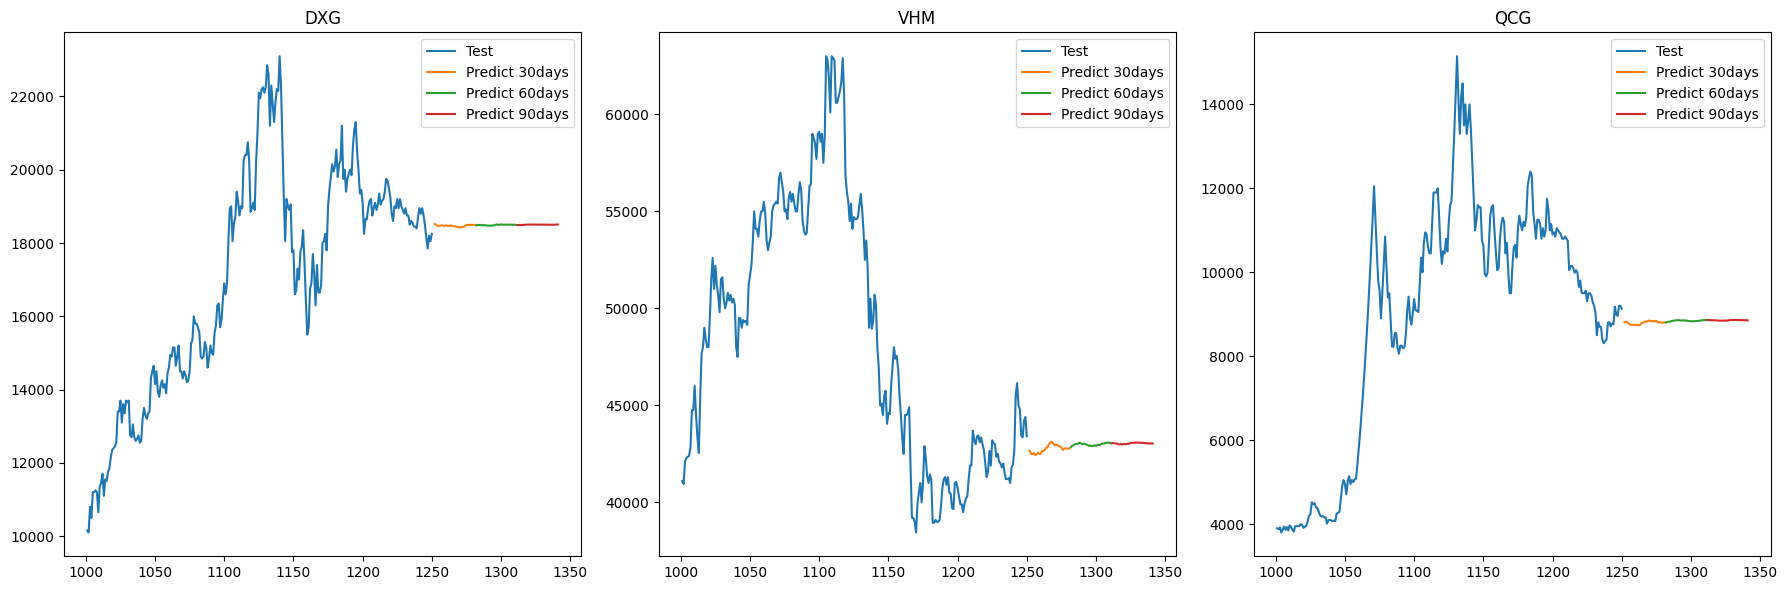

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
# dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
# axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
# vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
# axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
# qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
# axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()

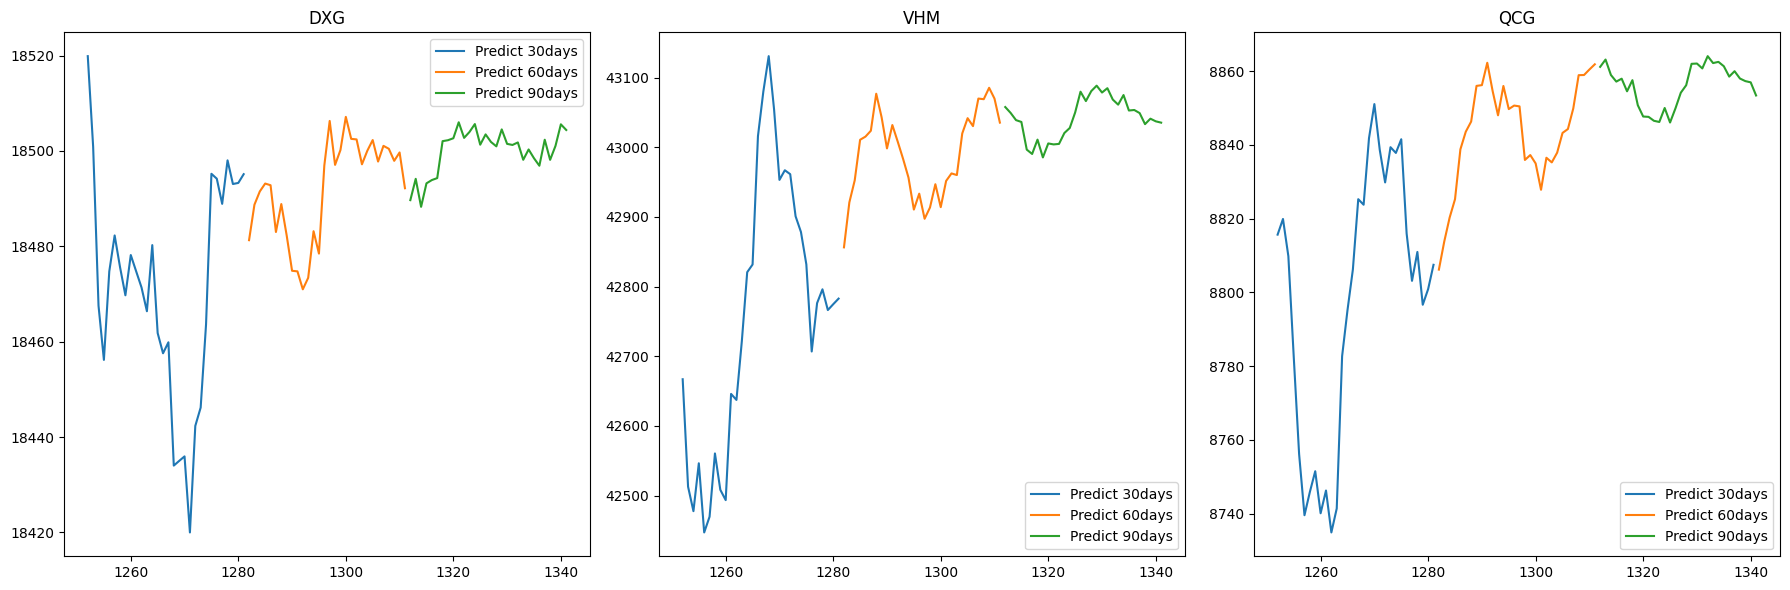

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()